# House Price Prediction- using XGBoost

### Import the necessary Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

### Load the dataset into pandas dataframe

In [54]:
df= pd.read_csv('Housing Dataset.csv')

### Display the first few rows of the dataset

In [55]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### Find the number of rows and columns

In [56]:
print(('There are {} rows and {} columns').format(df.shape[0],df.shape[1]))

There are 1460 rows and 81 columns


### View all the columns in this dataset

In [57]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Get some more information about the dataset

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Check each column for its unique values

In [59]:
for name in df.columns:
    values = df[name].unique()
    print(f'{name} - {values}\n')

Id - [   1    2    3 ... 1458 1459 1460]

MSSubClass - [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

MSZoning - ['RL' 'RM' 'C (all)' 'FV' 'RH']

LotFrontage - [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

LotArea - [ 8450  9600 11250 ... 17217 13175  9717]

Street - ['Pave' 'Grvl']

Alley - [nan 'Grvl' 'Pave']

LotShape - ['Reg' 'IR1' 'IR2' 'IR3']

LandContour - ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities - ['AllPub' 'NoSeWa']

LotConfig - ['Inside' 'FR2' 'Corner' 'C

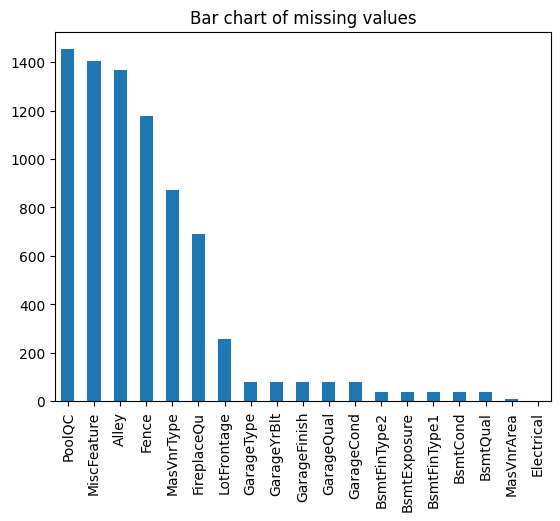

In [60]:
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(ascending = False, inplace = True)
#plt.figure(figsize = (15,8))
plt.title('Bar chart of missing values')
missing.plot.bar();

In [61]:
numerical_variables = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(numerical_variables)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


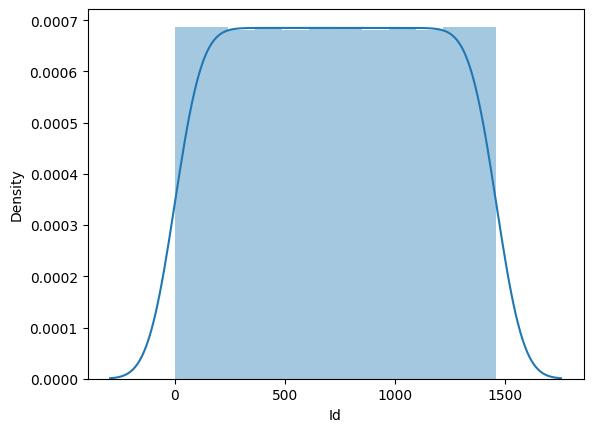

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


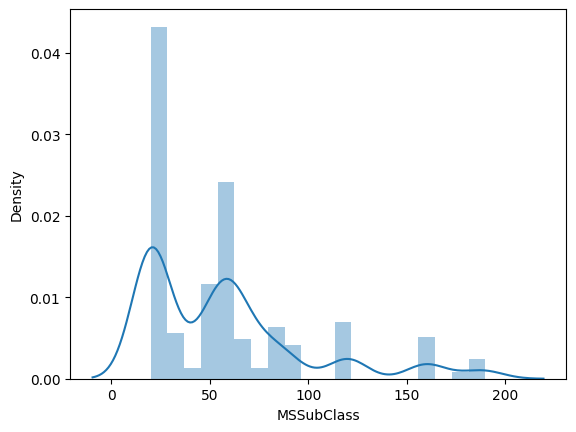

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


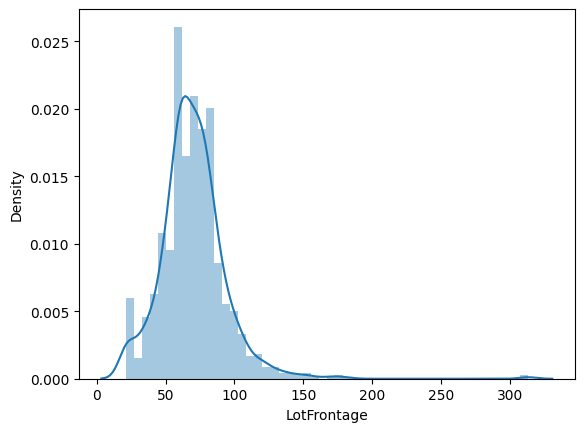

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


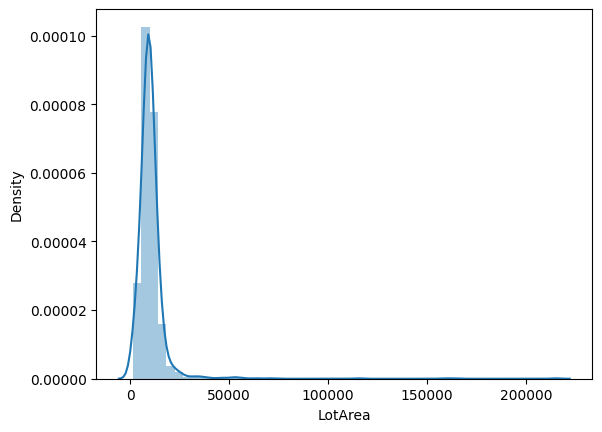

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


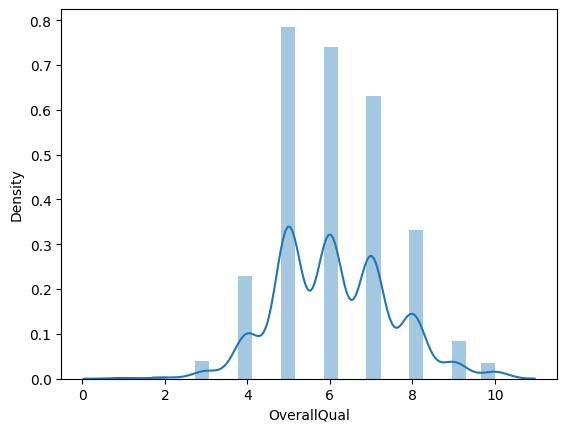

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


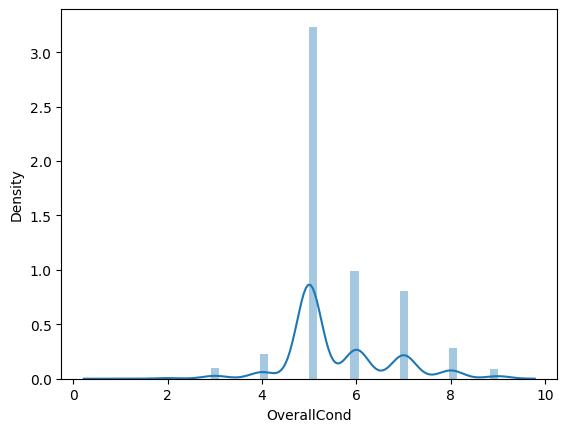

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


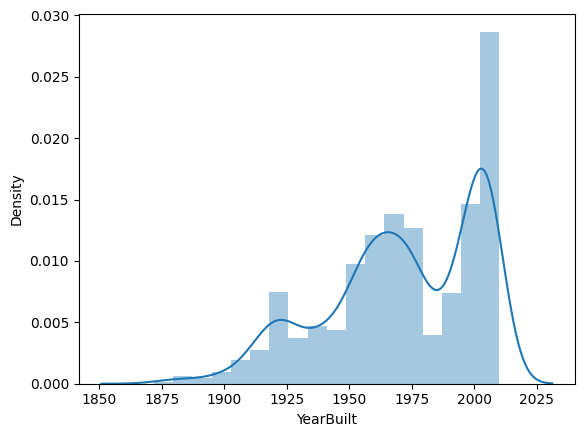

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


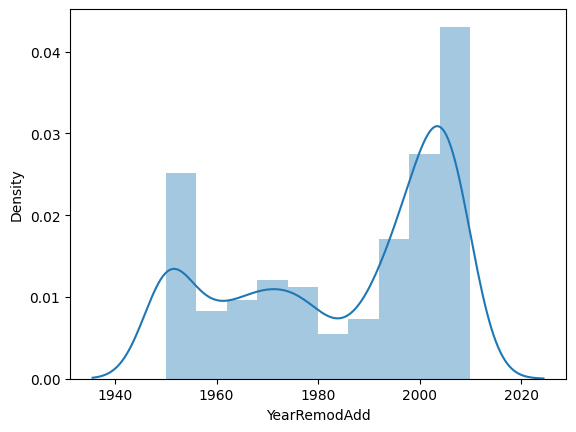

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


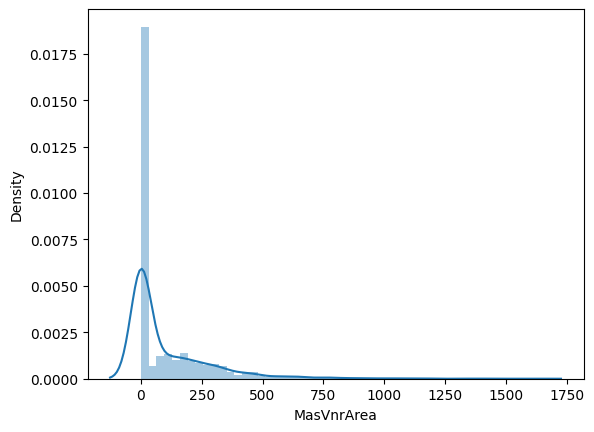

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


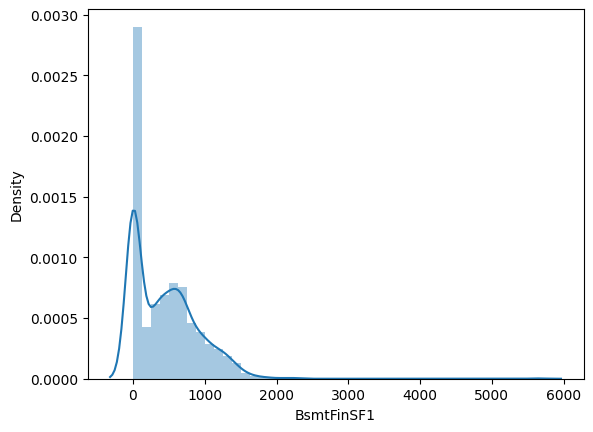

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


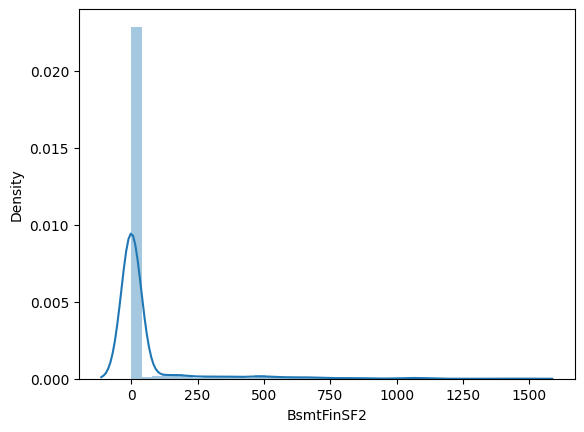

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


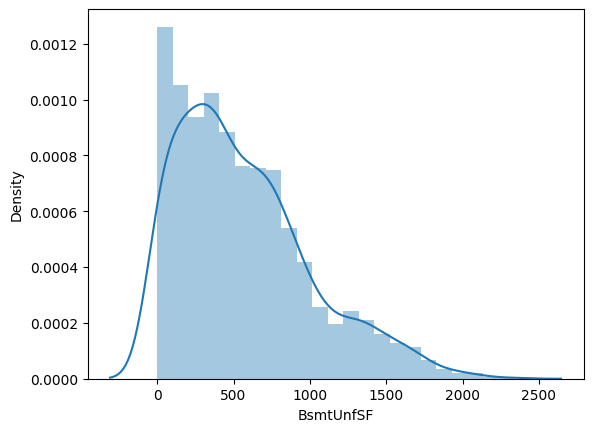

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


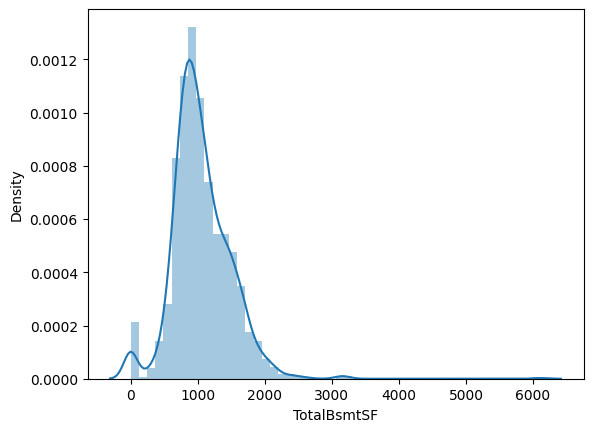

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


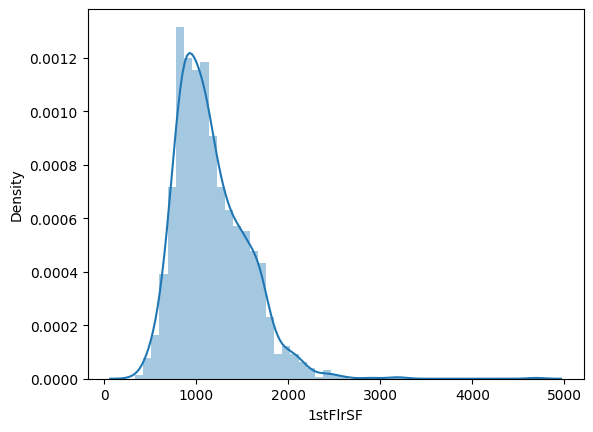

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


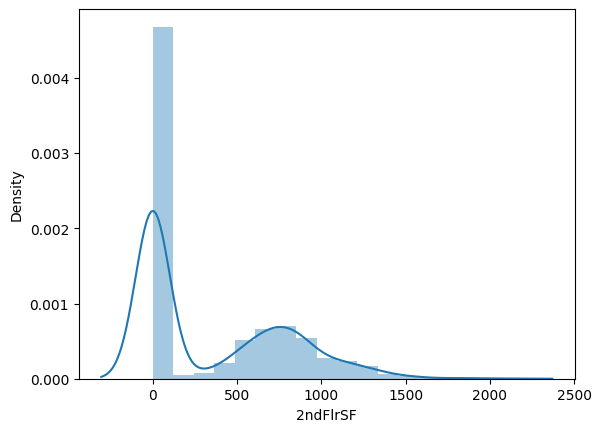

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


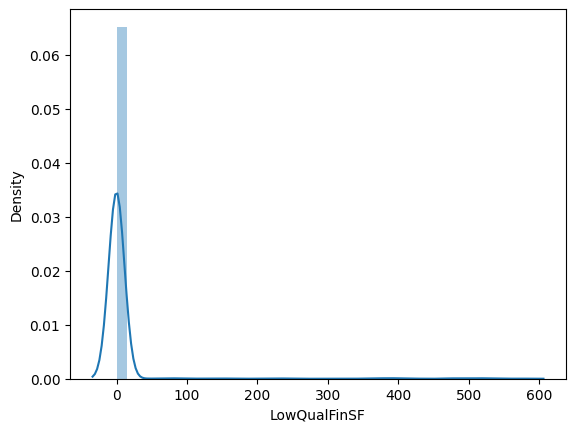

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


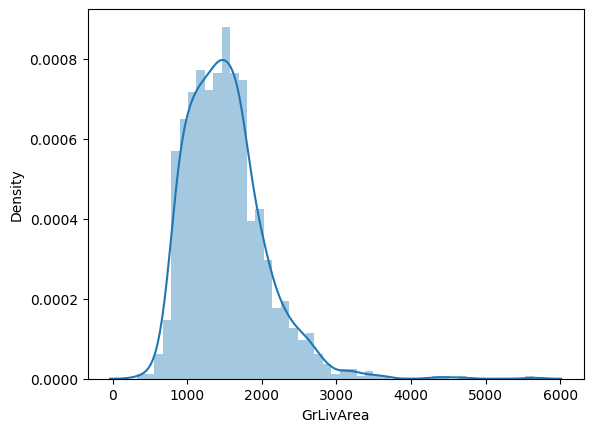

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


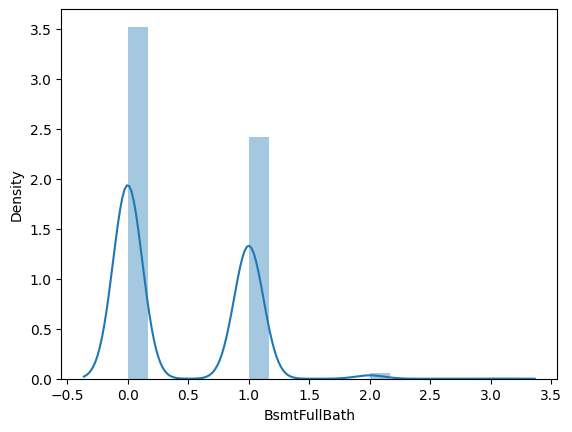

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


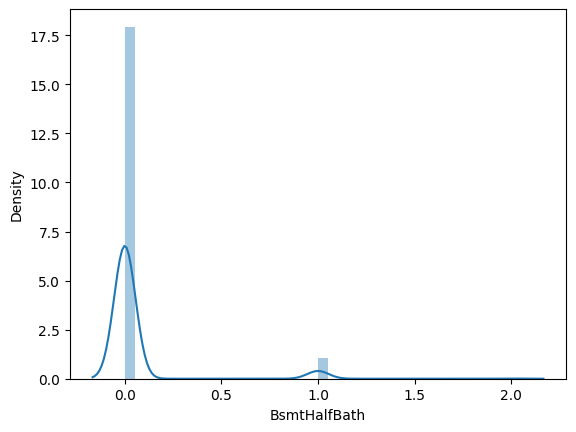

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


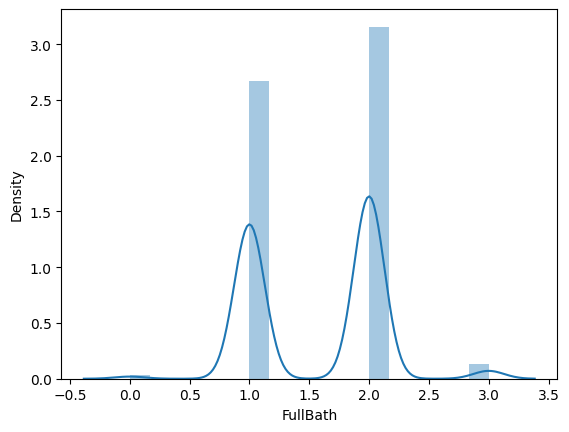

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


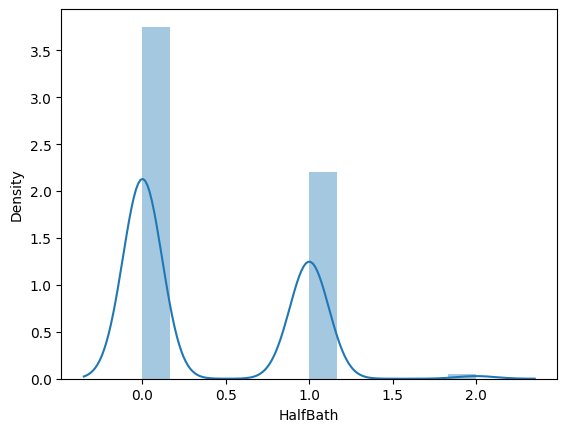

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


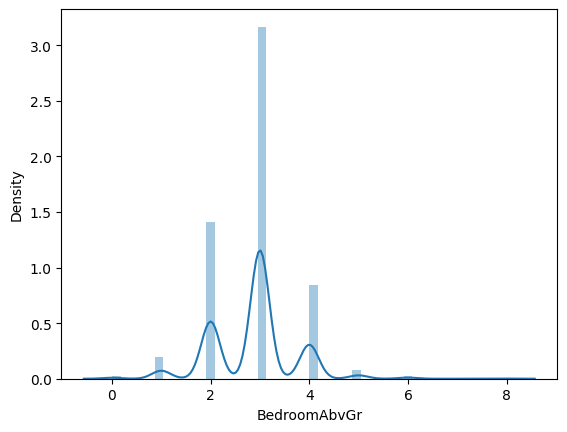

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


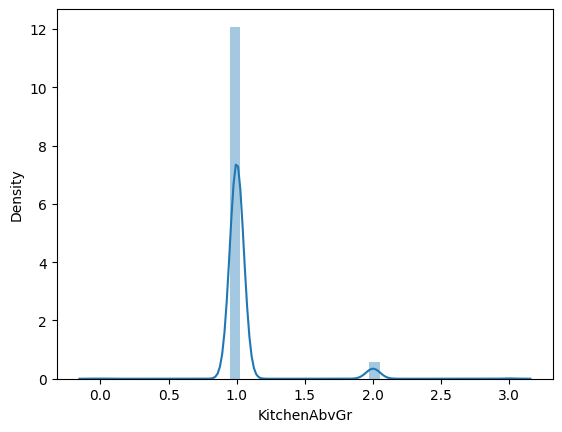

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


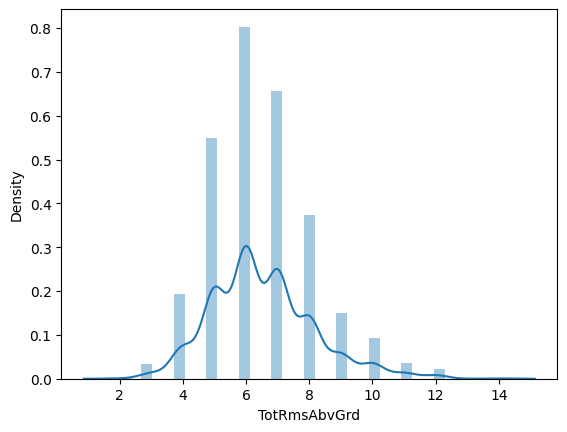

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


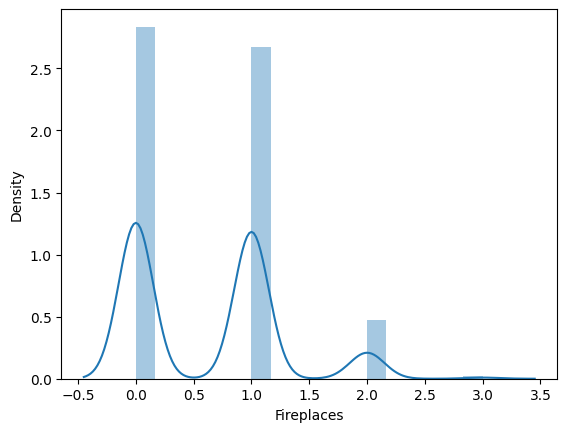

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


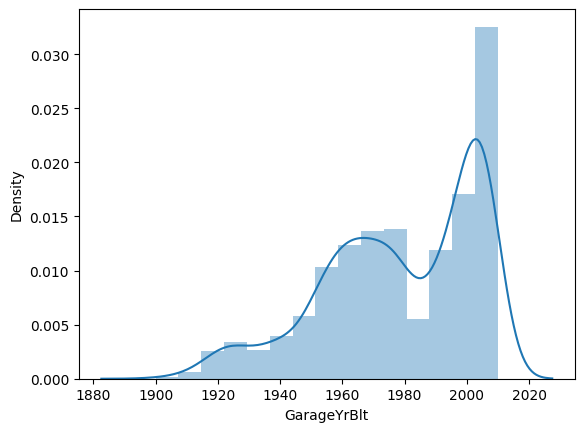

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


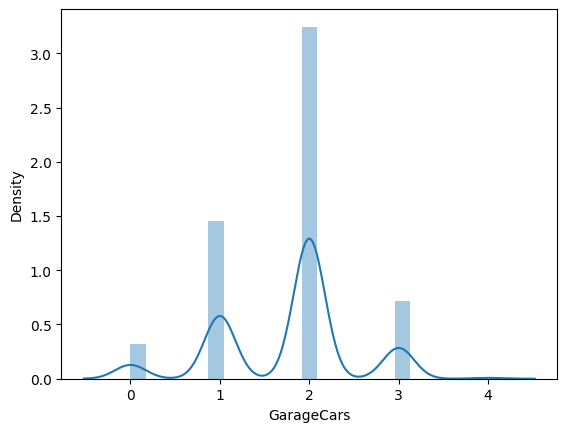

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


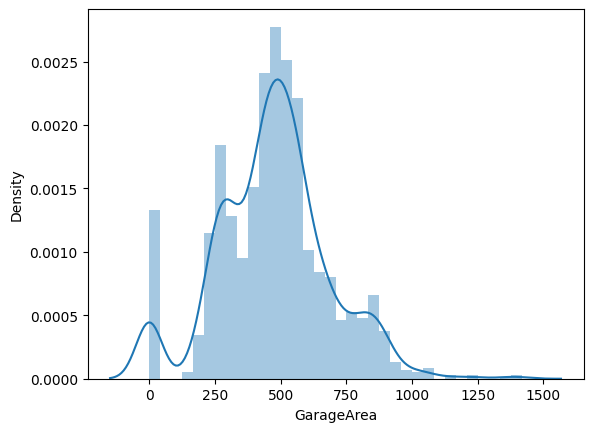

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


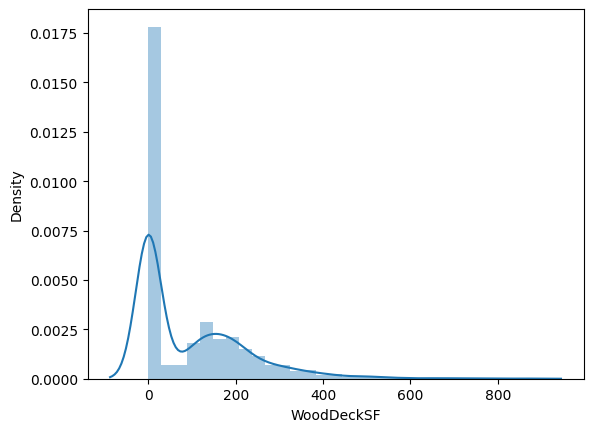

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


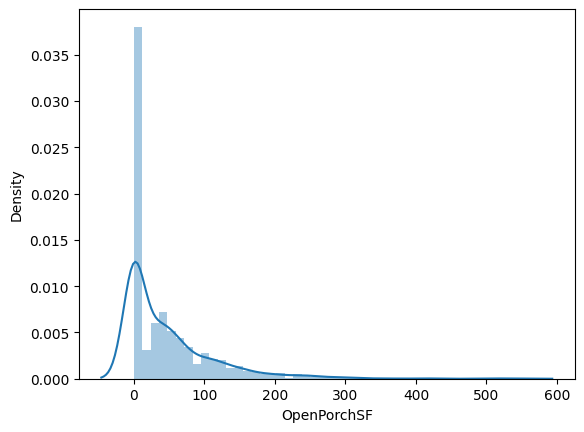

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


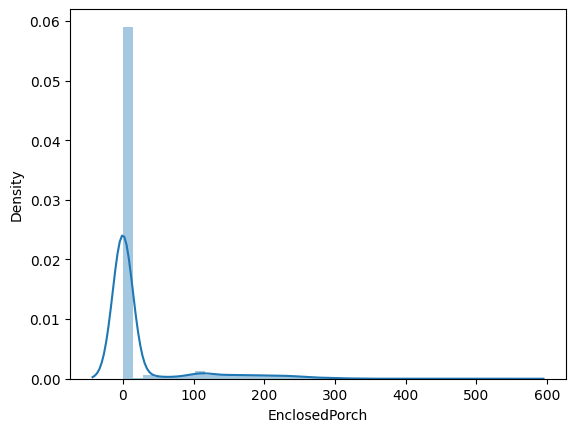

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


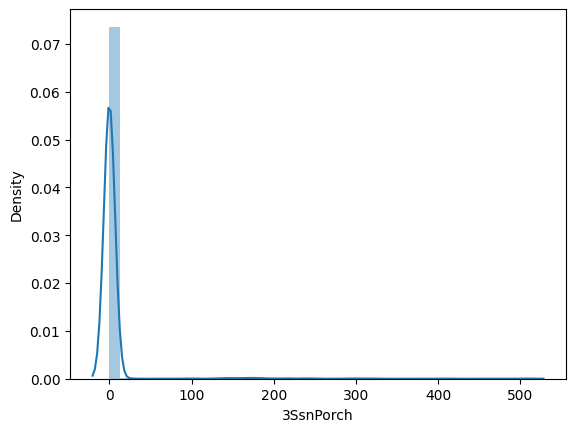

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


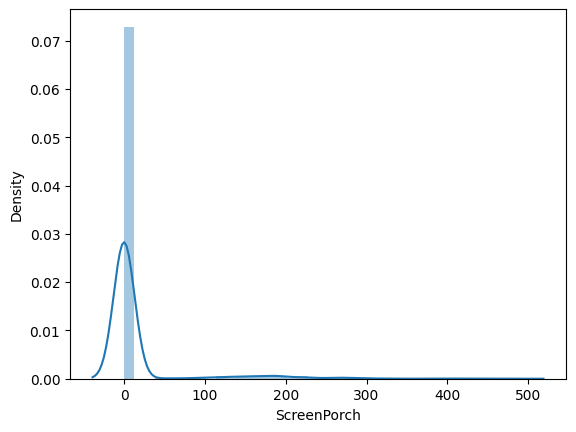

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


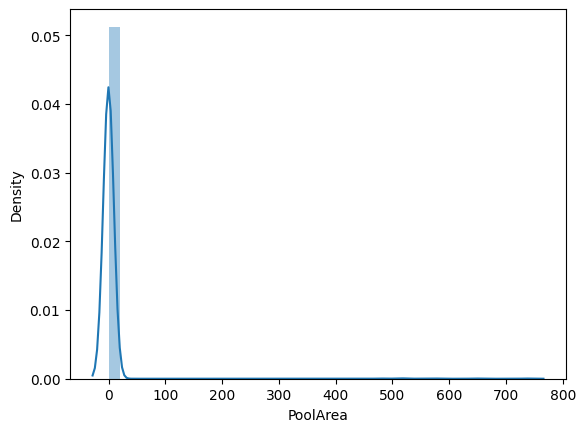

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


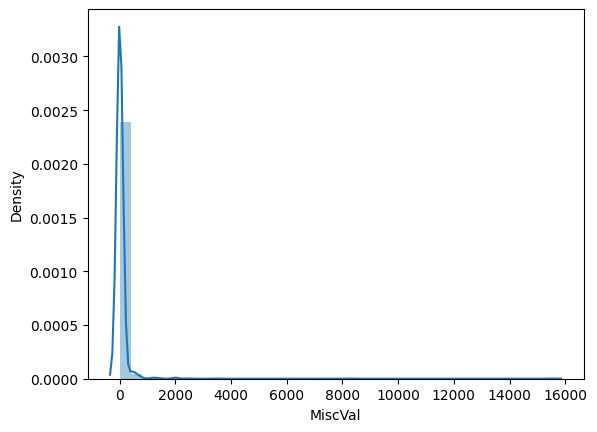

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


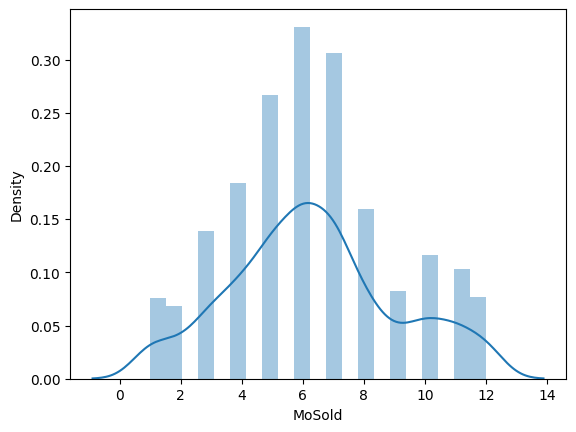

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


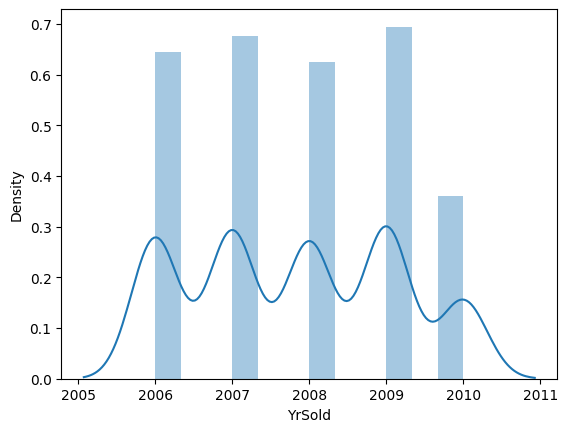

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\3450216072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols]);


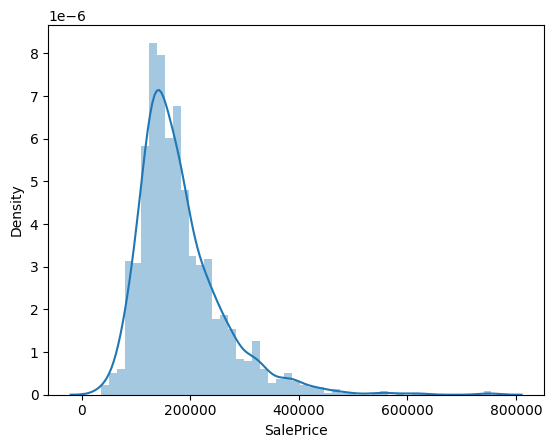

In [62]:
for cols in numerical_variables:
    sns.distplot(df[cols]);
    
    plt.show()

From the above distribution chart, 

It is evident that some categorical features are disguised as numericals. These include MSSubClass,OverallQual, OverallCond, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbGrd, Fireplaces, GarageCars, MoSold, YrSold. They should be converted to categorical features.

The actual numerical variables are all skewed, this should be fixed

Drop ID from this dataset immediately.

## 3. Univariate analysis - Bar plots on object variables

The pretend numerical variabes that are actually categorical will be added to this analysis. 

In [63]:
object_variables = [feature for feature in df.columns if df[feature].dtypes == 'O']
print(object_variables)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [64]:
fake_numericals = ['MSSubClass','OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']


In [65]:
# Joining all the categorical features in this dataset together

all_categoricals = object_variables + fake_numericals
print(all_categoricals)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']


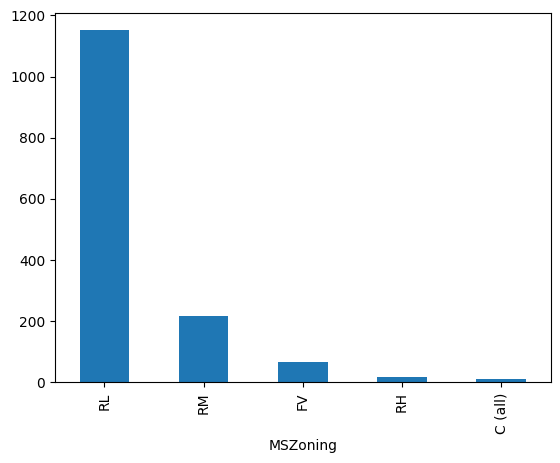

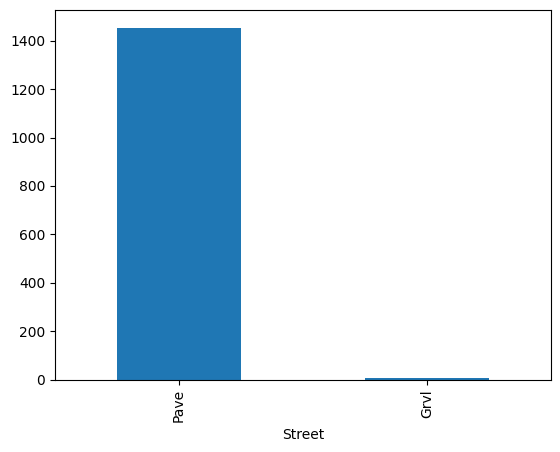

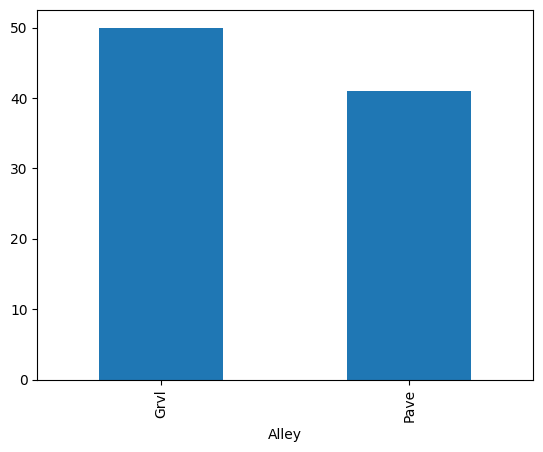

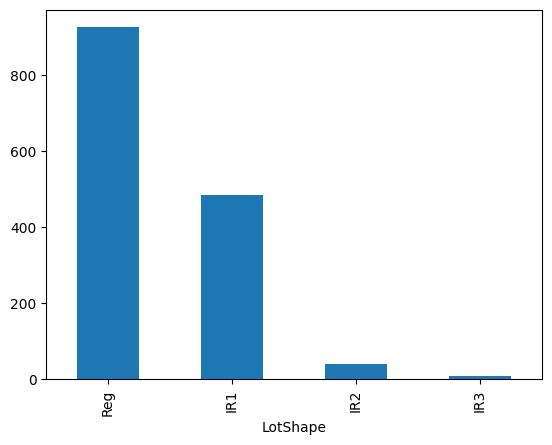

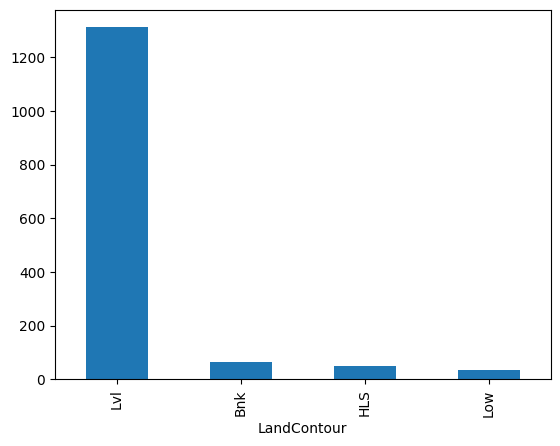

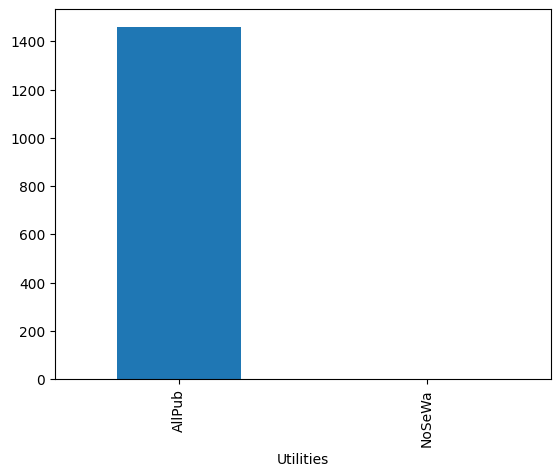

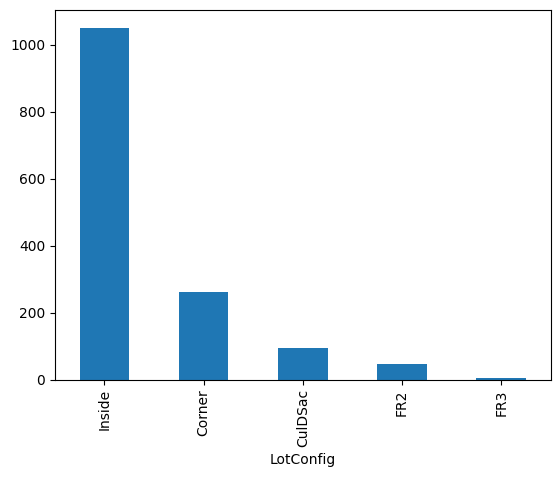

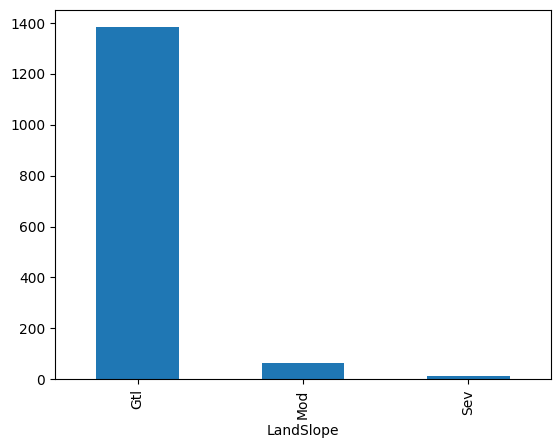

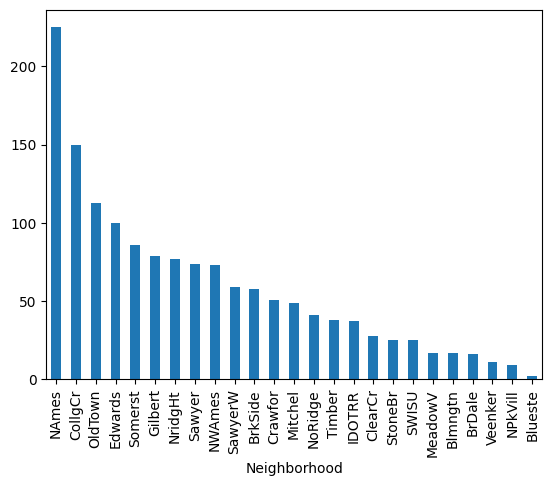

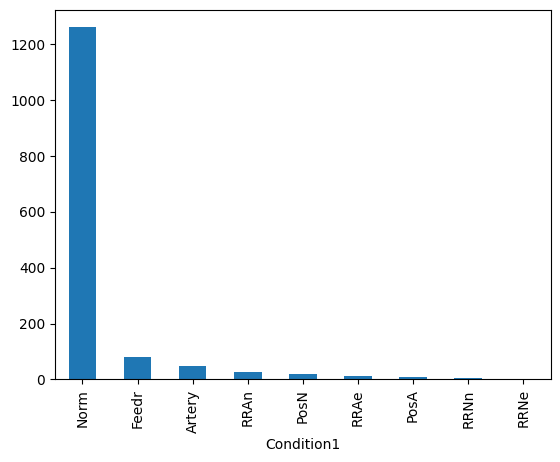

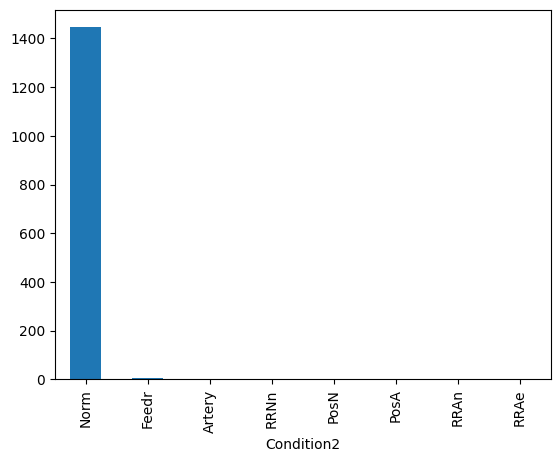

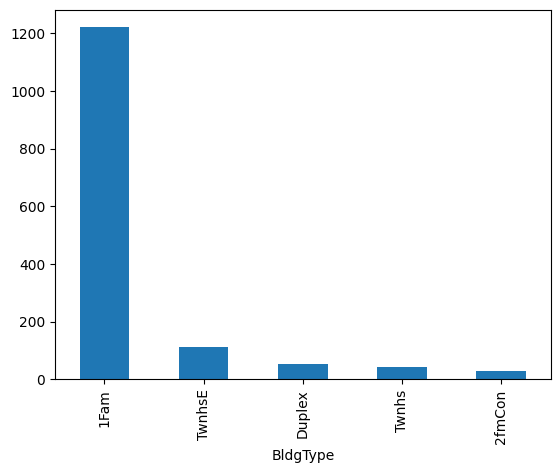

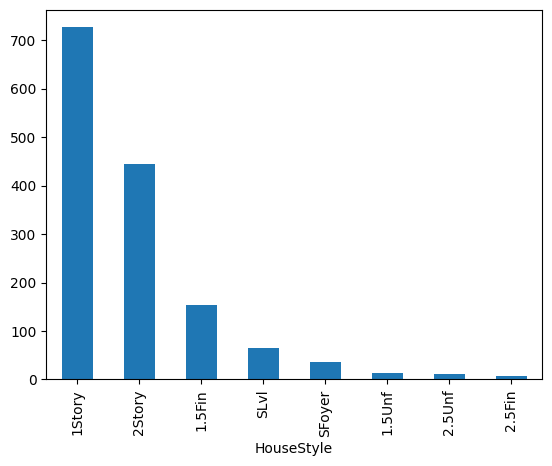

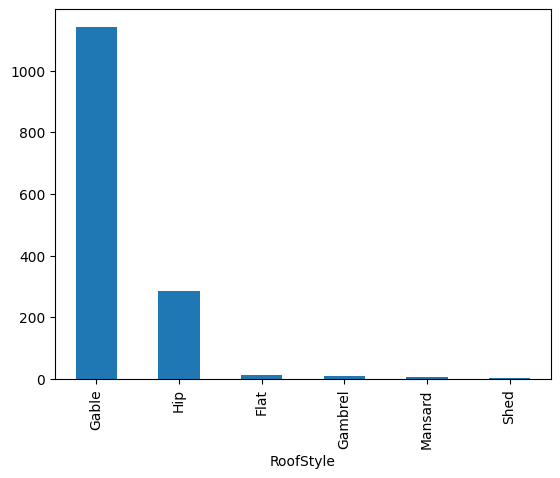

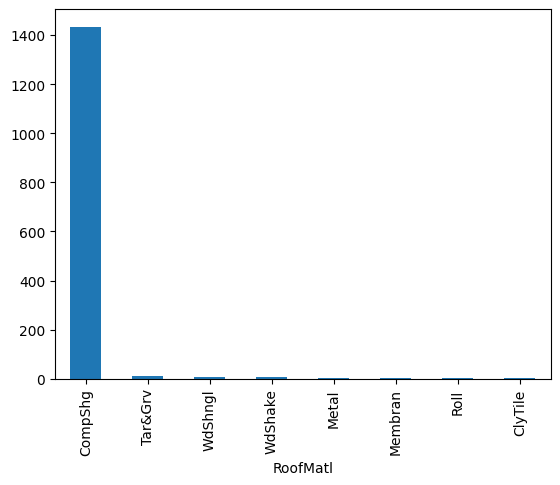

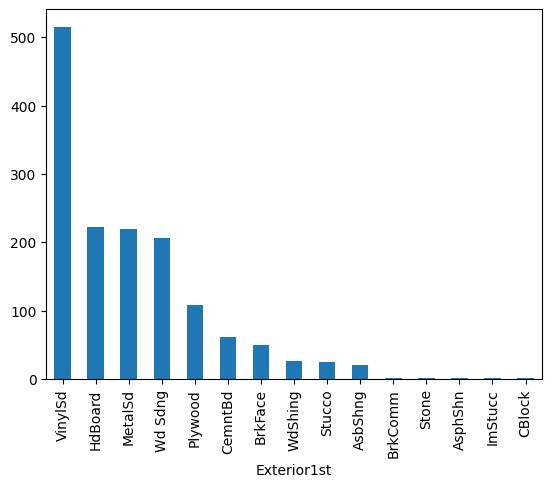

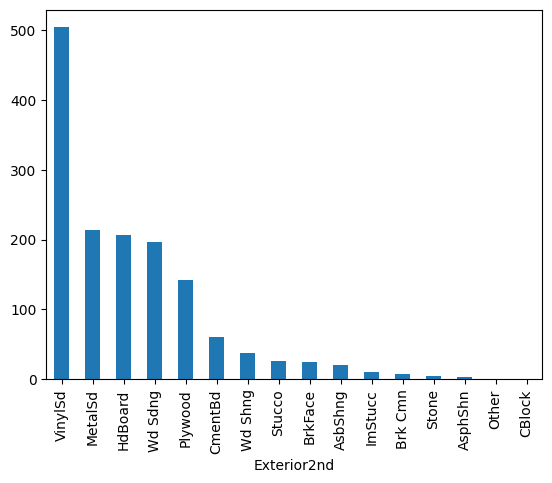

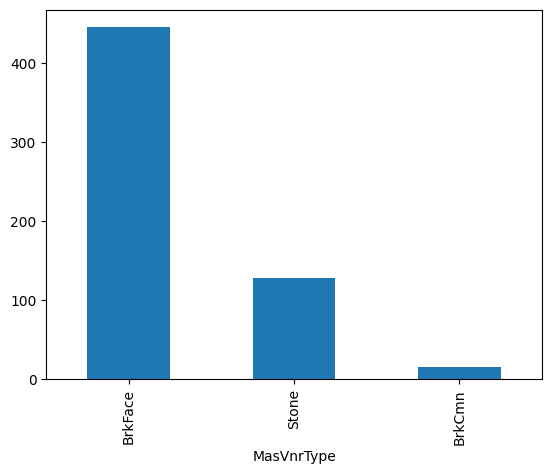

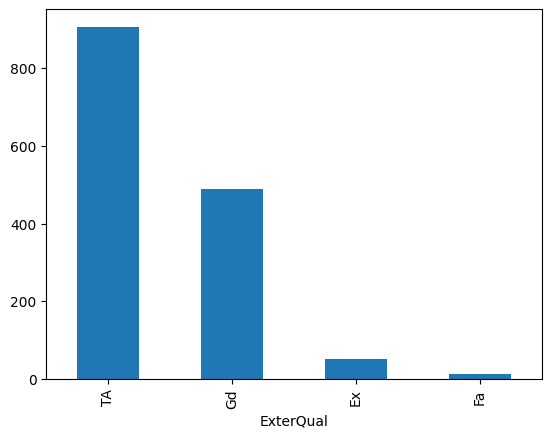

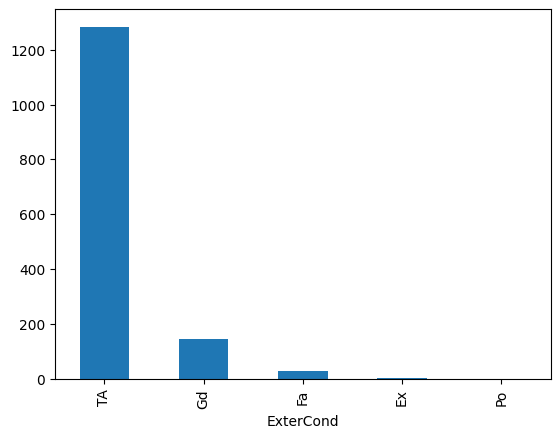

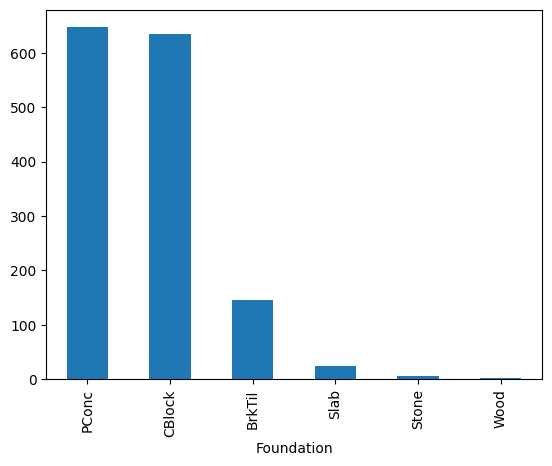

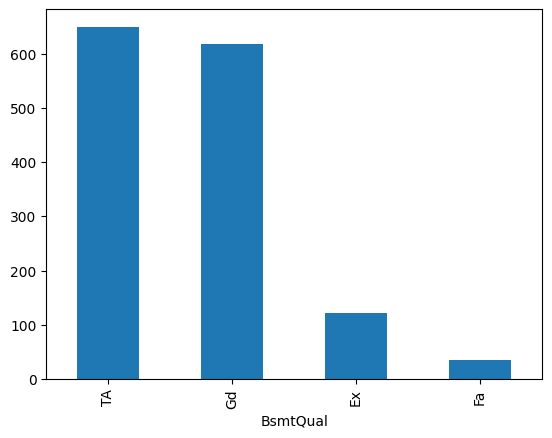

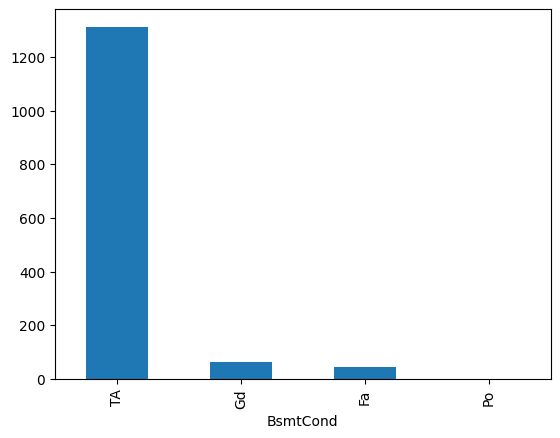

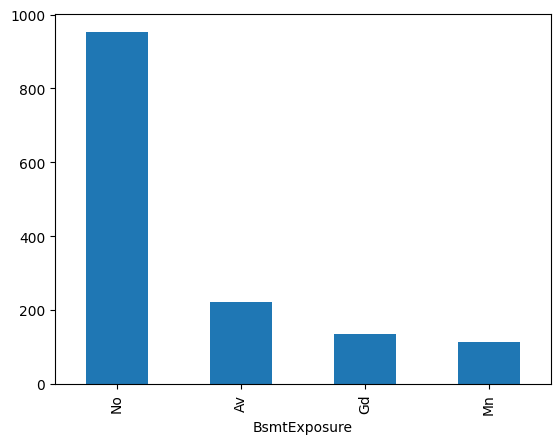

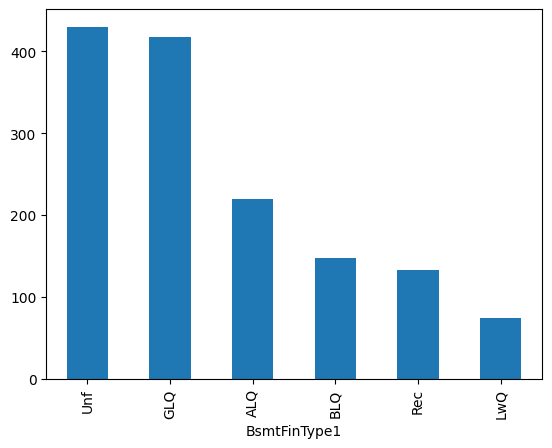

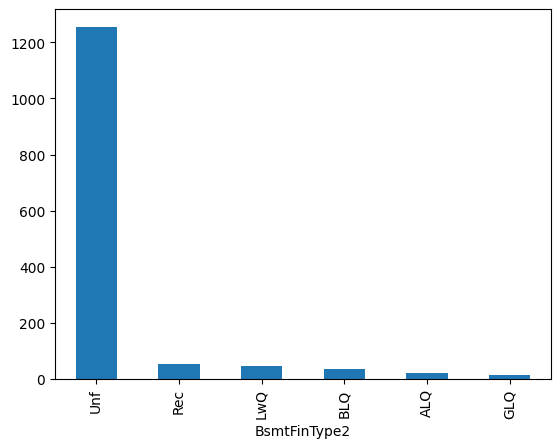

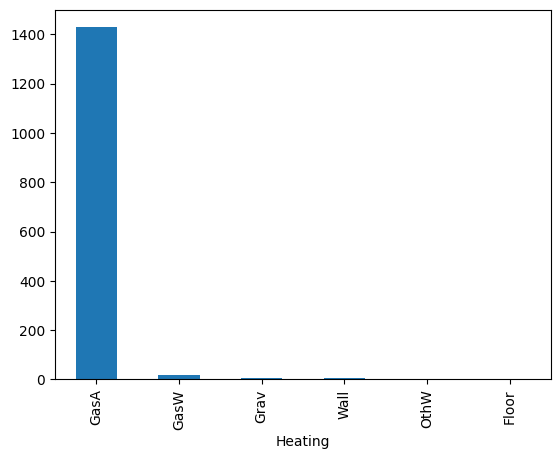

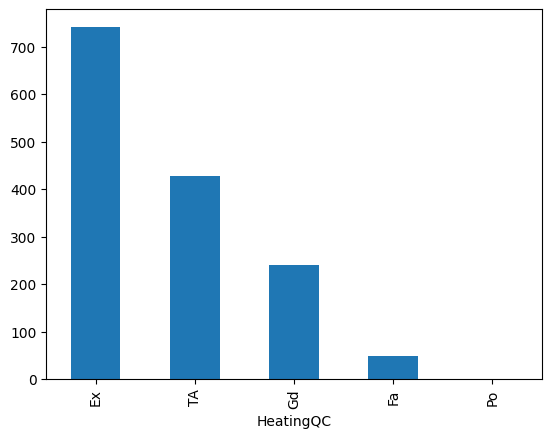

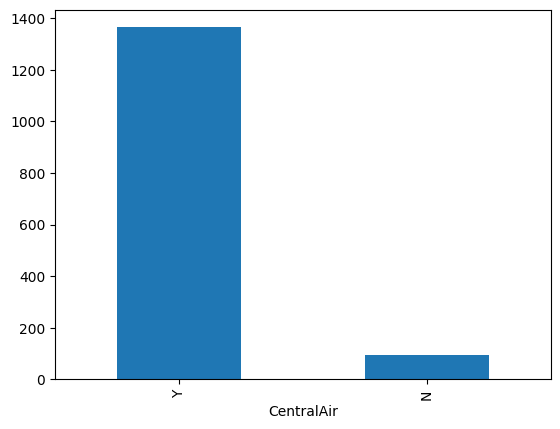

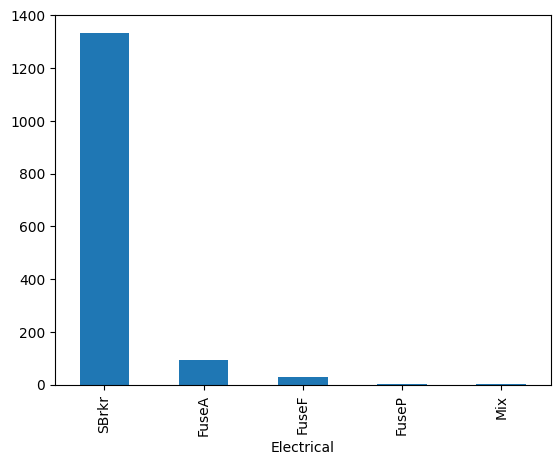

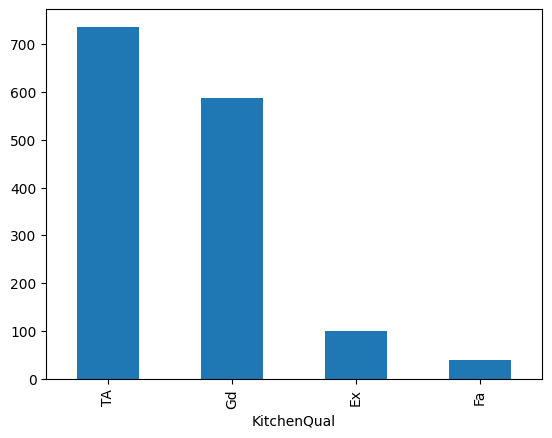

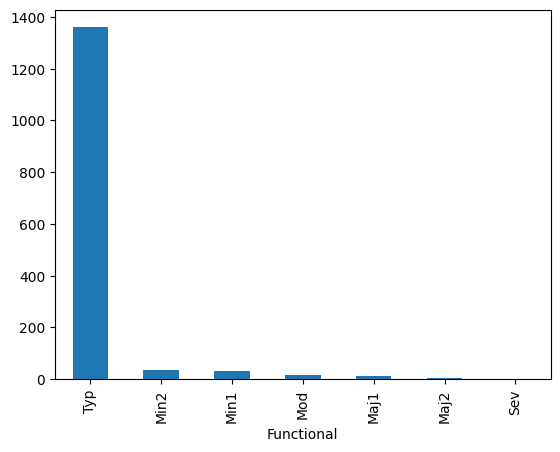

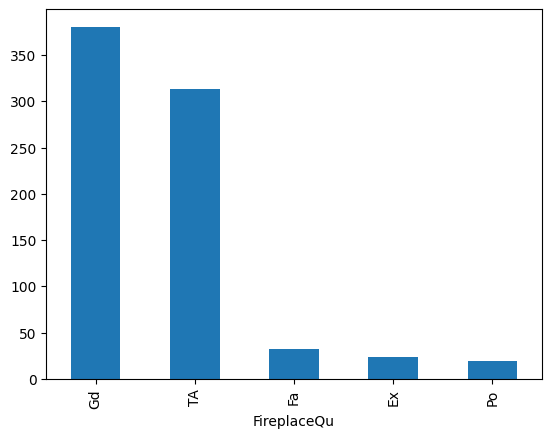

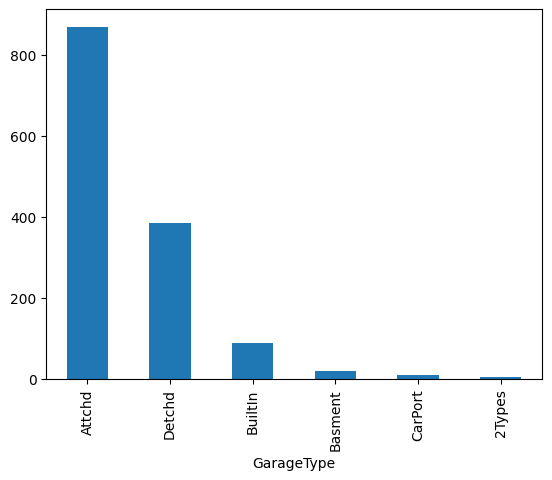

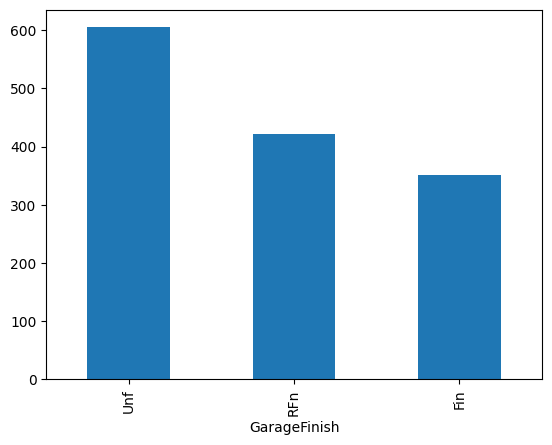

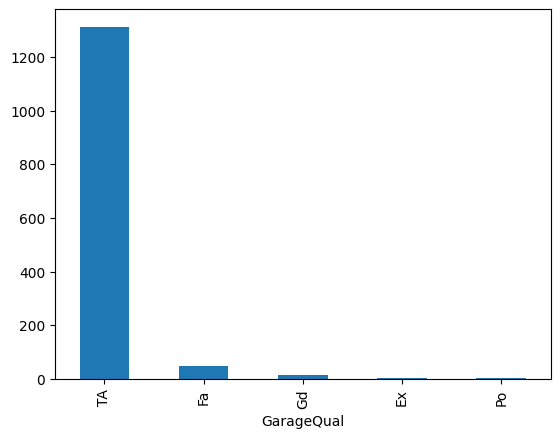

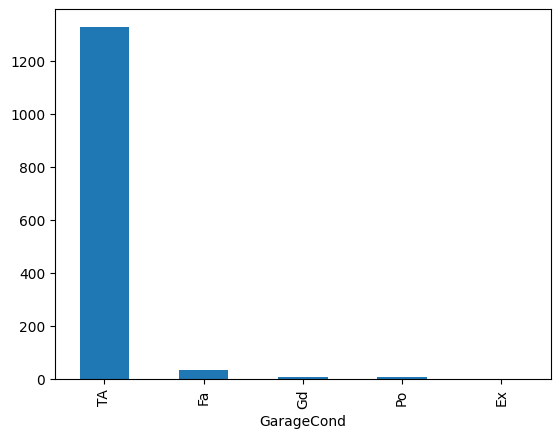

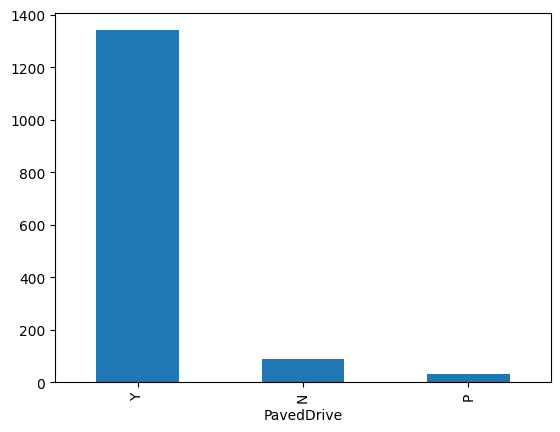

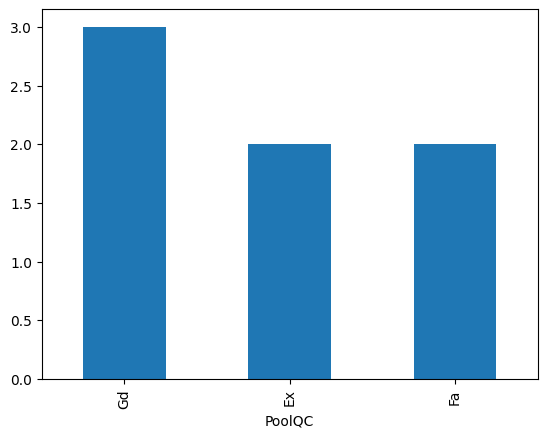

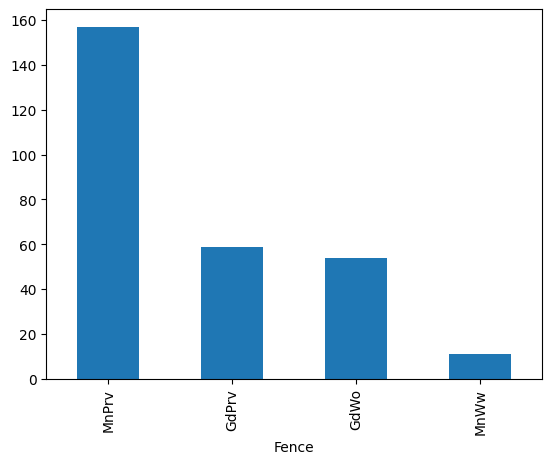

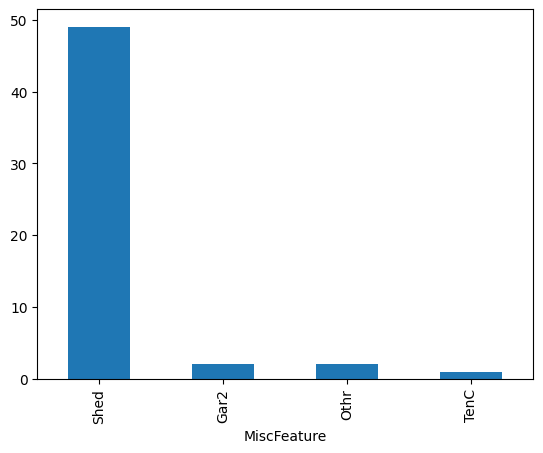

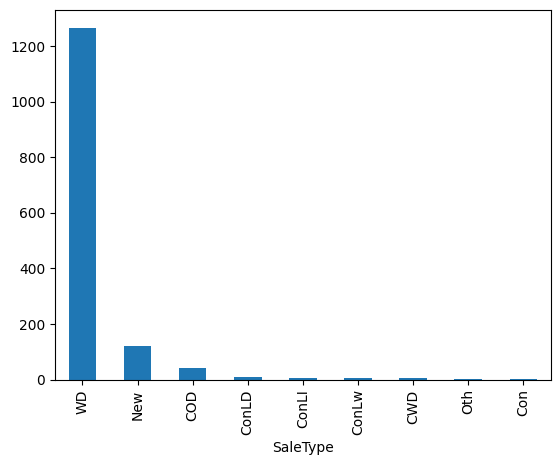

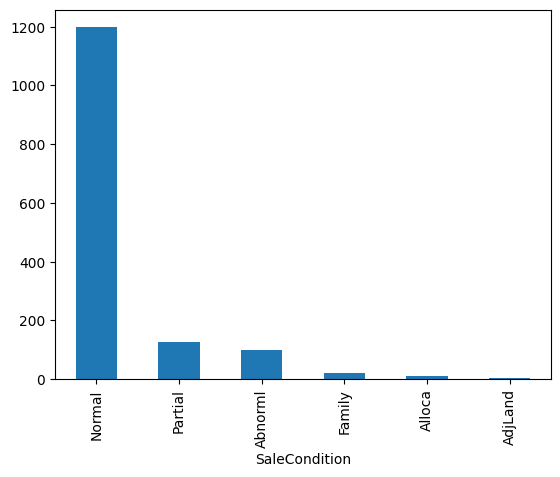

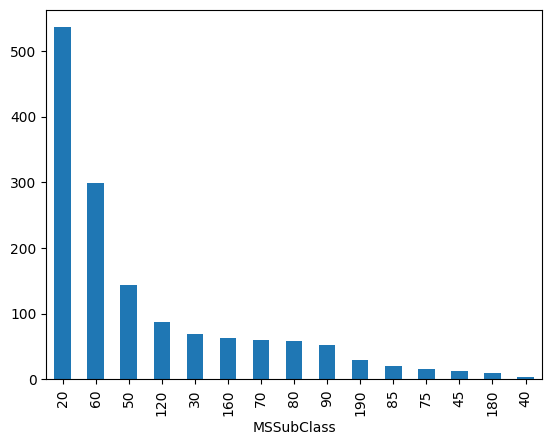

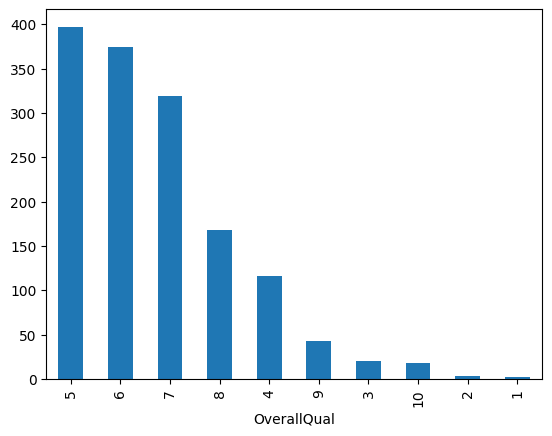

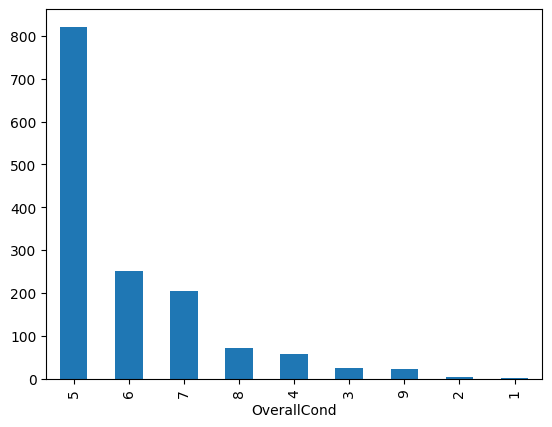

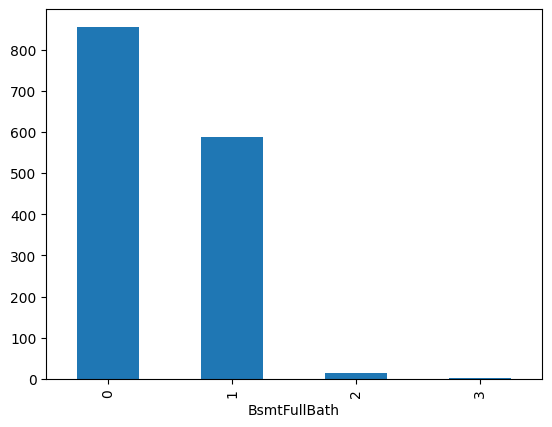

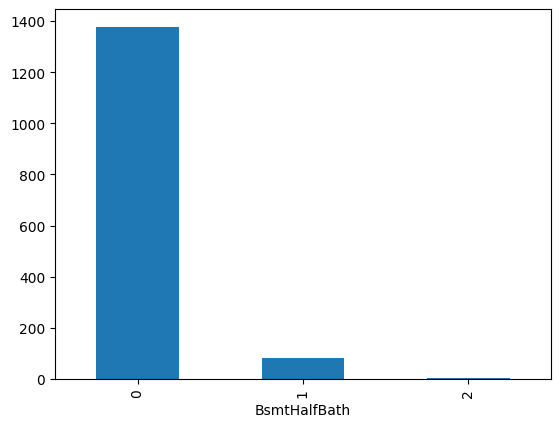

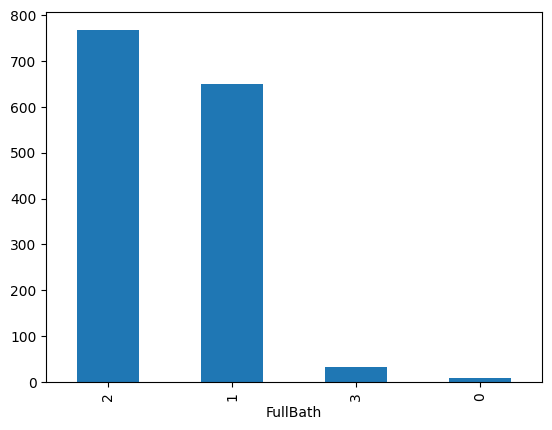

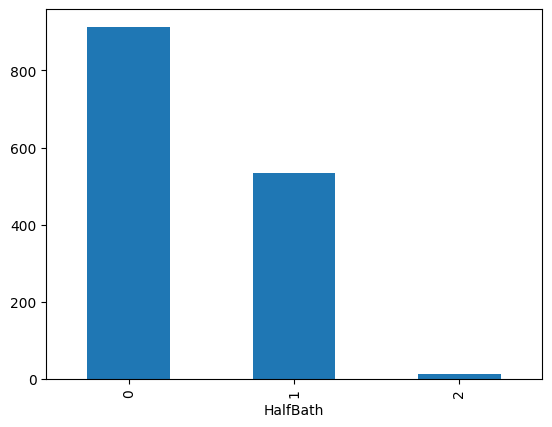

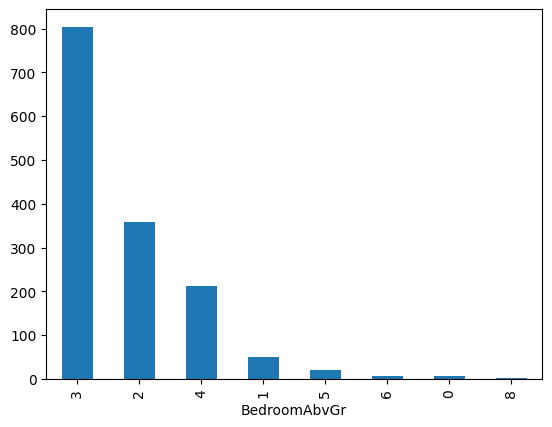

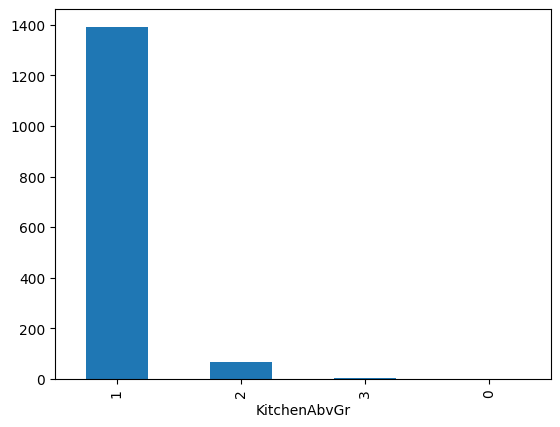

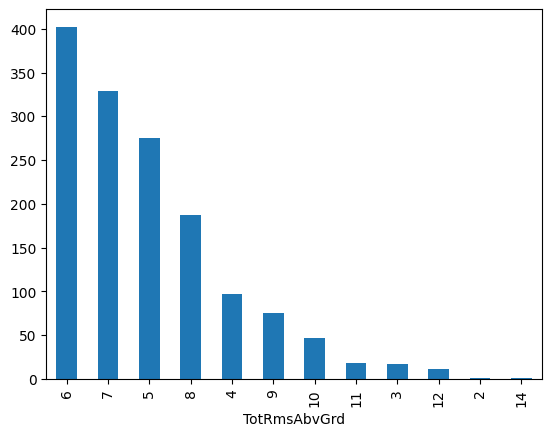

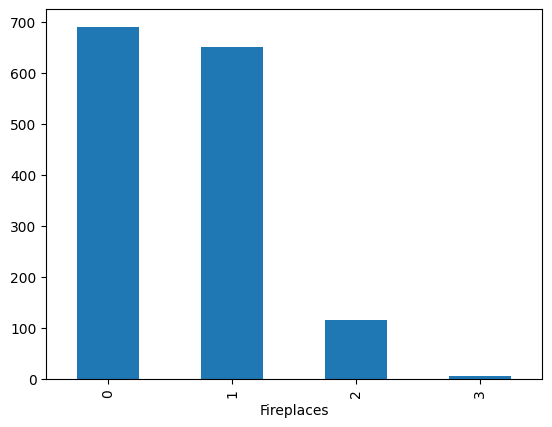

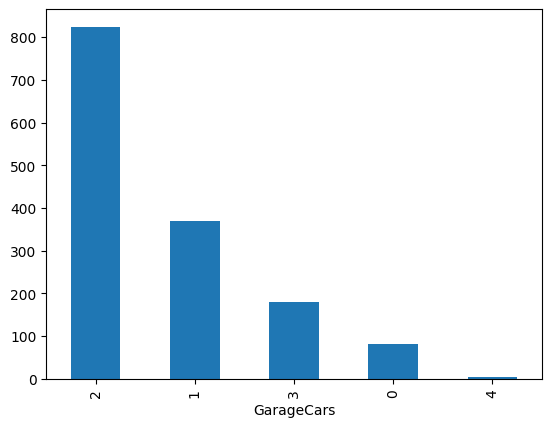

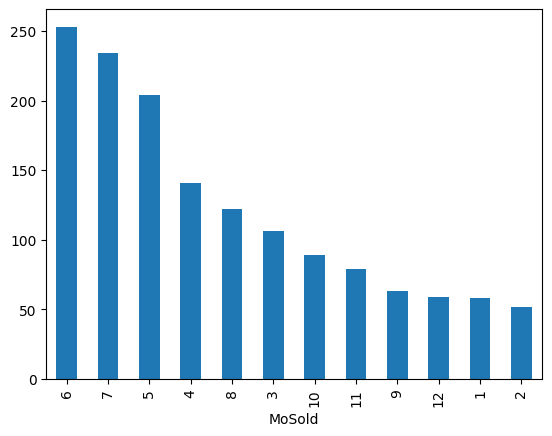

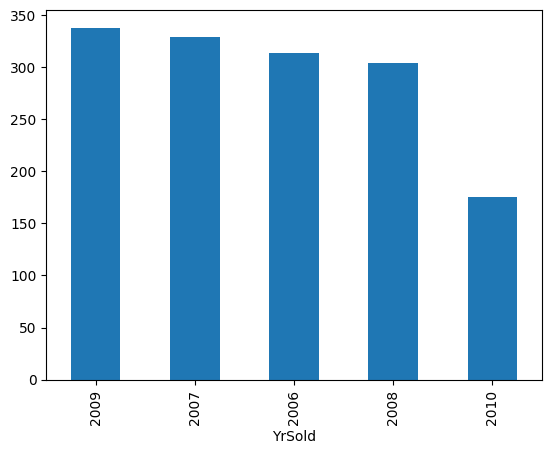

In [66]:
# This plots how many of each category are in a column

for cols in all_categoricals:
    freq_table = df[cols].value_counts()
    freq_table.plot.bar()
    plt.xlabel(cols)
    plt.show()

In [67]:
actual_numericals = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature not in ['MSSubClass','OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'Id']]
print(actual_numericals)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


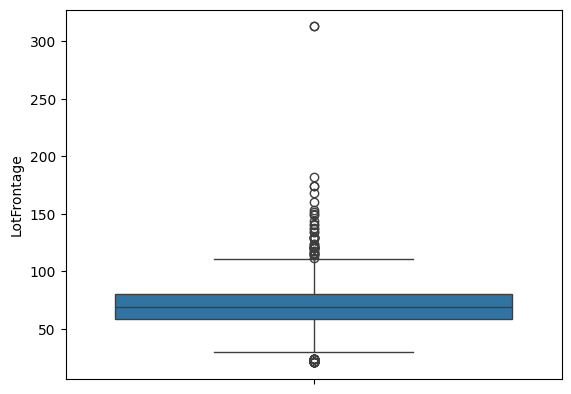

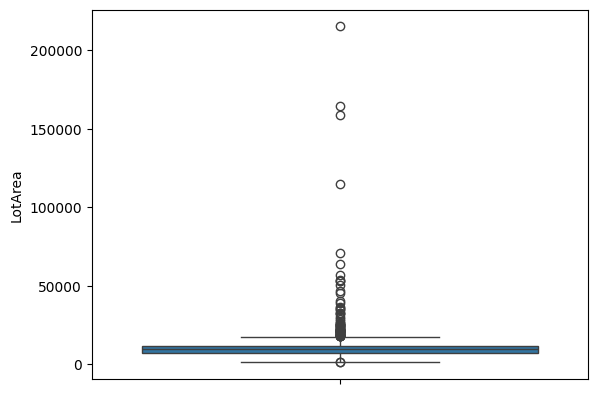

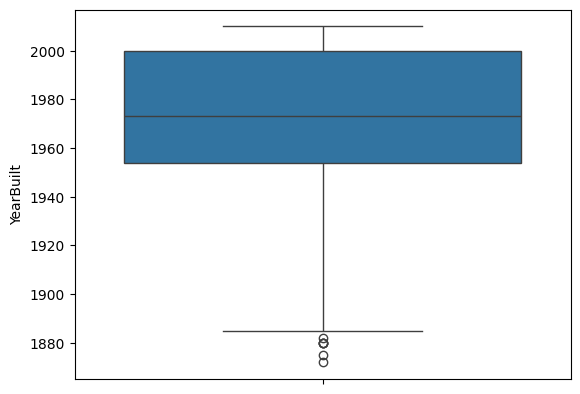

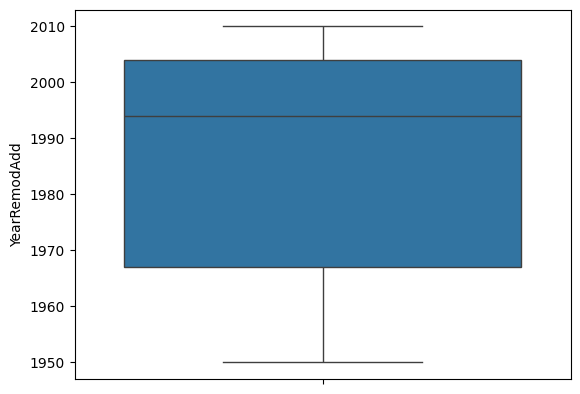

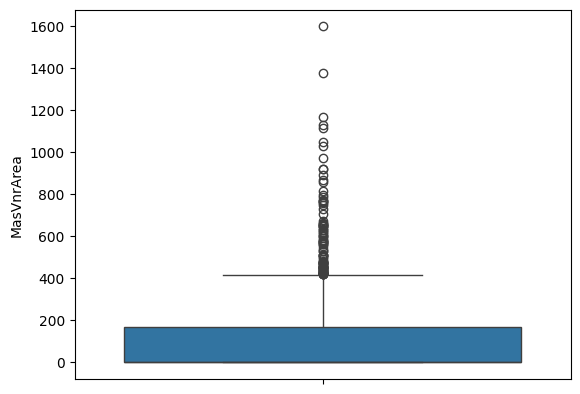

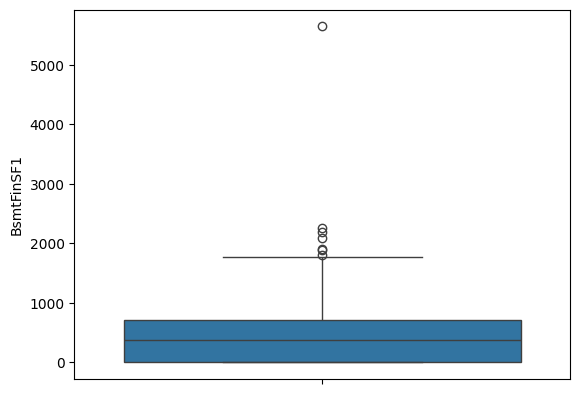

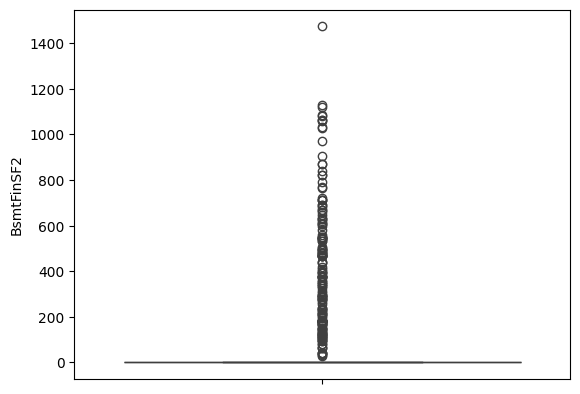

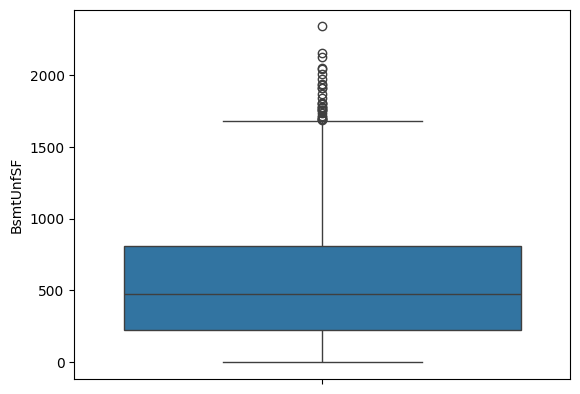

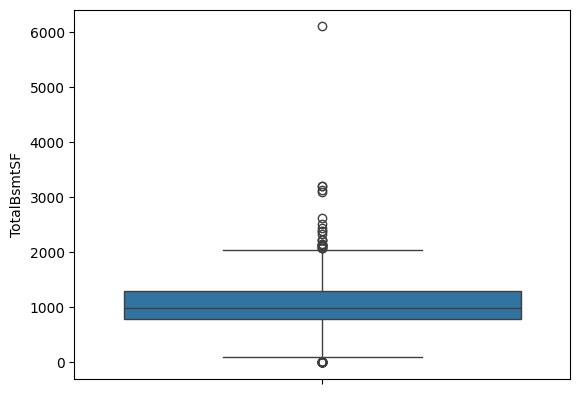

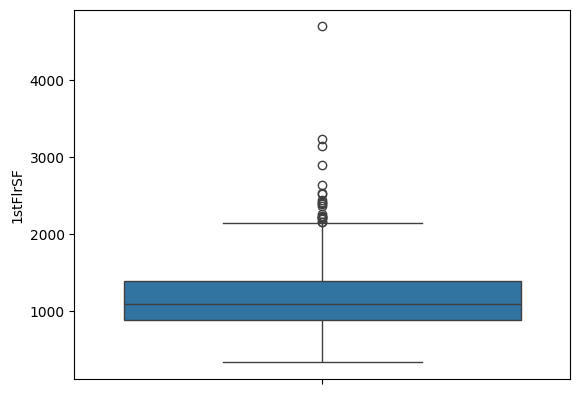

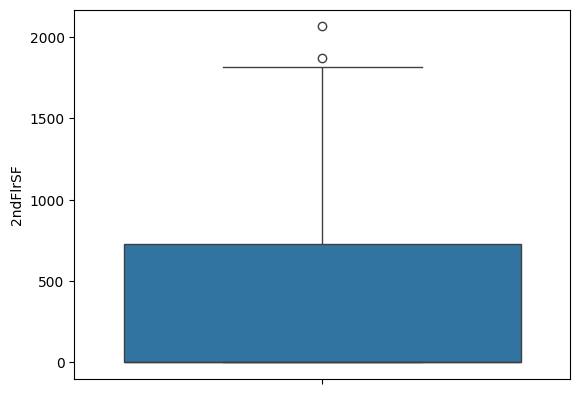

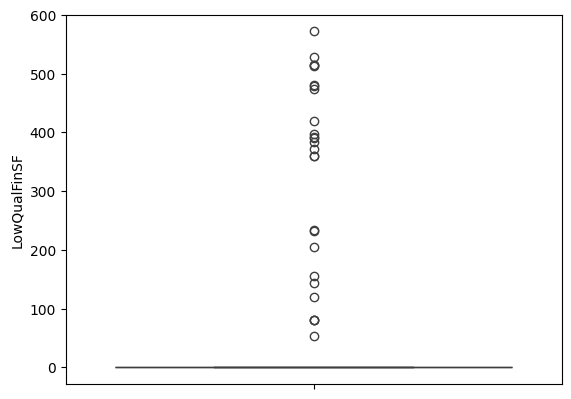

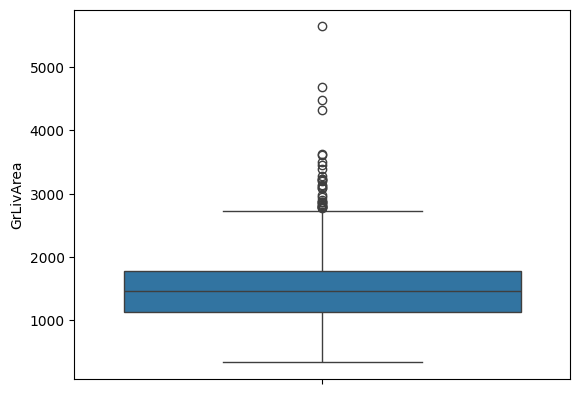

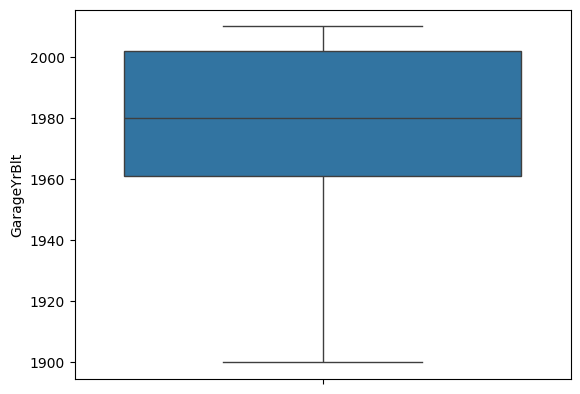

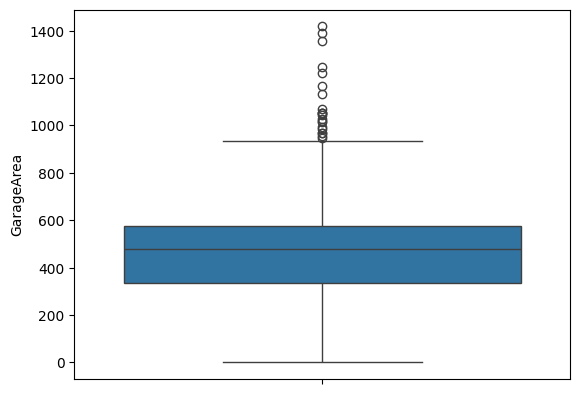

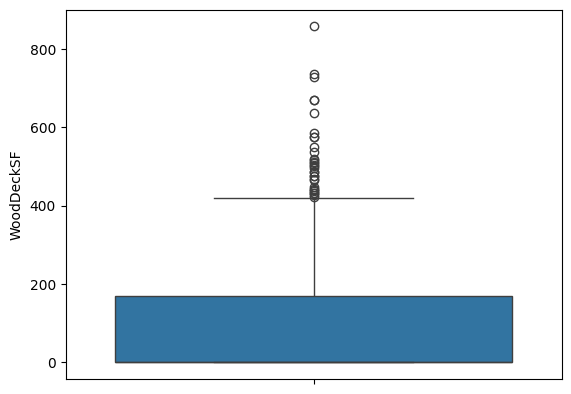

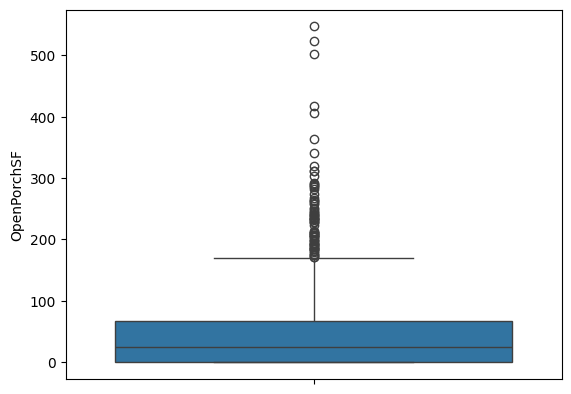

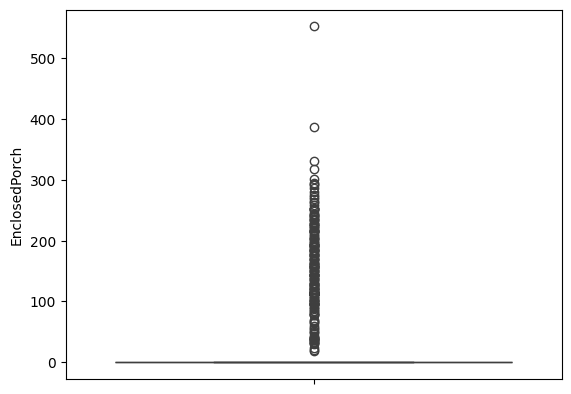

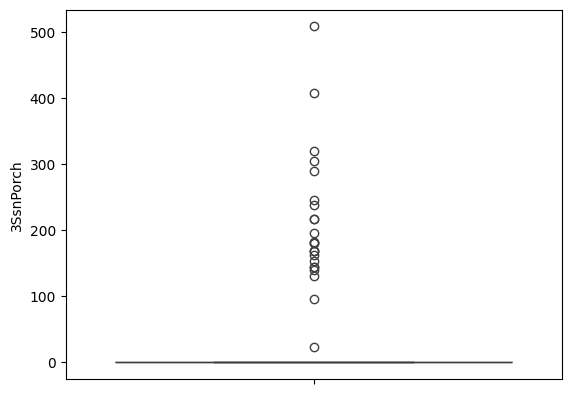

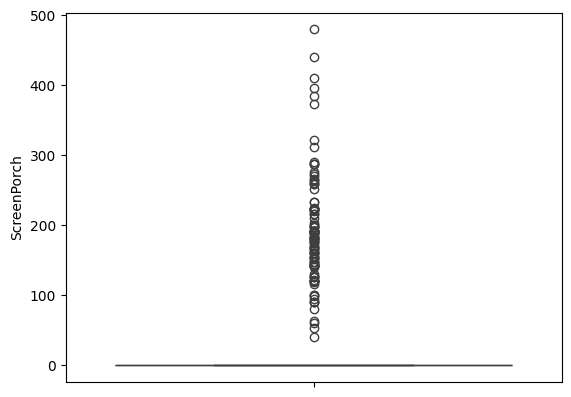

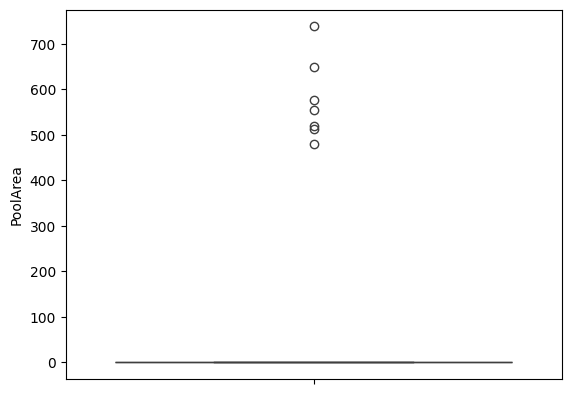

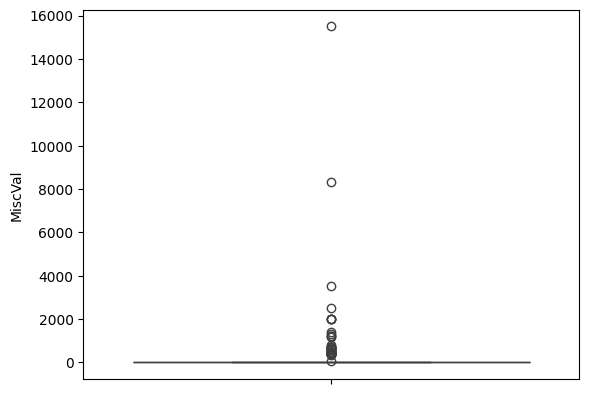

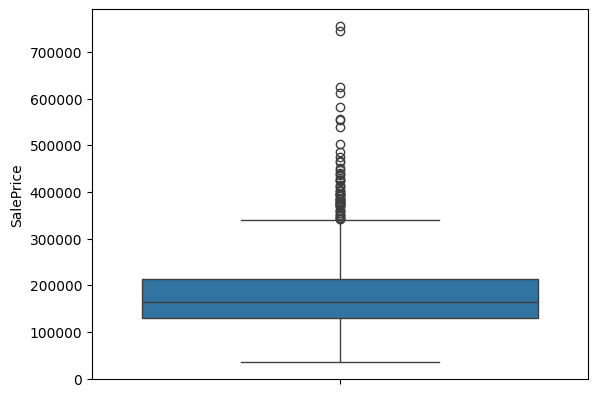

In [68]:
for cols in actual_numericals:
    sns.boxplot(y = df[cols]) # I used y so that the chart will face upwards
    plt.show()

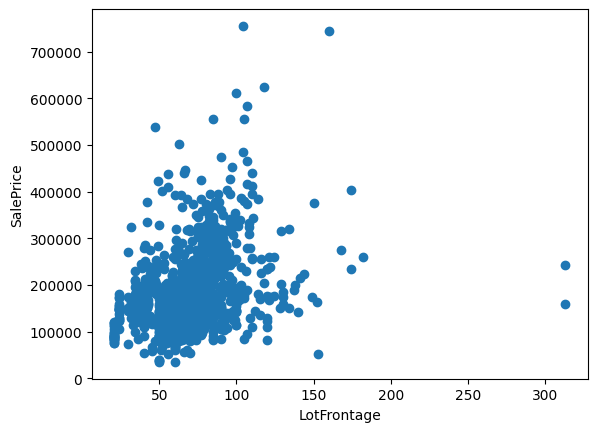

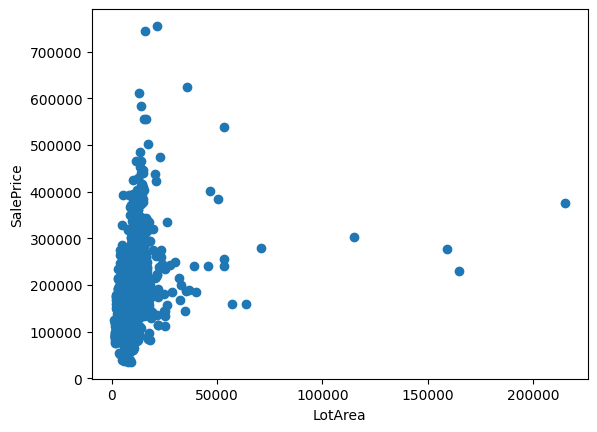

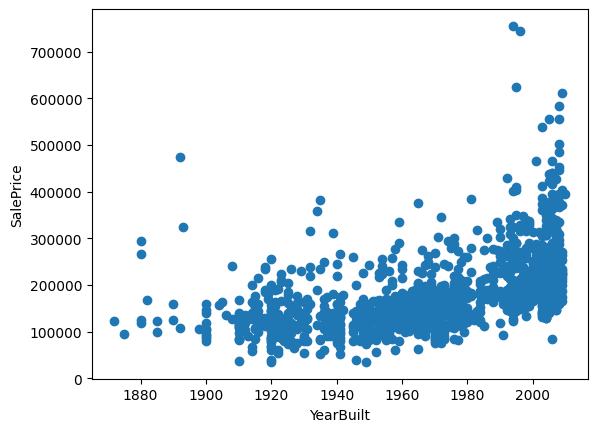

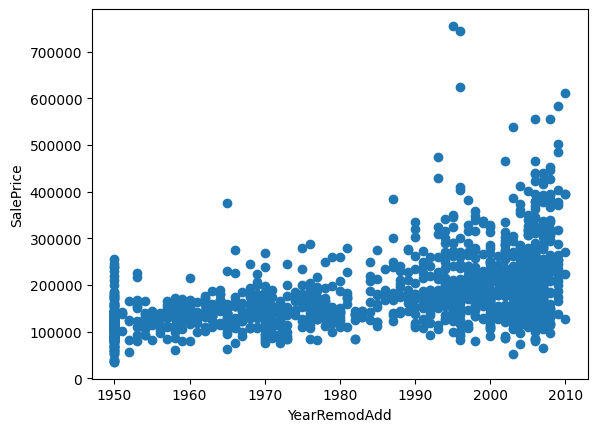

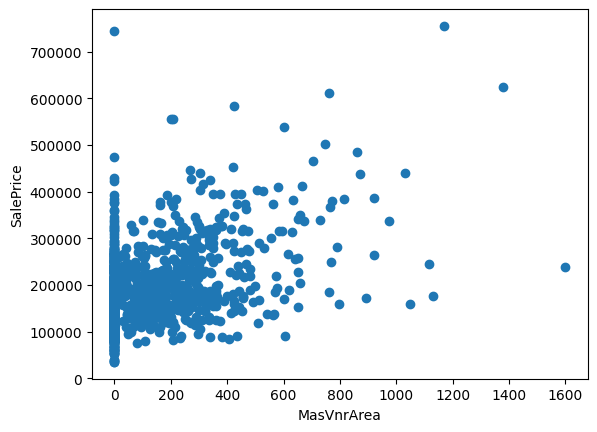

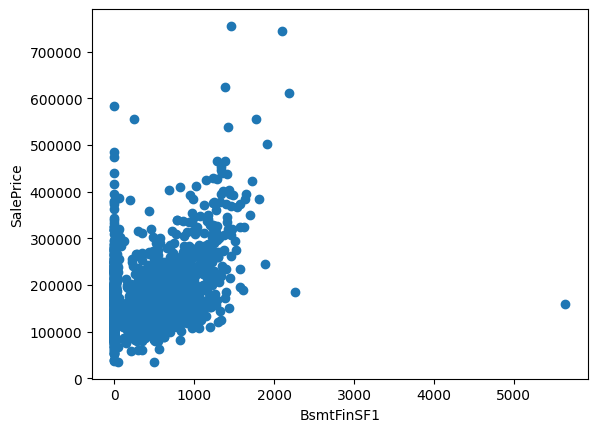

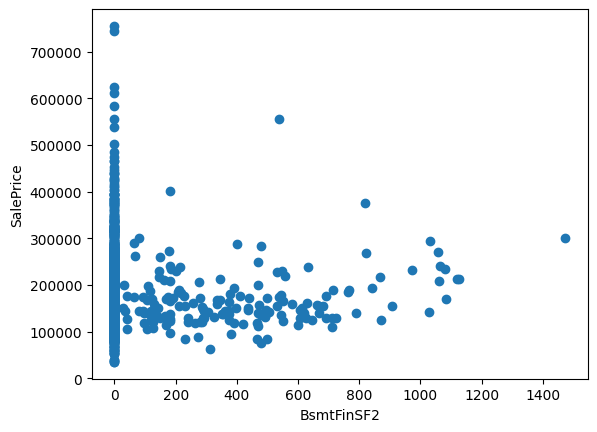

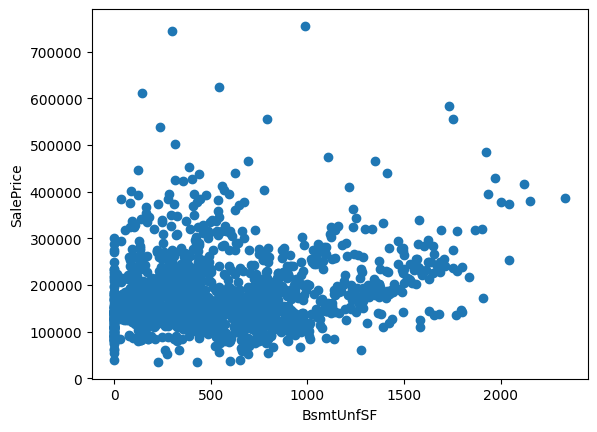

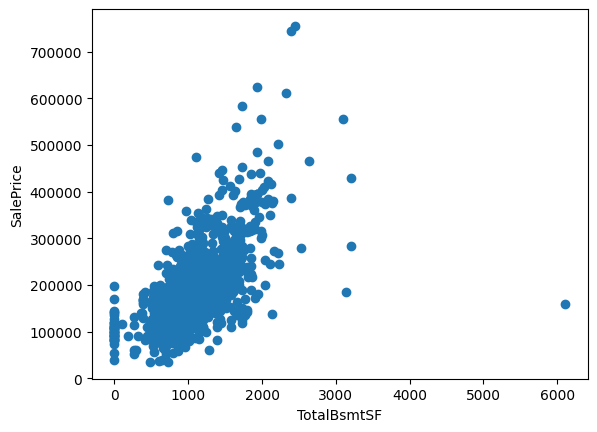

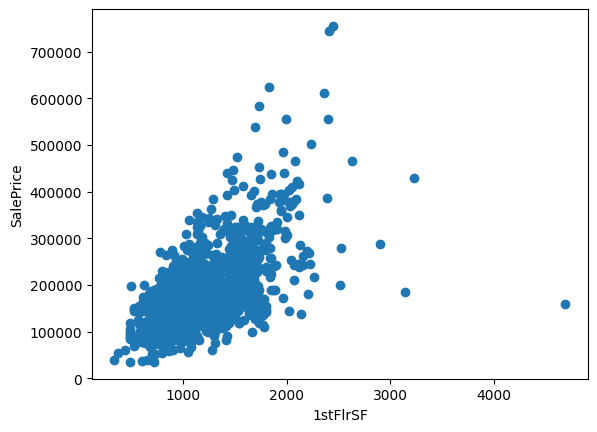

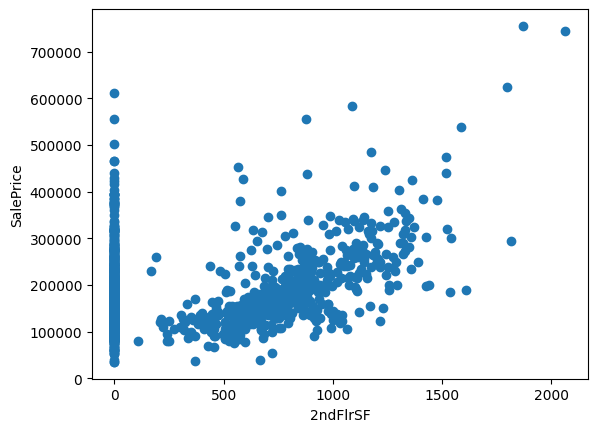

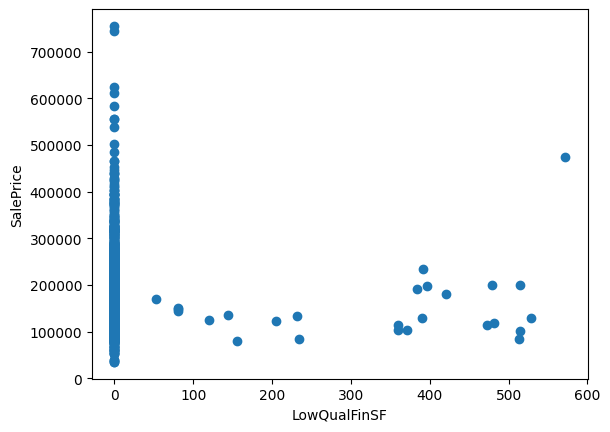

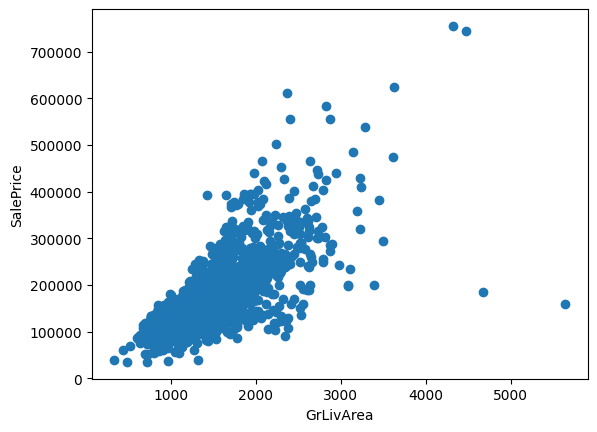

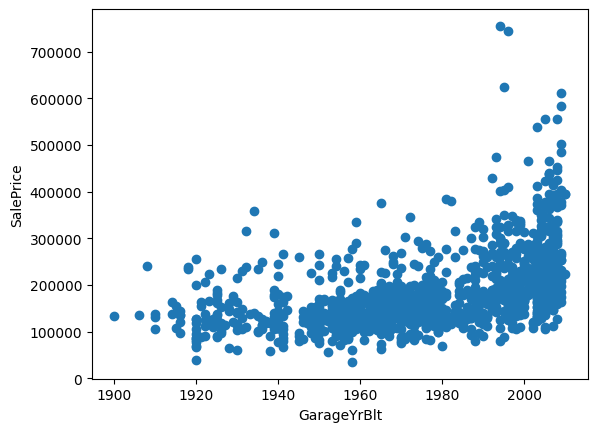

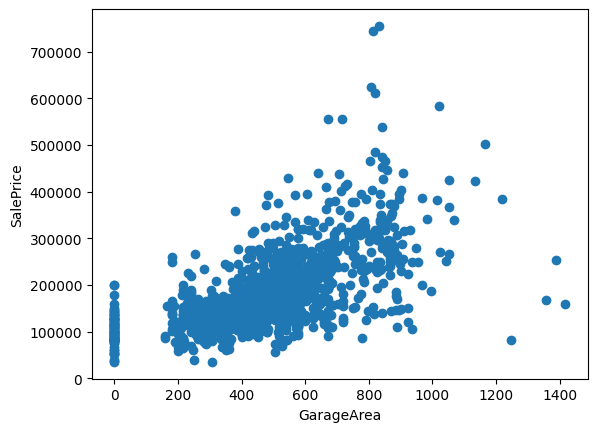

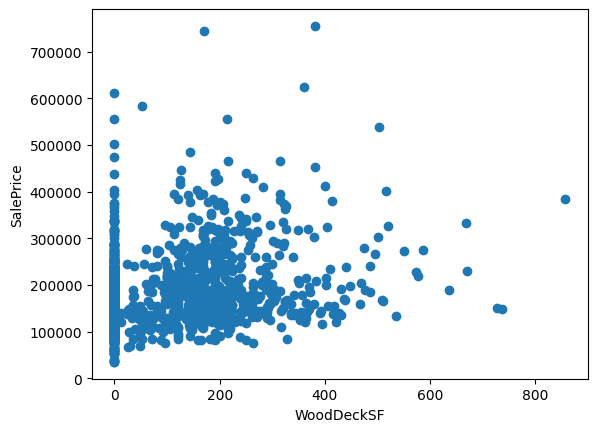

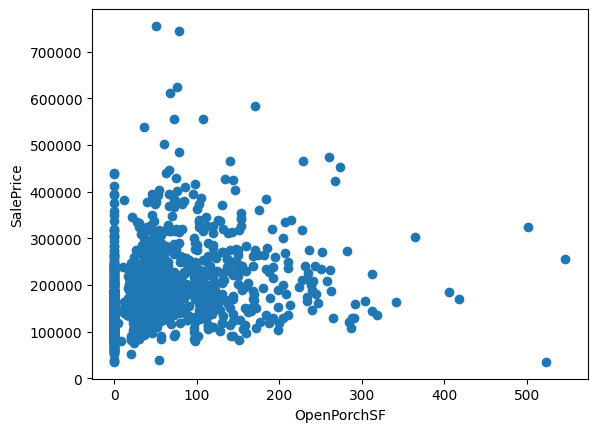

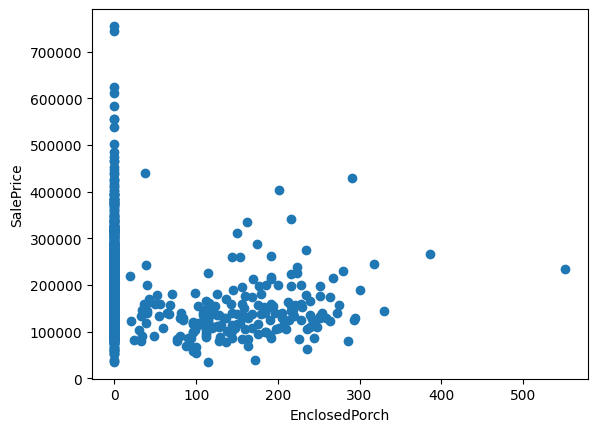

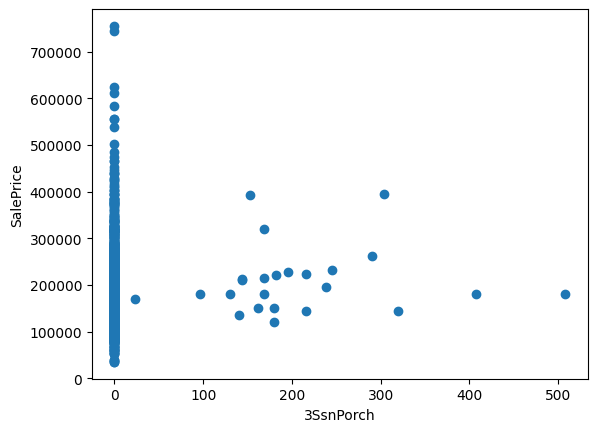

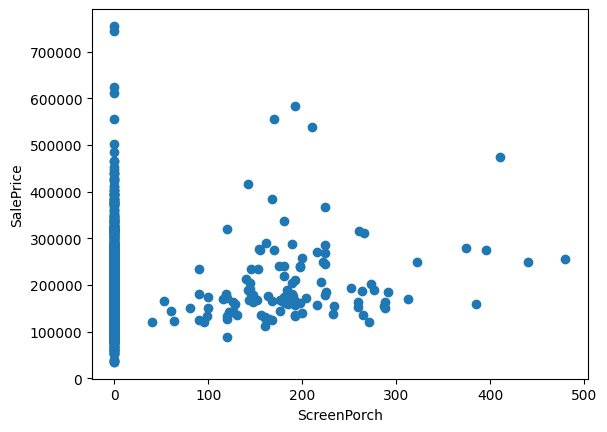

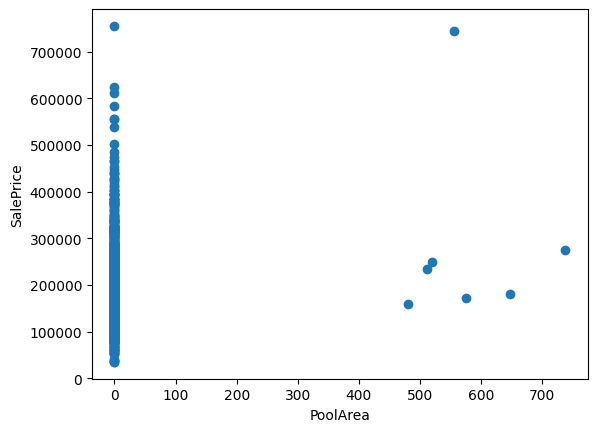

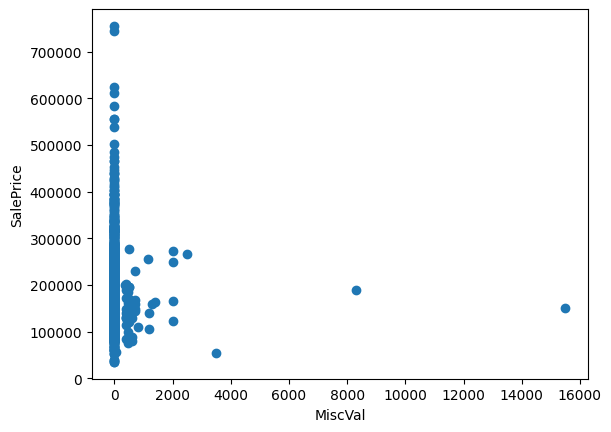

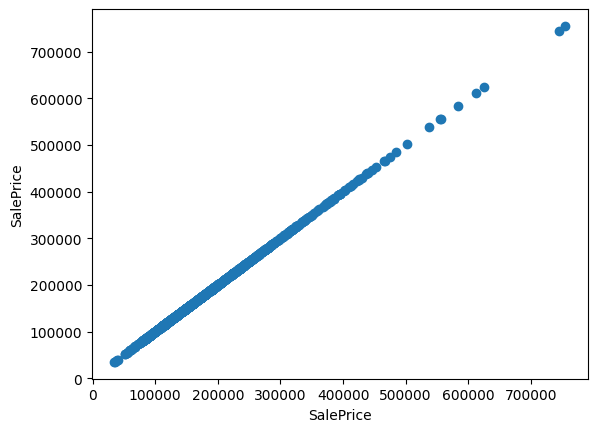

In [69]:
for cols in actual_numericals:
    plt.scatter(x = df[cols], y = 'SalePrice', data = df)
    plt.xlabel(cols)
    plt.ylabel('SalePrice')
    plt.show()

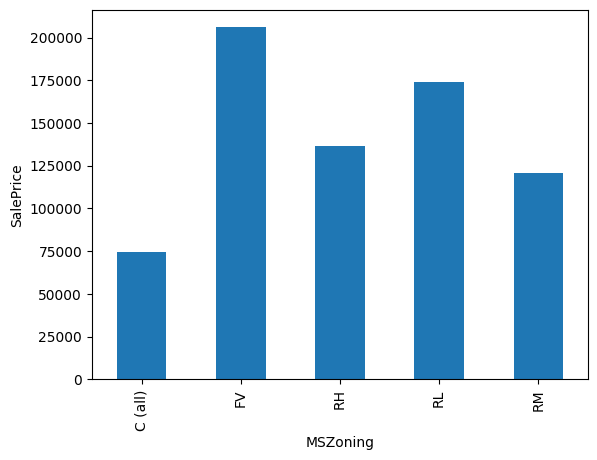

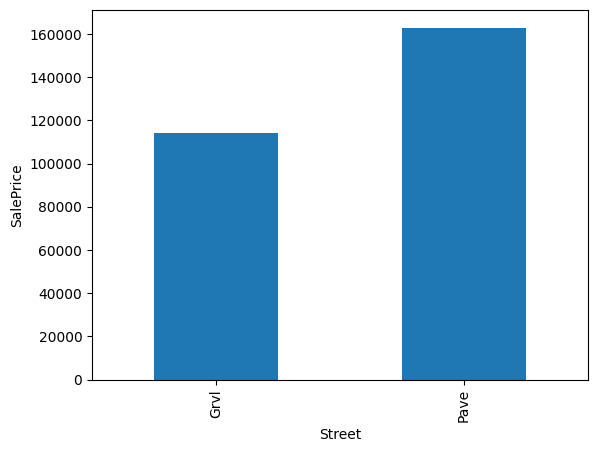

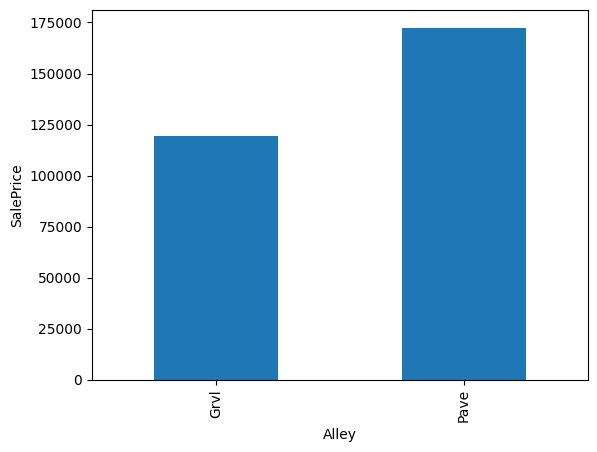

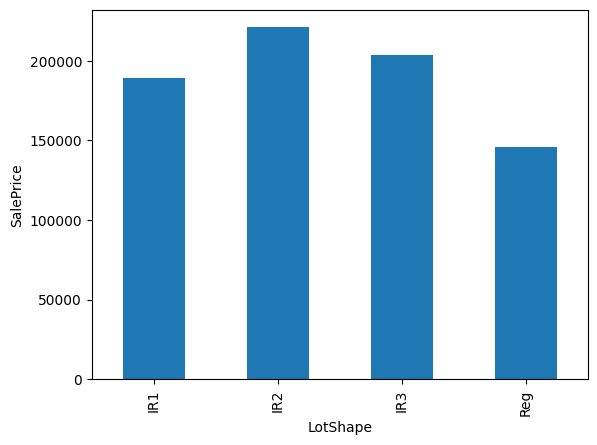

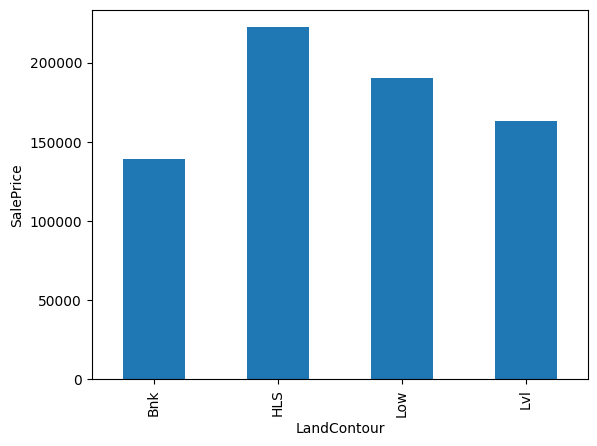

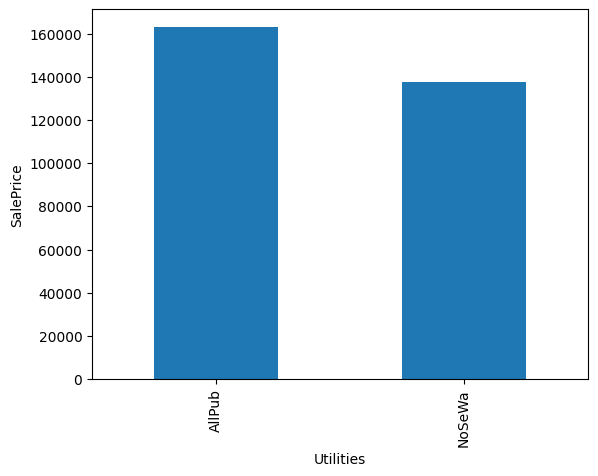

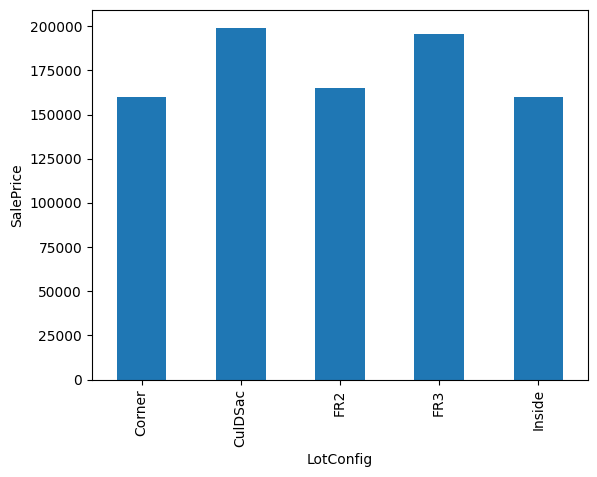

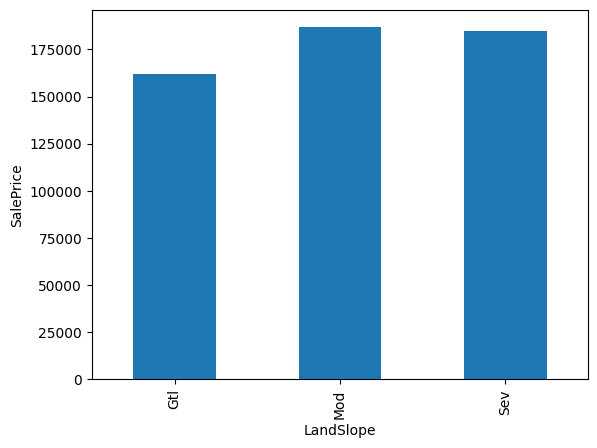

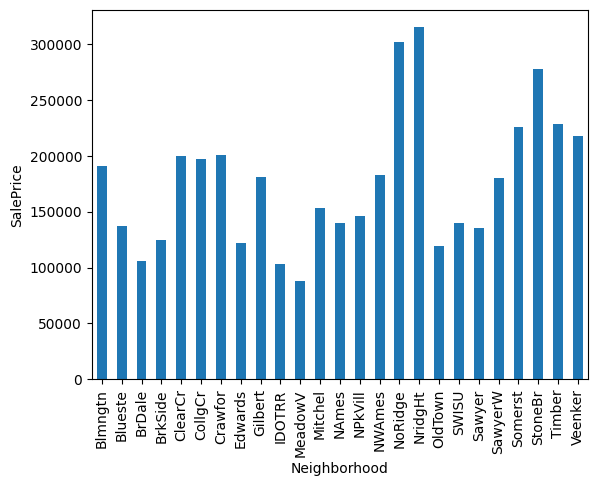

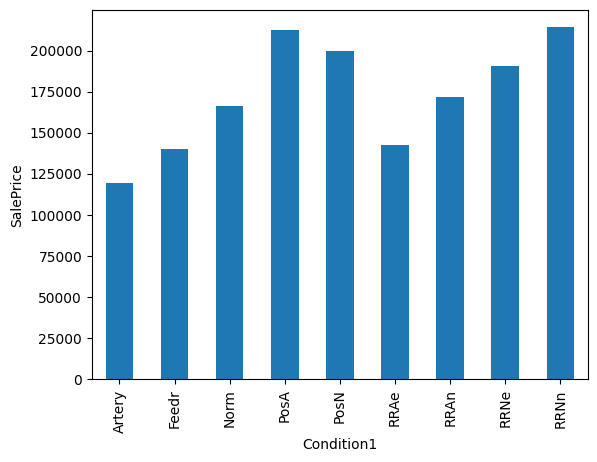

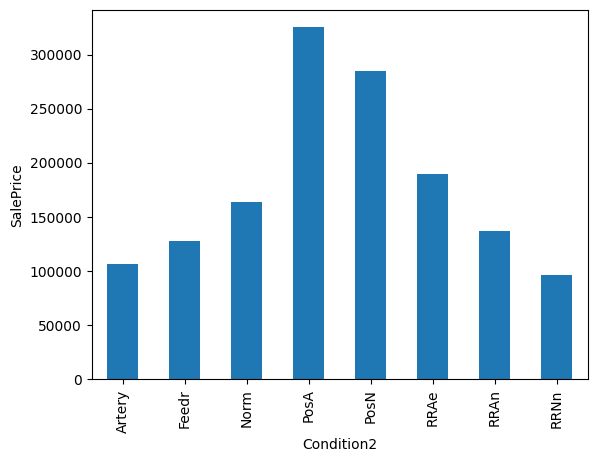

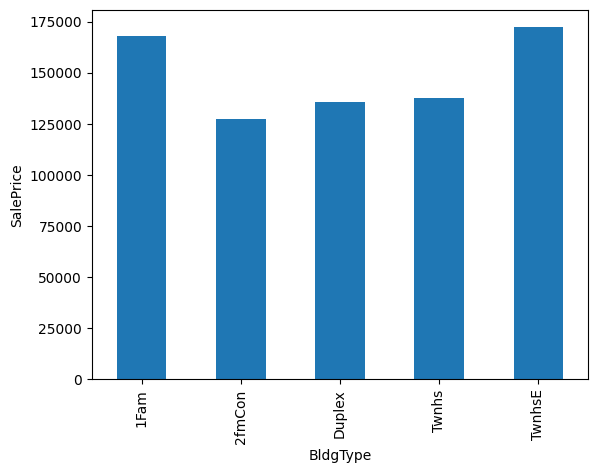

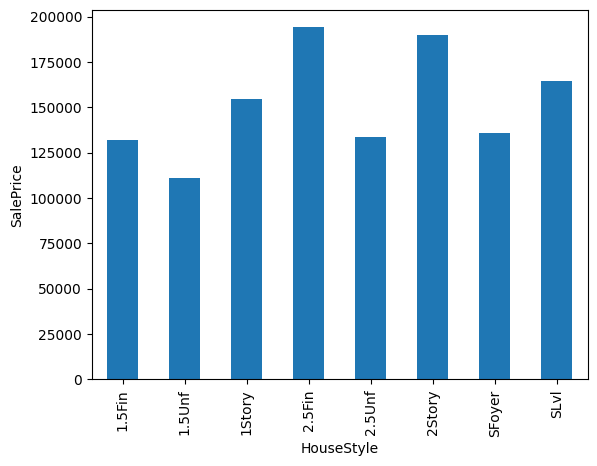

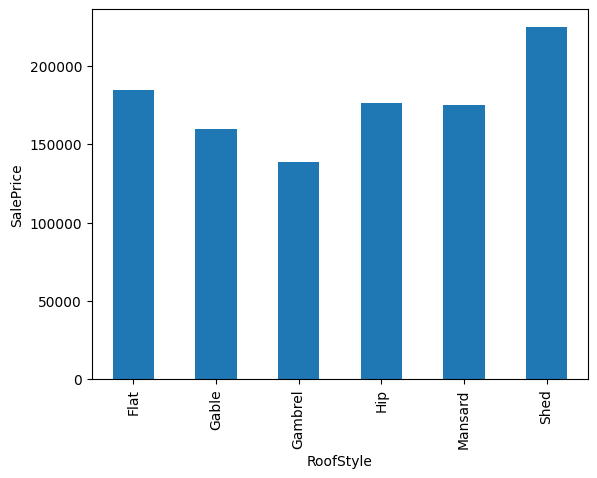

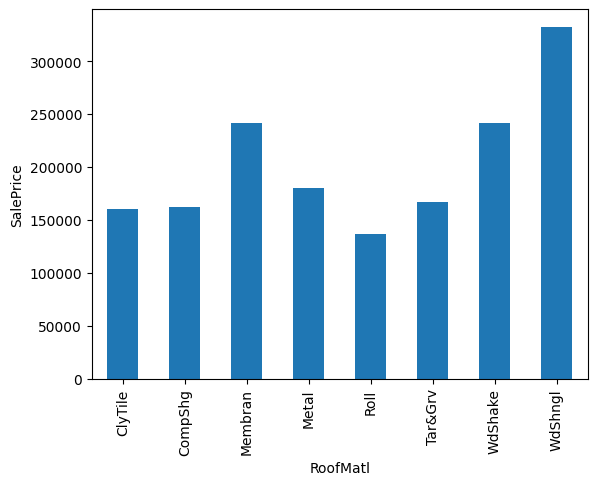

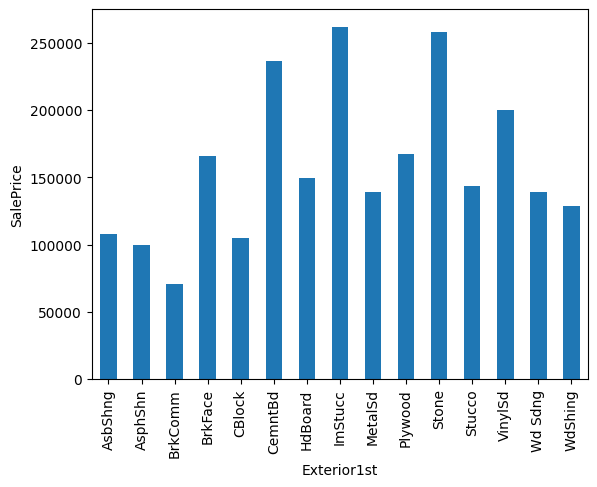

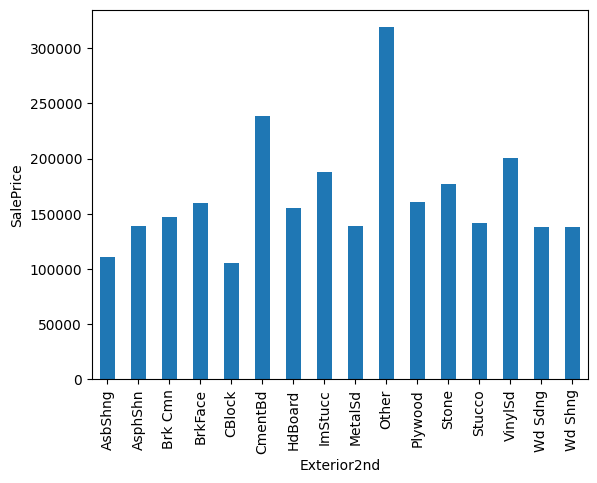

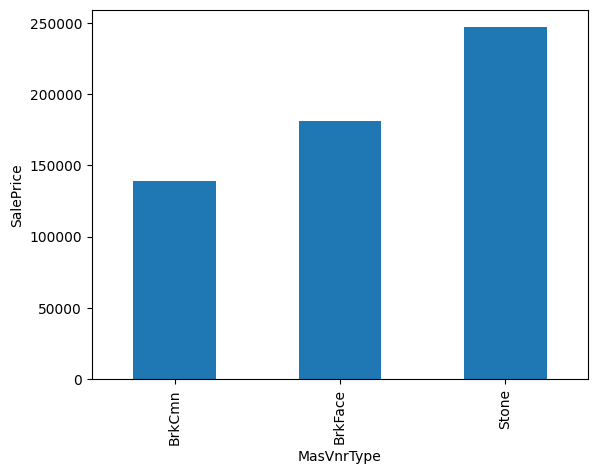

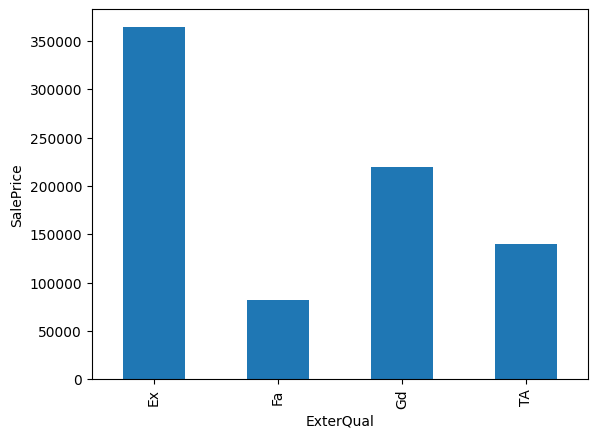

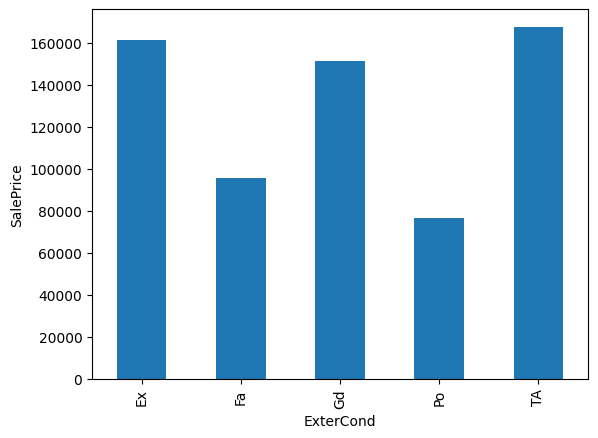

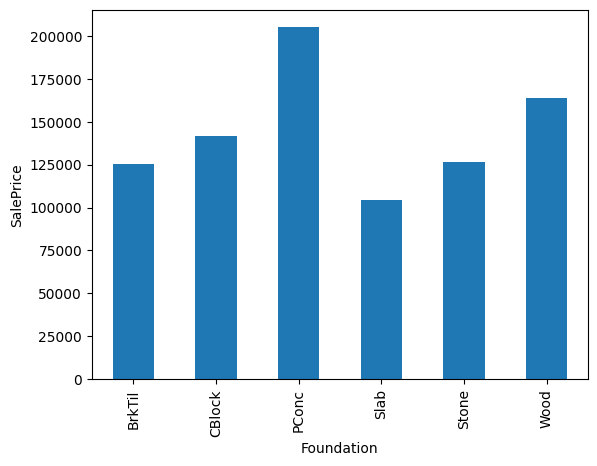

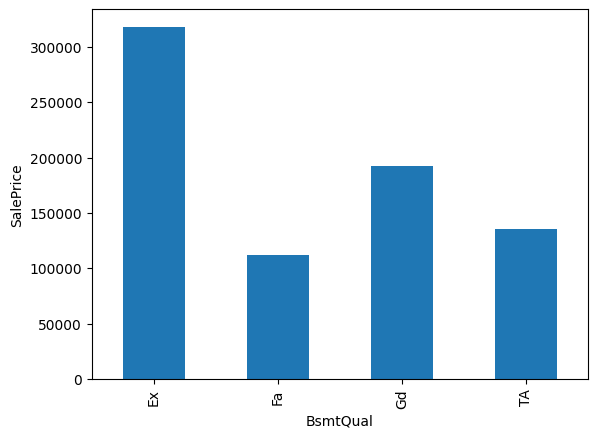

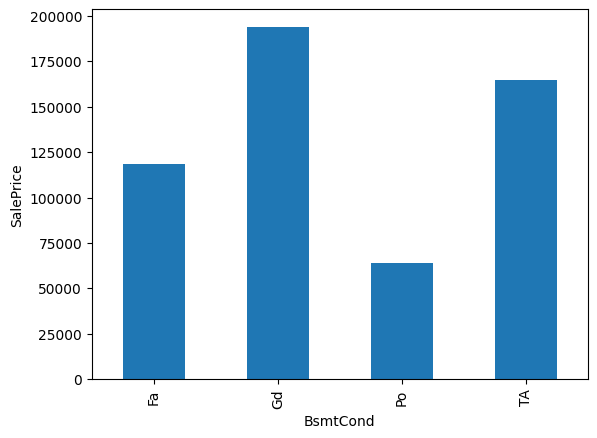

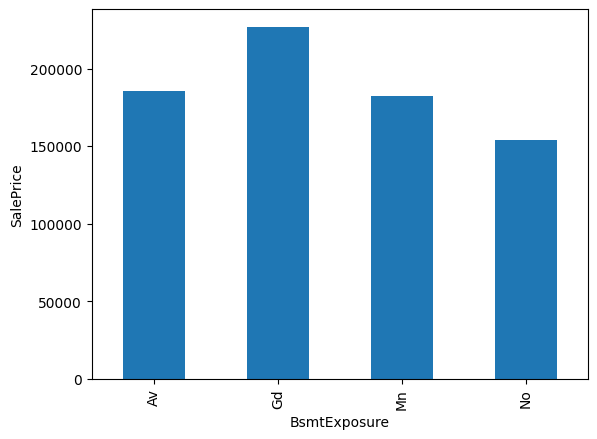

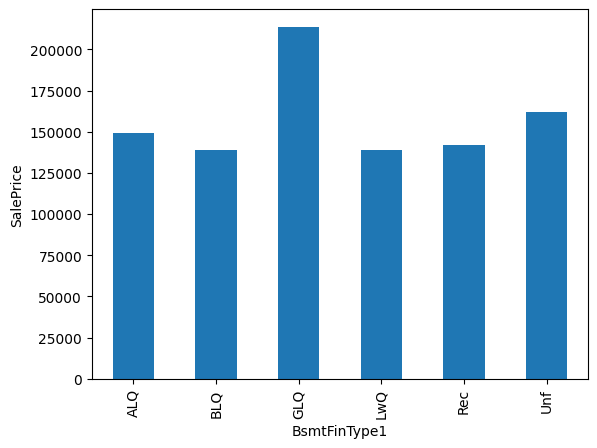

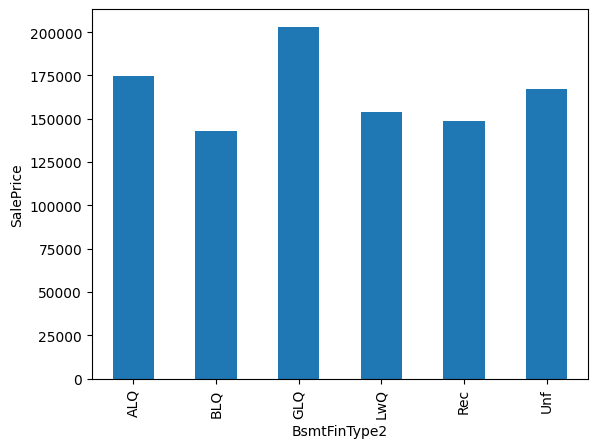

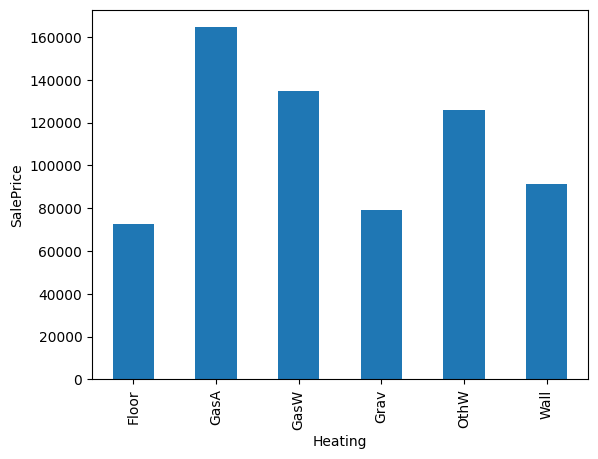

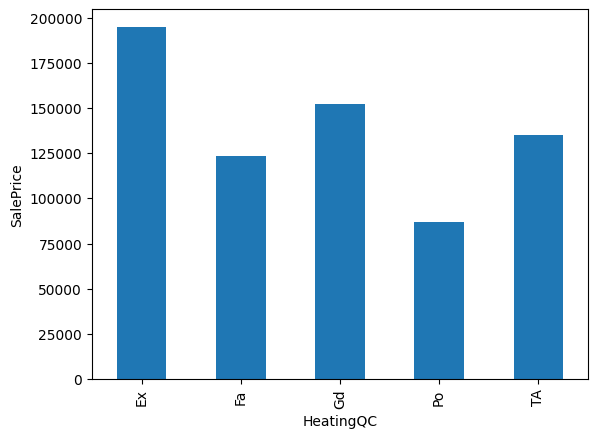

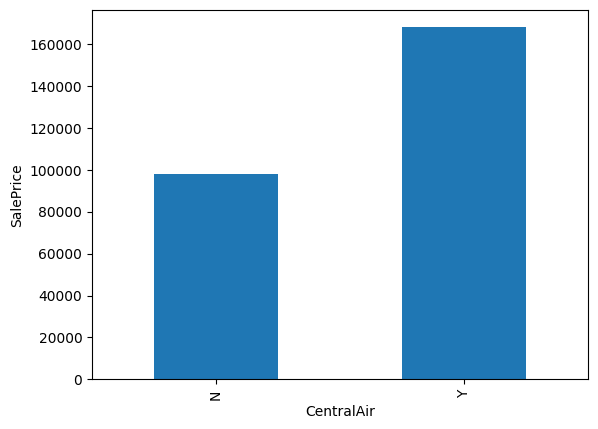

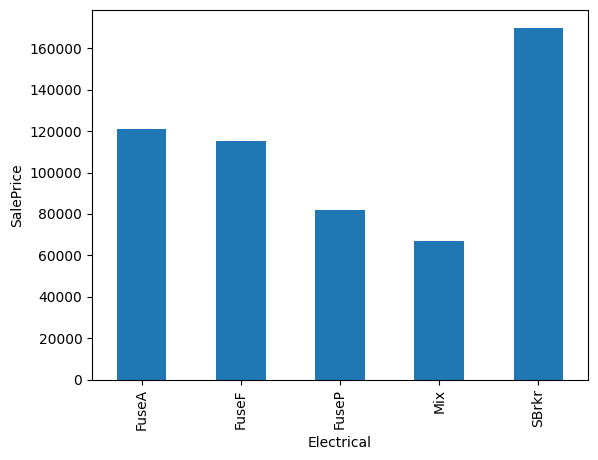

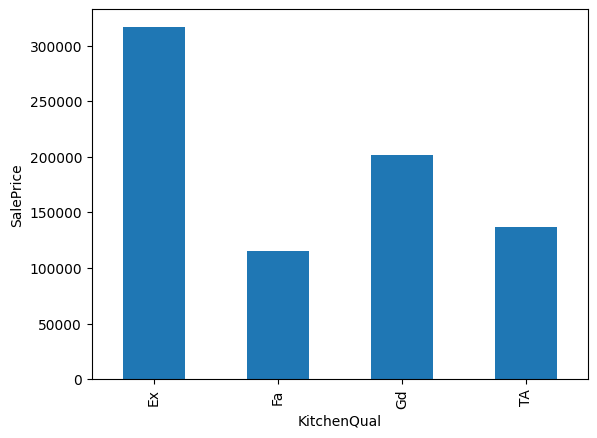

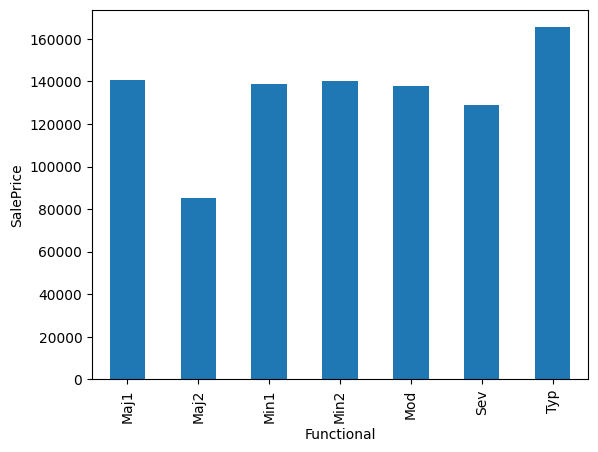

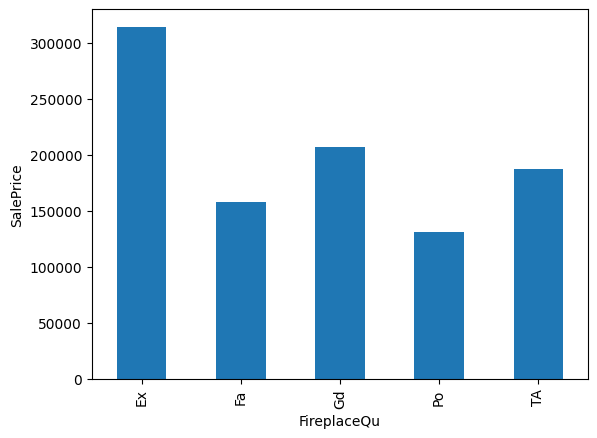

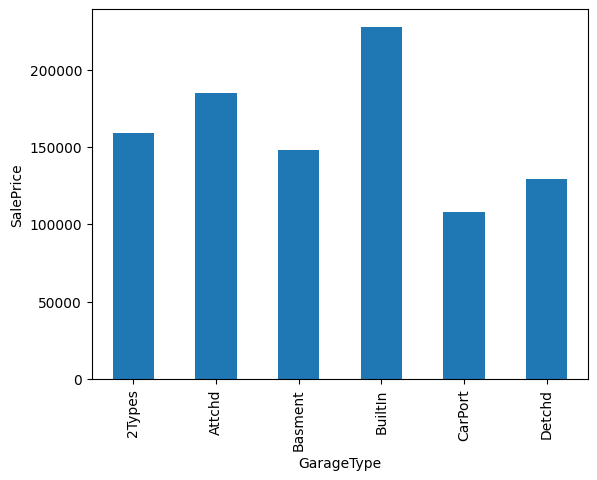

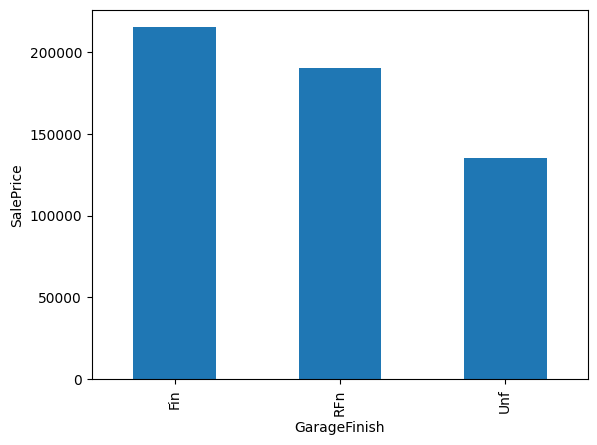

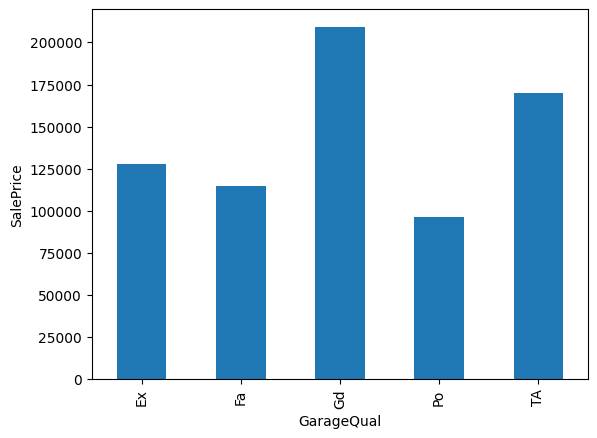

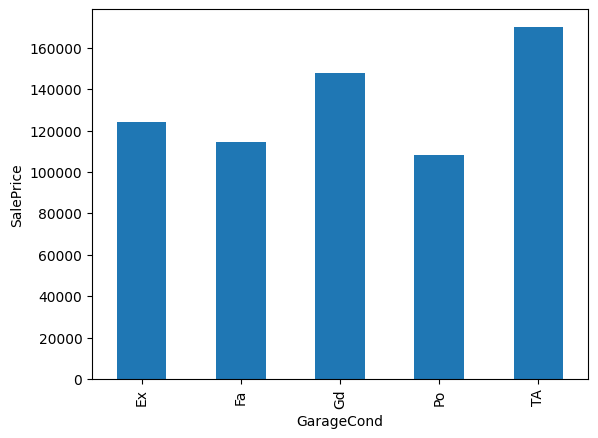

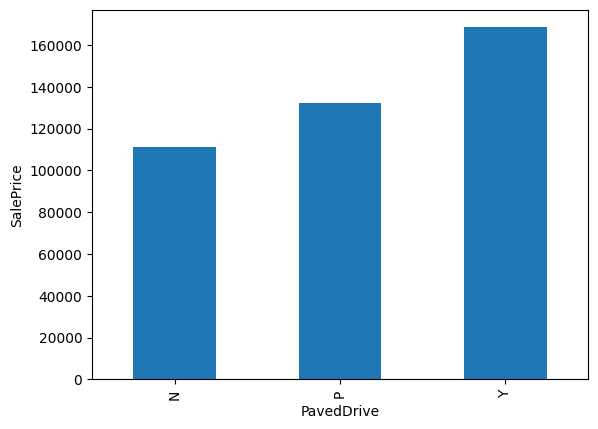

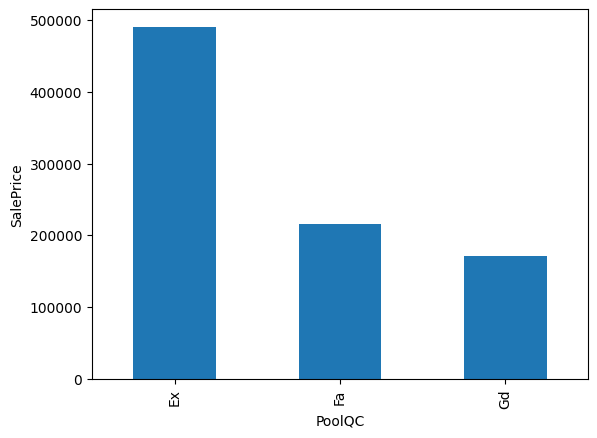

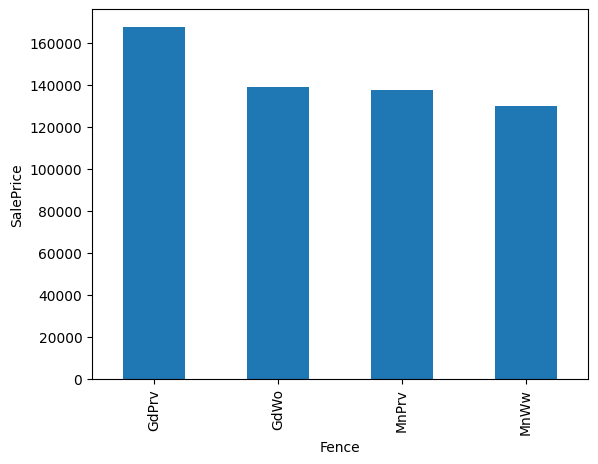

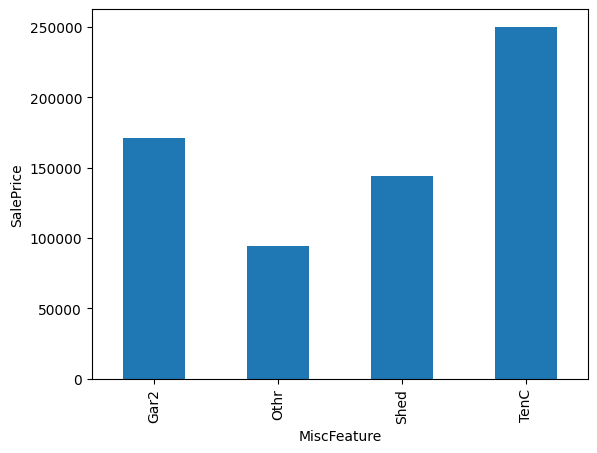

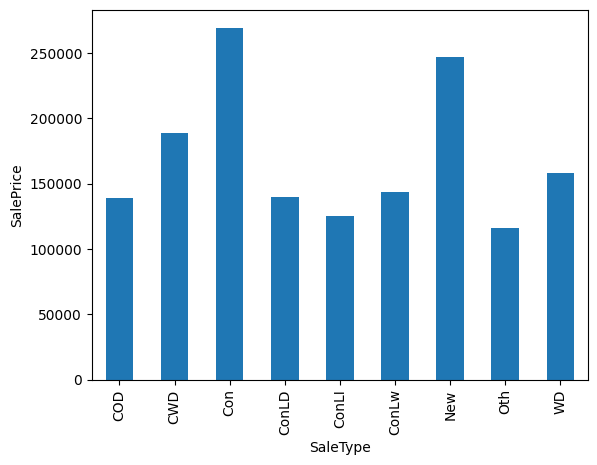

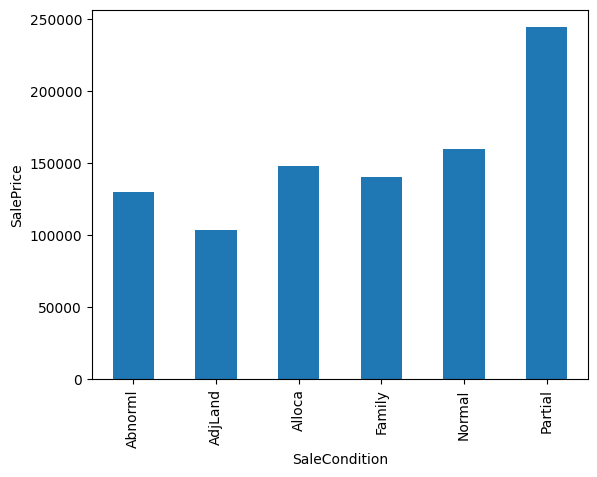

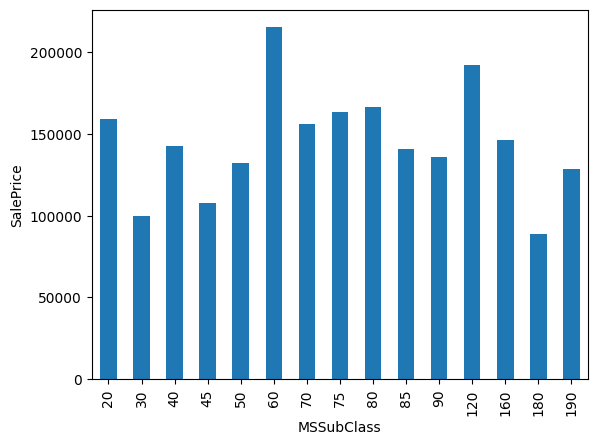

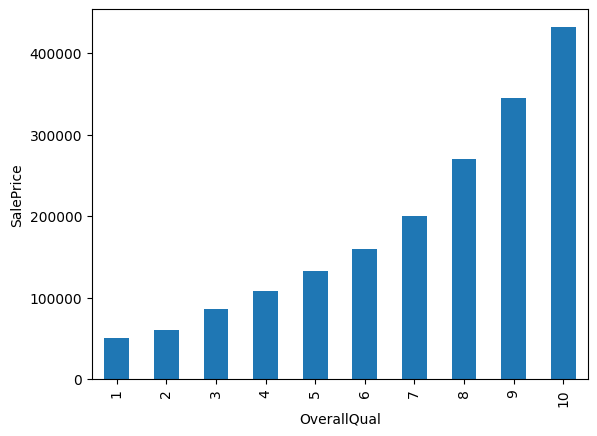

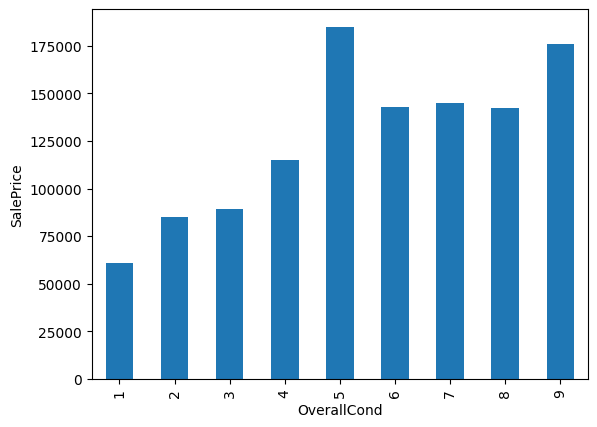

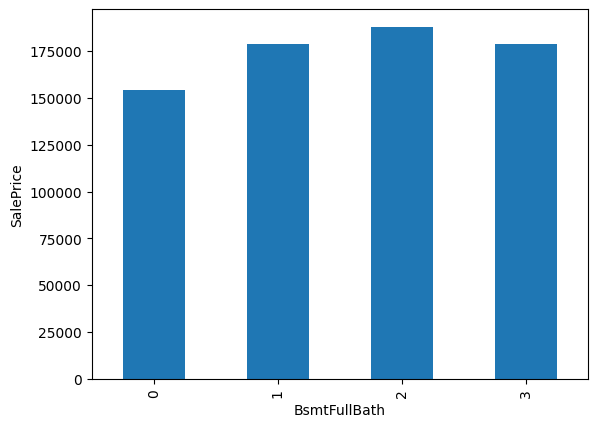

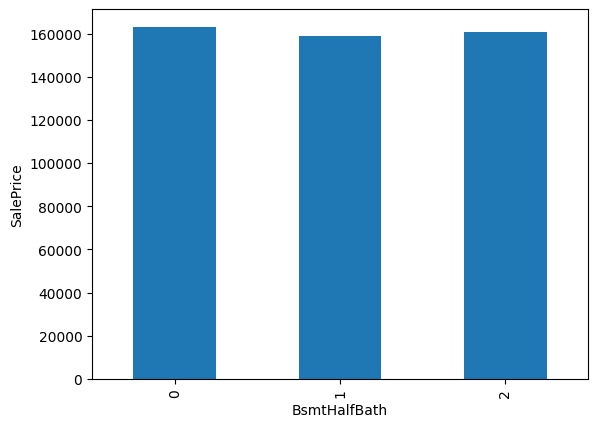

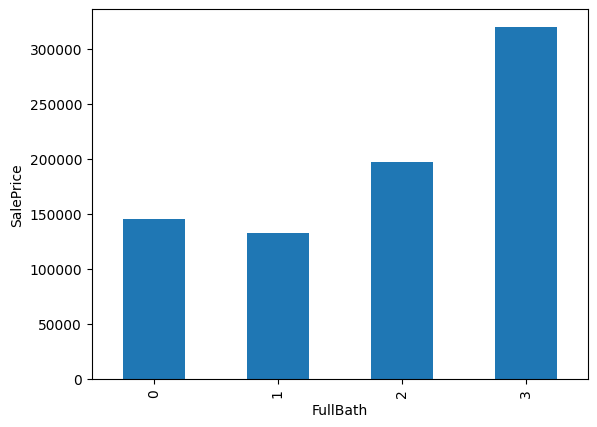

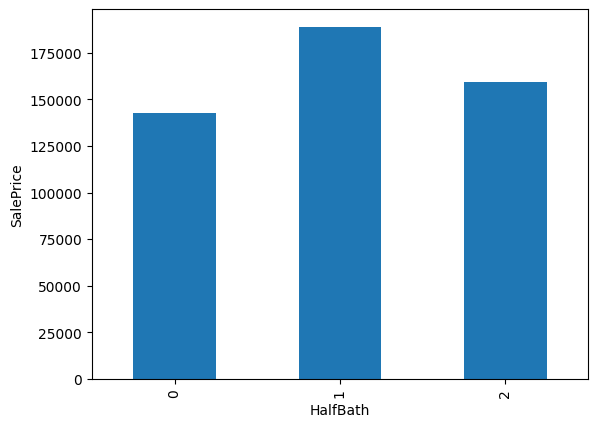

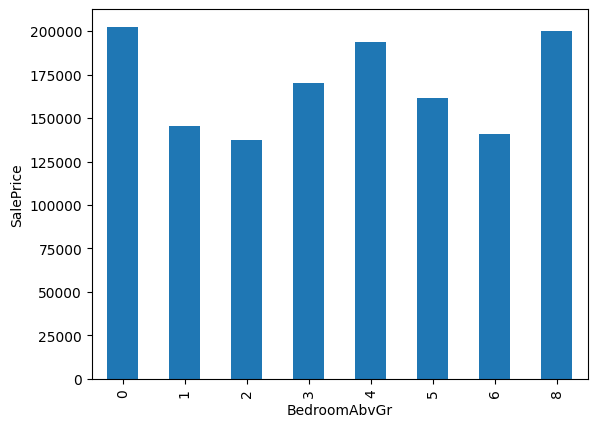

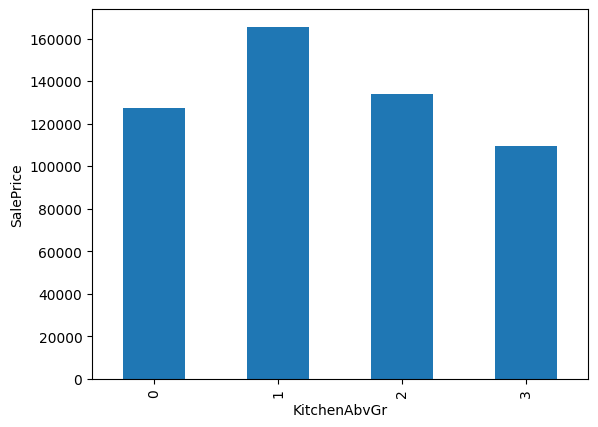

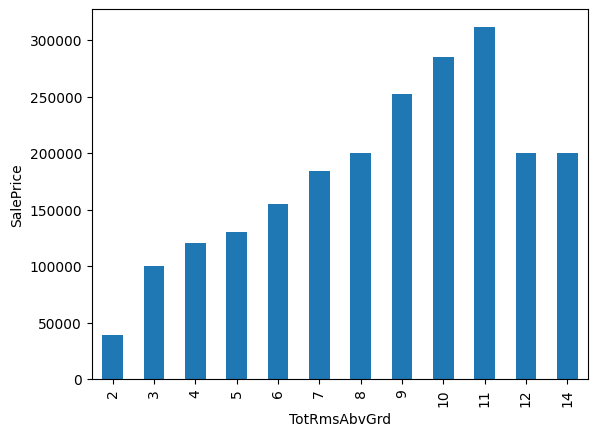

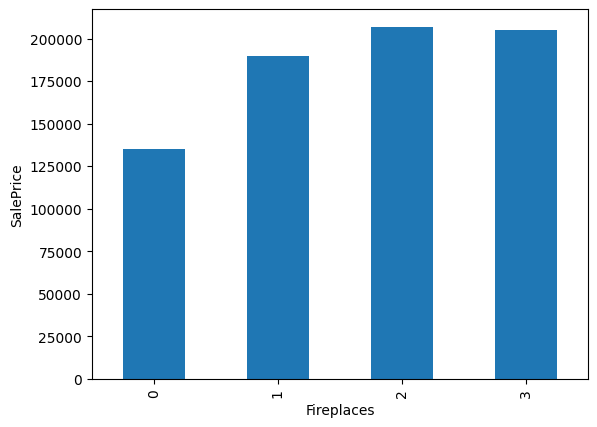

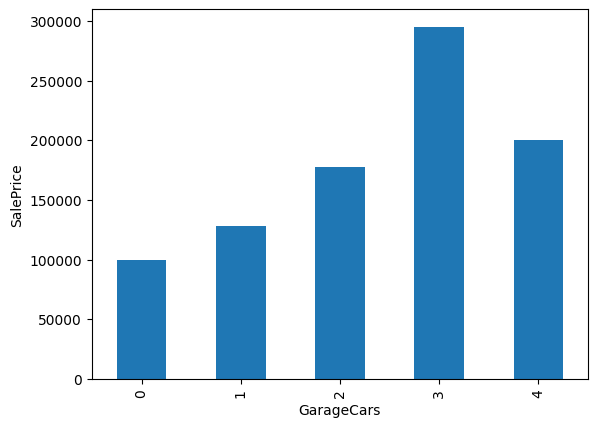

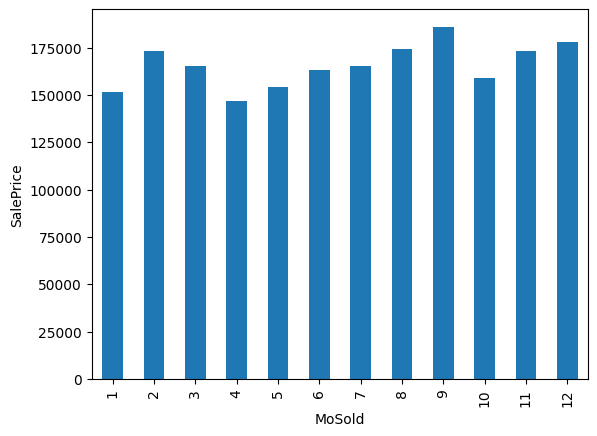

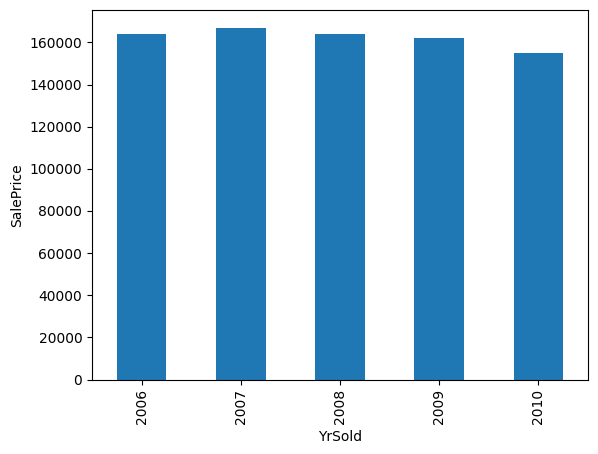

In [70]:
for cols in all_categoricals:
#the line below plots each column against the median of the particular category in its column.
# each bar value in a chart refers to the median value of that bar, and every bar represents a 
#category in a column
    df.groupby(cols)['SalePrice'].median().plot.bar() 
    plt.xlabel(cols)
    plt.ylabel('SalePrice')
    plt.show()

Looking through this, we can see what categories in a column attract a higher sale price and what categories attract a lower sale price.
Eg In MSZoning, FV has the highest sale price while C (all) has the lowest sale price

___

# Data Cleaning

**Key Notes to implement in cleaning**
1. Handle missing variables
2. Correct datatypes
3. drop Id, features with low variance (Utilities,Street,Condition2,RoofMatl, Heating), 
4. Handle outliers in grlivarea


## 1. Handling missing variables

In the exploration portion of this notebook, under the <a href="#1.-Visualizing-the-missing-values">Visualizing the missing values</a> section, we recorded 19 features with missing values. It is time to handle those missing values

In [71]:
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [72]:
# These features are all categorical and the data description suggest that na/null indicates the the particular house does not have this feature

none_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',
              'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond',
              'BsmtQual', 'MasVnrType']

df[none_features] = df[none_features].fillna('None')


In [73]:
# Group by Neighborhood, get median of Lot frontage for each neighborhood, and used that median value to fill Lotfrontage missing values.
# Every neighboorhood will have the same LotFrontage value (for missing values only)

df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby('Neighborhood')['LotFrontage'].transform('median'))


In [74]:
# These are numerical features, null values probably mean that that house does not have this particular feature

zero_features = ['MasVnrArea', 'GarageYrBlt']
df[zero_features] = df[zero_features].fillna(0)


In [75]:
# This feature has a very small number of missing value, so we will replace with mode of the feature

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [76]:
# confirm that all missing values have been handled

df.isnull().sum().sum()

0

There are no more missing values

## 2. Correcting the datatypes of some features

In the exploratory section, we found out that some categorical features were disguised as numericals, so here, we will be changing the datatypes of these features.

### Changing the all_categoricals features to categorical datatype

In <a href="#3.-Univariate-analysis---Bar-plots-on-object-variables"> Objects Section</a> we created a new variable called all_categoricals which combined the actual object datatype features and the fake numericals, now we will change all the datatype of the fake_numericals to object datatype.

In [77]:
print(fake_numericals)

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']


In [78]:
df[fake_numericals] = df[fake_numericals] .astype('object')

In [79]:
df['MSZoning'].dtype

dtype('O')

## 3. Dropping Irrelevant features

In <a href="#3.-Univariate-analysis---Bar-plots-on-object-variables"> Objects Section</a> we noticed some features with low variance, they will have to be dropped. Also we will be drooping the ID column as it is very irrelevant to our analysis.

In [80]:
df.drop(['Id','Utilities','Street','Condition2','RoofMatl', 'Heating'], axis = 1, inplace = True)


In [81]:
df.shape

(1460, 75)

All 6 columns have been dropped

## 4. Deleting Outliers

In <a href="#5.-Bivariate-analysis---Scatterplot-between-actual-numericals-and-target-variable-(SalePrice)"> Numerical Section</a> we noticed a significant outlier in GrLivArea, where a large area had a very low price. These areas(rows) will be dropped from our dataset and if these rows also have outliers in other features, this drop will fix it all.

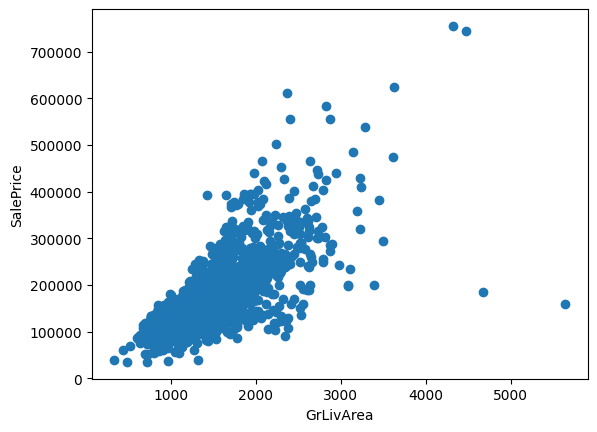

In [82]:
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice');

Delete those lower points after 4000 in the x axis and under 300,000 in y axis

In [83]:
# This drops the rows with the outlier

df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice'] < 300000)].index)

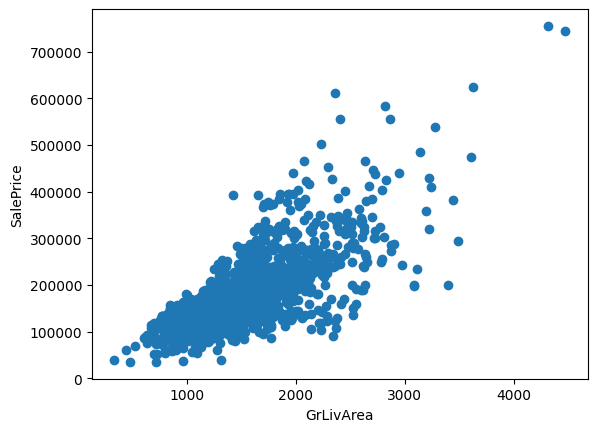

In [84]:
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice');

In [85]:
df.shape

(1458, 75)

Notice that those 2 bottom point are no longer present

___

# Feature Engineering

**Key notes to implement in Feature Engineering**
1. normalize data by fixing skweness of all actual numericals including saleprice (using log transform for non zeros and boxcox for withzero)
2. Ordinal encode ordered categoricals
3. One hot encode nominal categoricals
4. scaling data #Might not use

## 1. Normalizing numerical features 

In <a href="#2.-Univariate-analysis---distplot-on-numerical-features"> Univariate Analysis Section</a> we noticed that all the numerical features were skewed. We will normalize each features distrubution by using box cox transformation, however we will remove the date features because we do not trandform datetime features

In [86]:
numericals = [feature for feature in df.columns if df[feature].dtypes != 'O' and 'Year' not in feature and 'Yr' not in feature]
print(numericals)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [87]:
from scipy.stats import norm, skew

Skewness = df[numericals].skew()
Skewness.sort_values(ascending = False)

MiscVal          24.460085
PoolArea         15.948945
LotArea          12.573925
3SsnPorch        10.297106
LowQualFinSF      9.004955
BsmtFinSF2        4.251925
ScreenPorch       4.118929
EnclosedPorch     3.087164
MasVnrArea        2.696329
OpenPorchSF       2.339829
SalePrice         1.881296
LotFrontage       1.547767
WoodDeckSF        1.545805
GrLivArea         1.010992
BsmtUnfSF         0.920903
1stFlrSF          0.887637
2ndFlrSF          0.812957
BsmtFinSF1        0.764789
TotalBsmtSF       0.511703
GarageArea        0.131748
dtype: float64

### Let us visualize the distibution of these features using distplot and QQplot

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


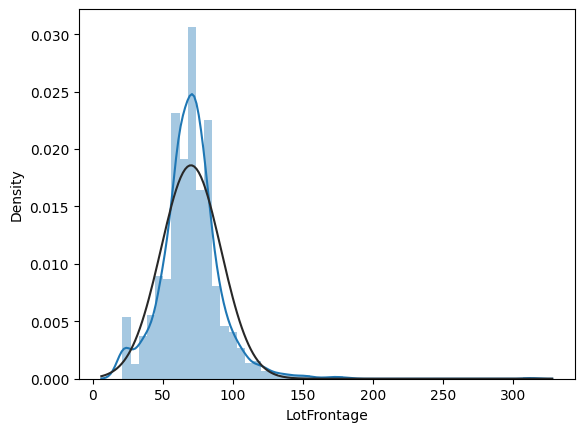

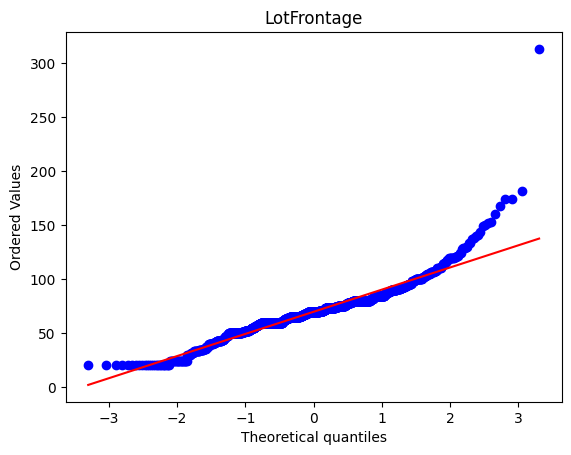

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


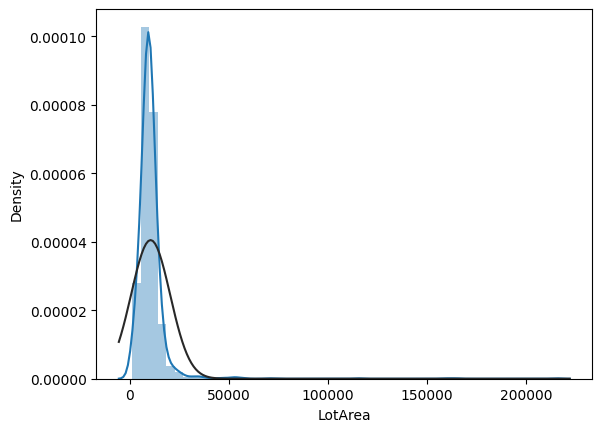

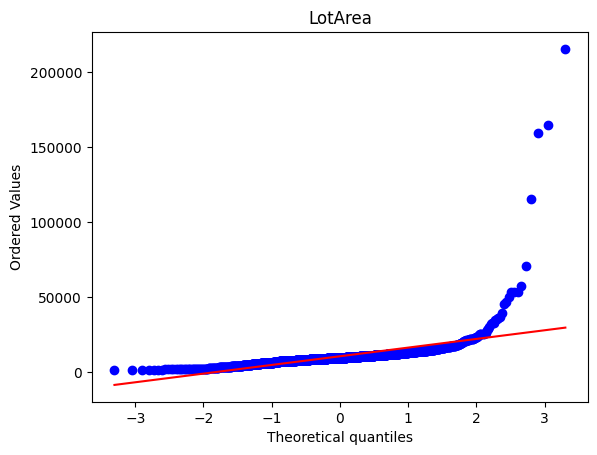

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


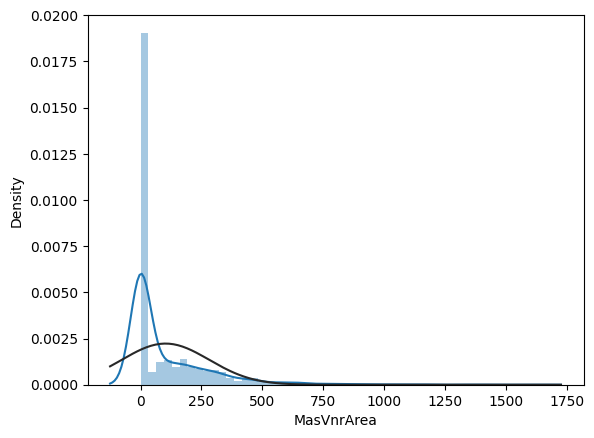

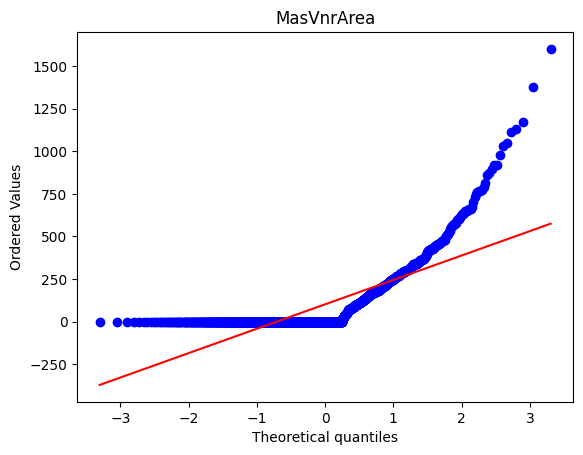

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


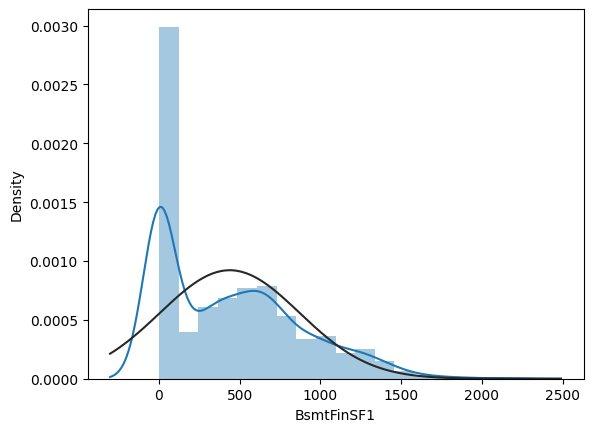

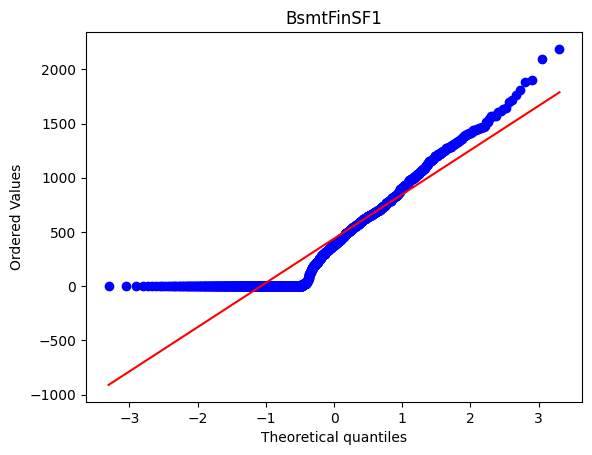

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


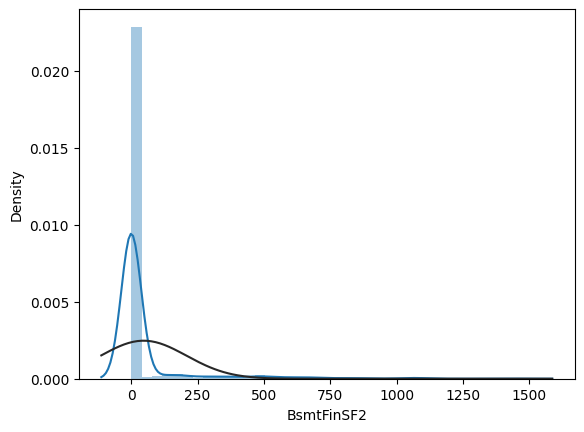

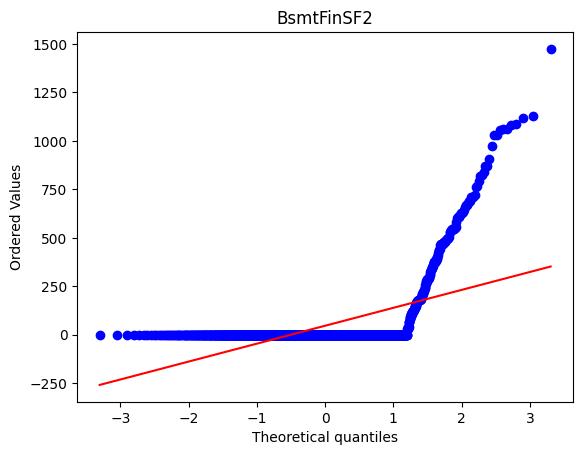

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


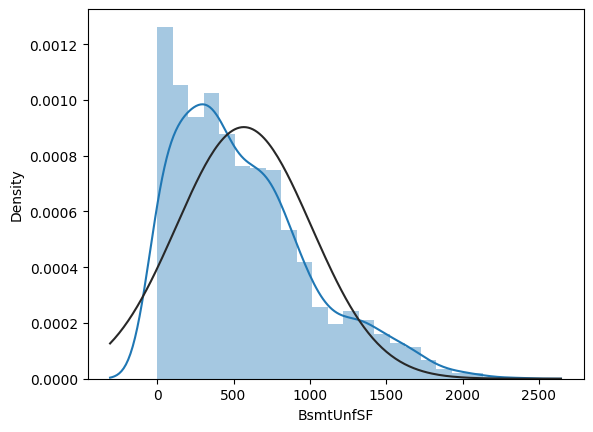

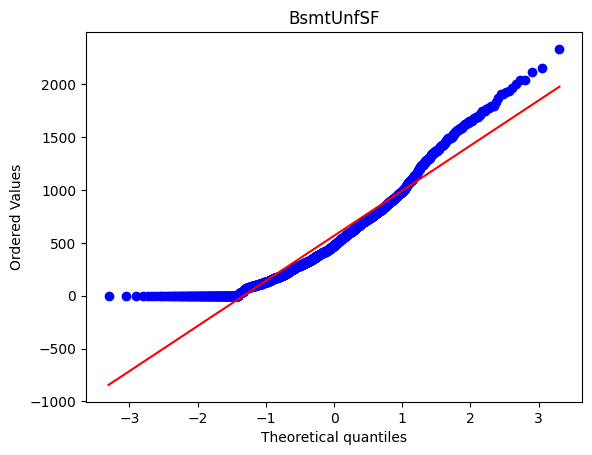

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


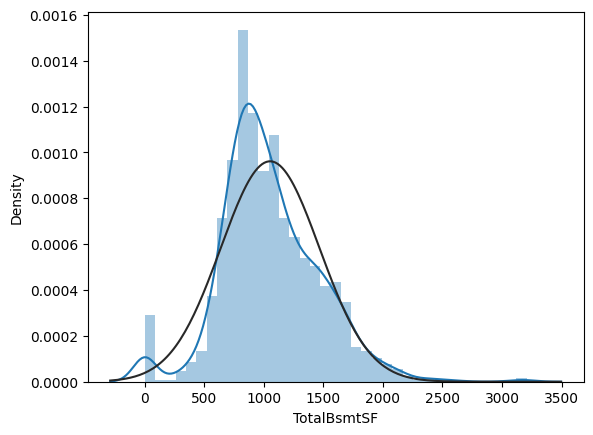

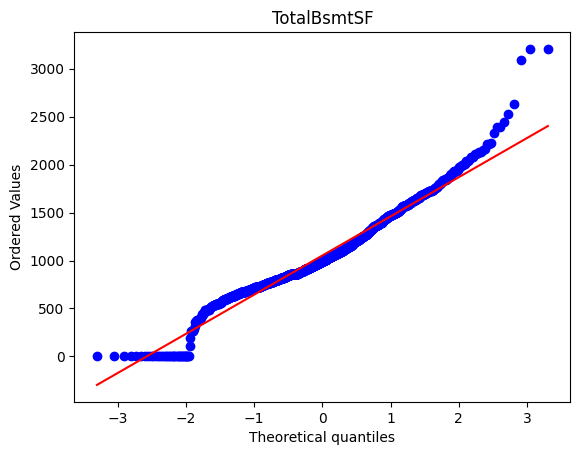

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


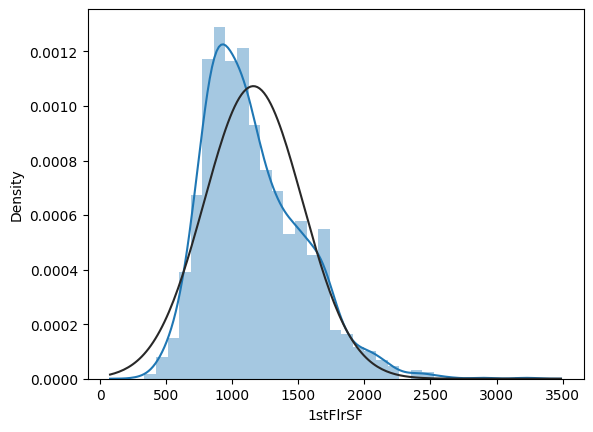

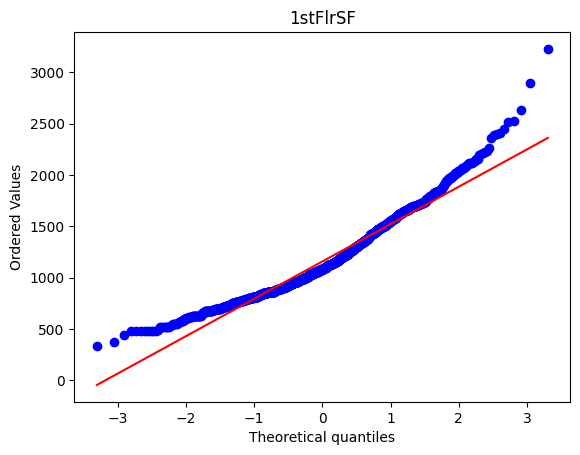

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


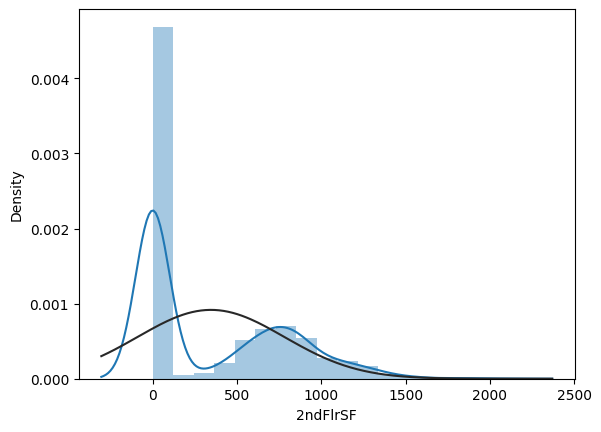

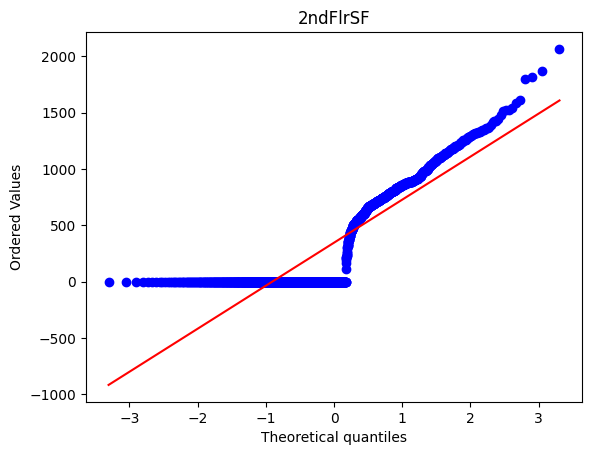

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


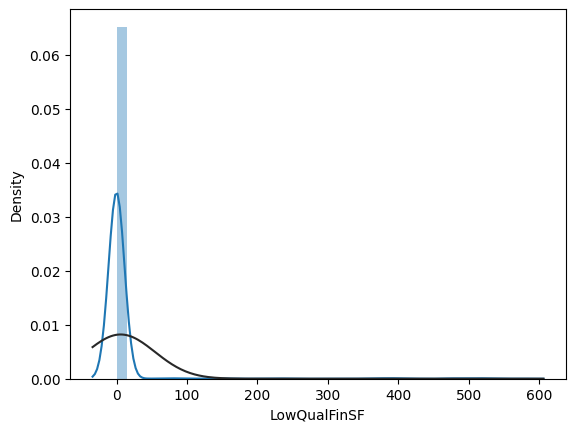

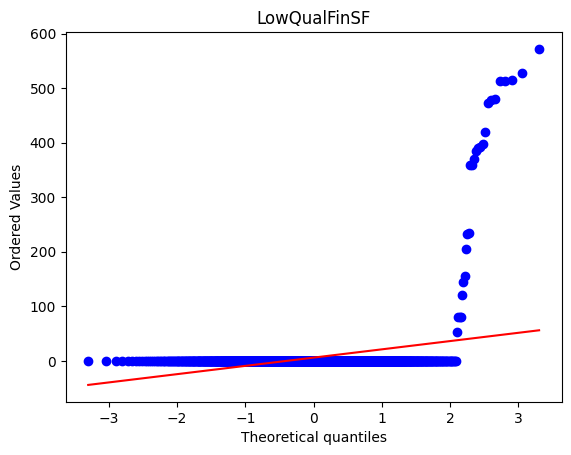

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


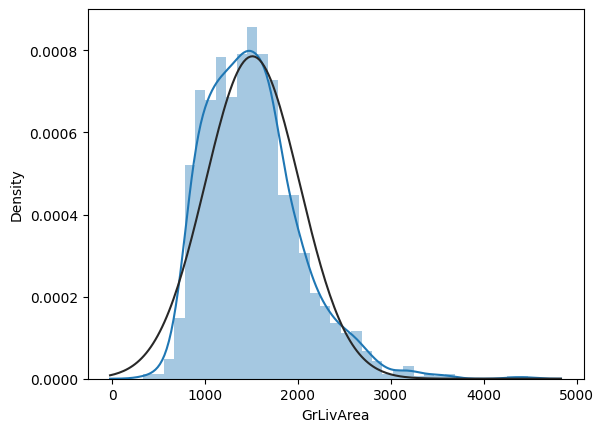

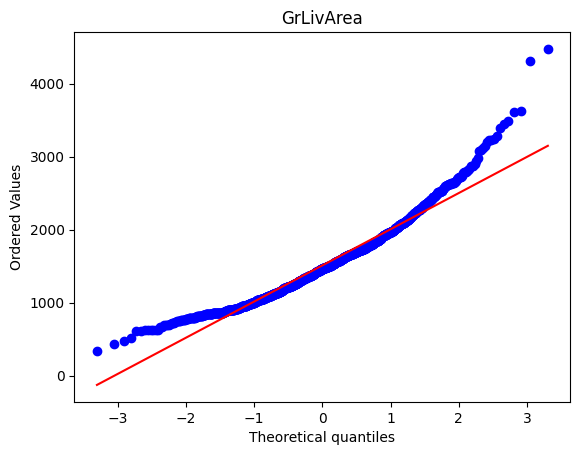

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


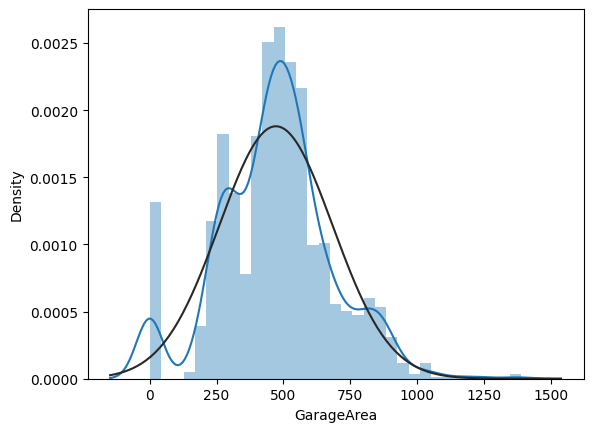

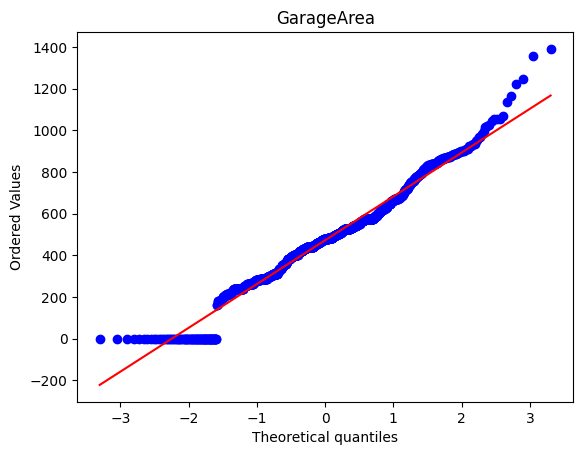

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


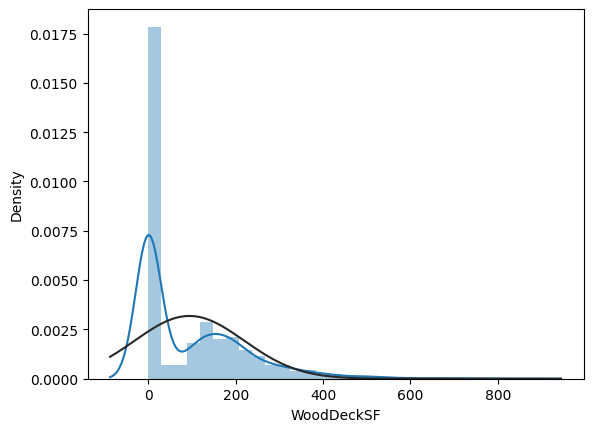

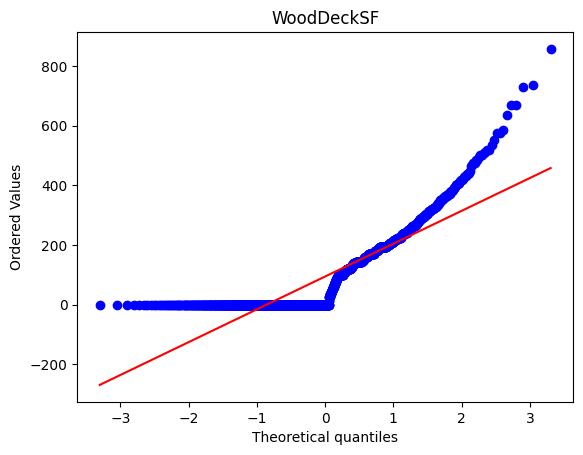

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


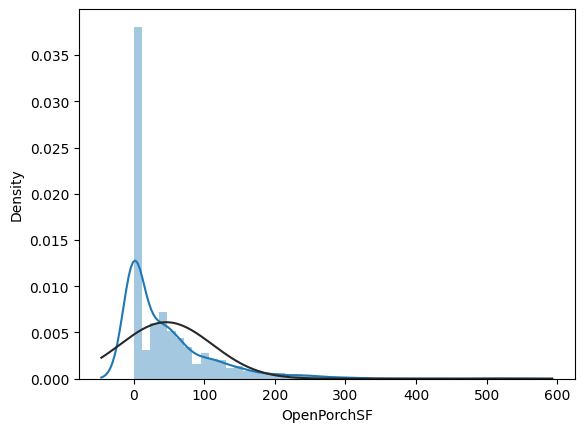

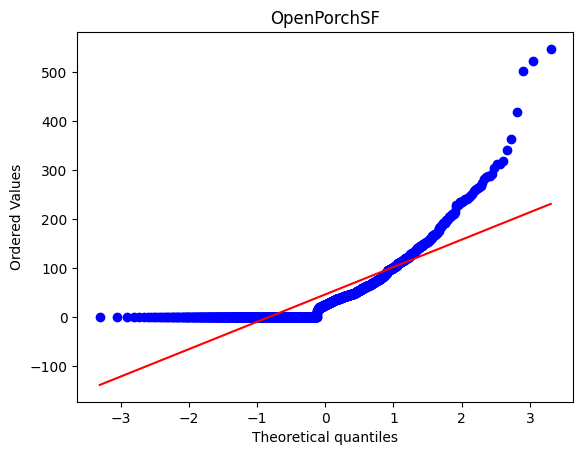

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


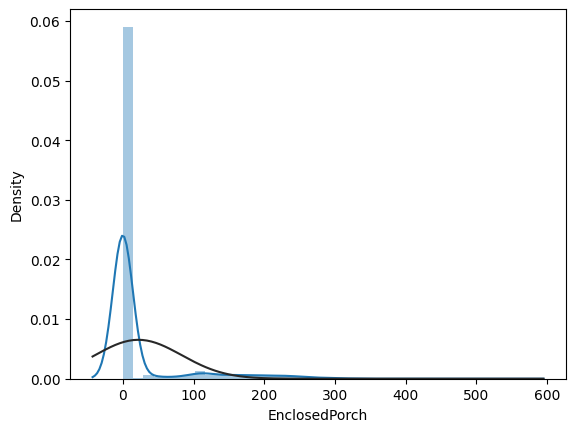

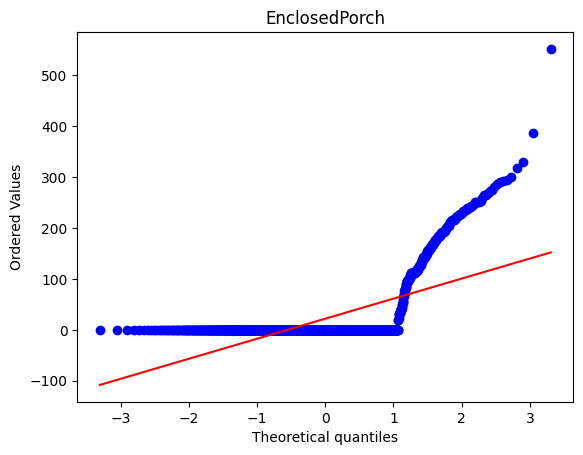

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


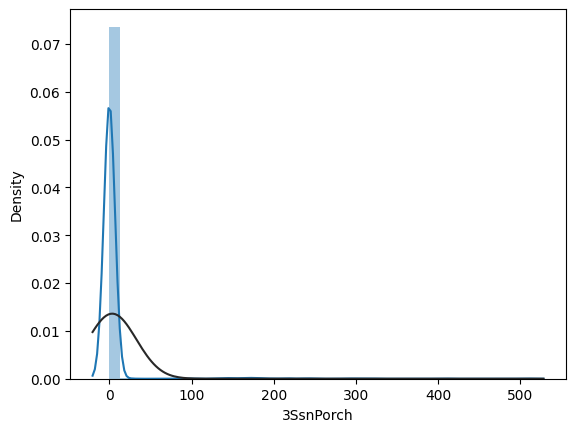

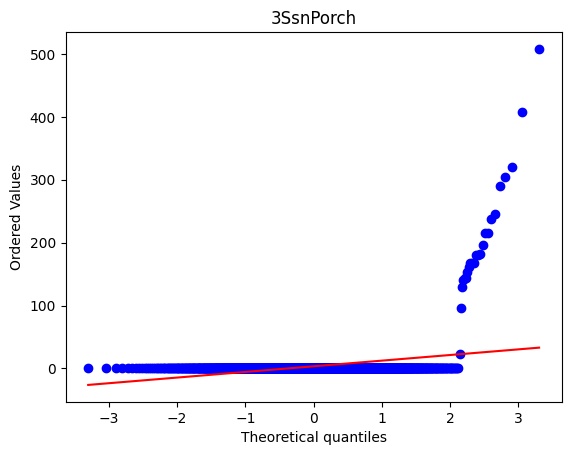

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


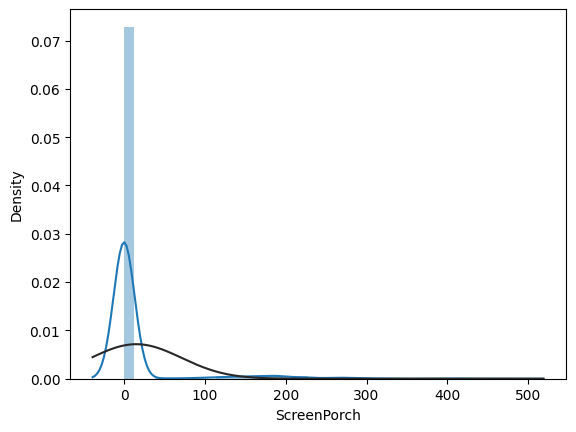

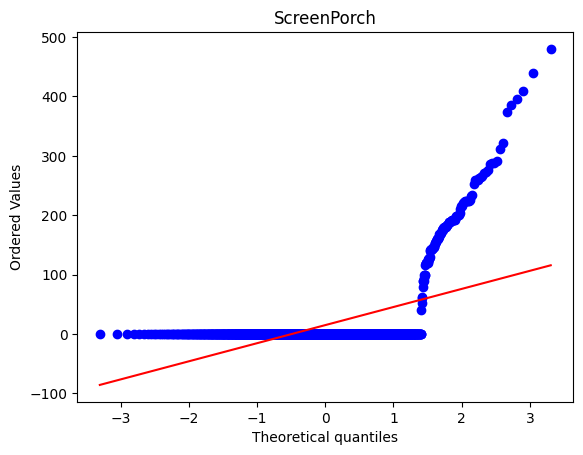

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


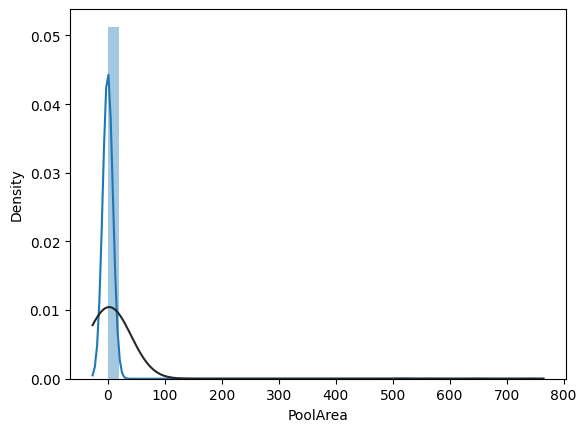

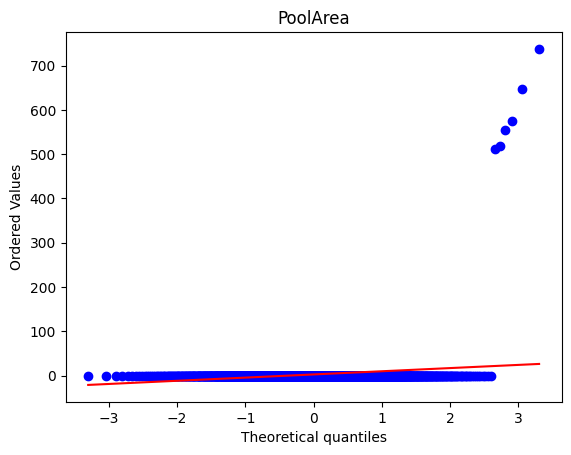

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


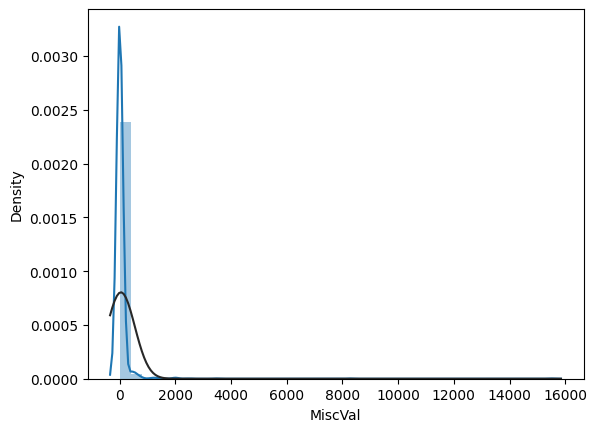

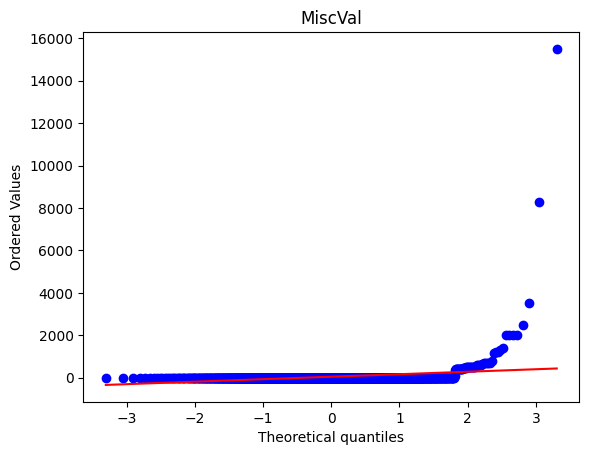

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\76062724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


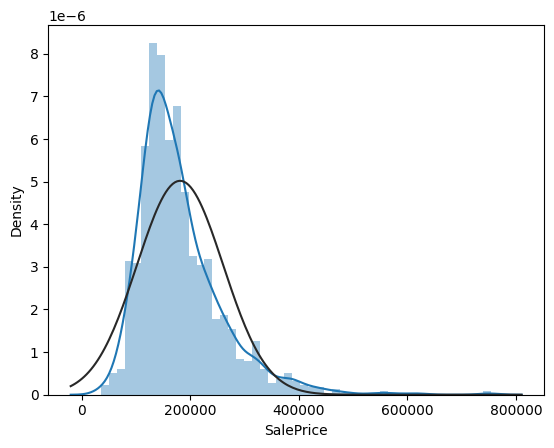

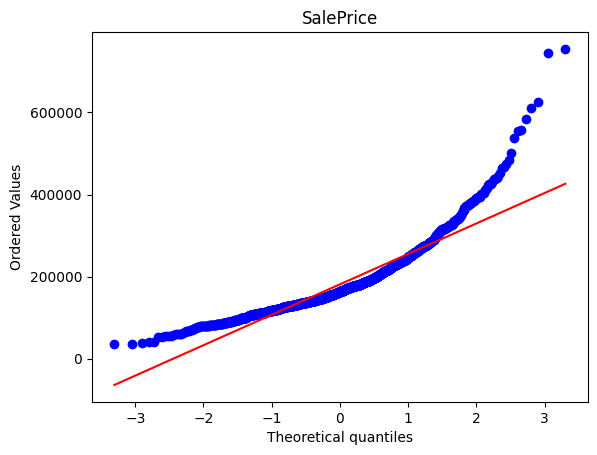

In [88]:
from scipy import stats

for features in numericals:
    sns.distplot(df[features], fit = norm)
    fig = plt.figure()
    res = stats.probplot(df[features], plot = plt)
    plt.title(features)
    plt.show()

In [89]:
df['SalePrice'] = np.log1p(df['SalePrice'])

In [90]:
df['SalePrice'].skew()

0.12157976050304882

In [91]:
# apply Box-Cox transformation to fix skewness
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

feature_to_remove = "SalePrice"

# Remove the feature from the list
numericals.remove(feature_to_remove)

for feature in numericals:
    if abs(skew(df[feature])) > 0.5:
        # get the lambda value for Box-Cox transformation
        lam = boxcox_normmax(df[feature].dropna() + 1)
        # transform the feature using Box-Cox transformation
        df[feature] = boxcox1p(df[feature], lam)


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_stats_py.py:4461: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))


In [92]:
Skewness = df[numericals].skew()
Skewness.sort_values(ascending = False)

PoolArea         15.640109
3SsnPorch         7.746645
LowQualFinSF      7.394863
MiscVal           5.201357
ScreenPorch       3.328953
BsmtFinSF2        2.645417
EnclosedPorch     2.286023
MasVnrArea        0.956725
2ndFlrSF          0.885768
WoodDeckSF        0.779135
OpenPorchSF       0.625594
BsmtFinSF1        0.363507
TotalBsmtSF       0.295554
GarageArea        0.131748
BsmtUnfSF         0.053059
LotFrontage       0.024656
GrLivArea         0.013995
1stFlrSF          0.002170
LotArea          -0.193962
dtype: float64

### Let us visualize the transformed features using distplot and QQplot

**SalePrice**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1292117381.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], fit = norm)


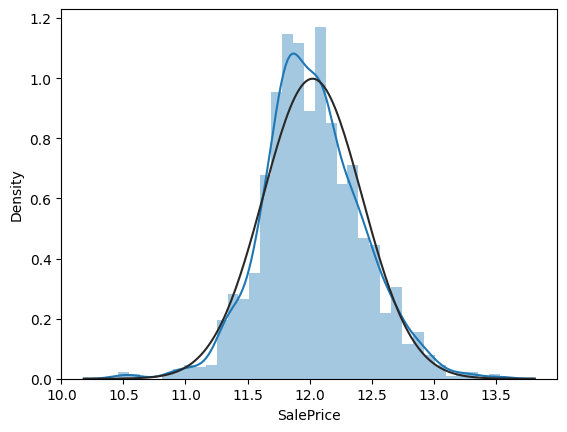

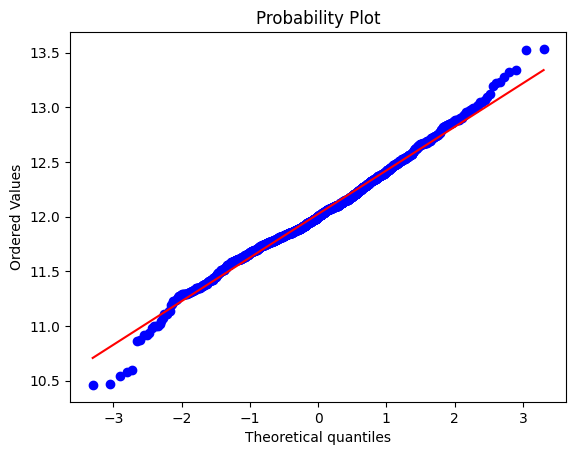

In [93]:
sns.distplot(df['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df[features],plot = plt)


**Other Numerical Features**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


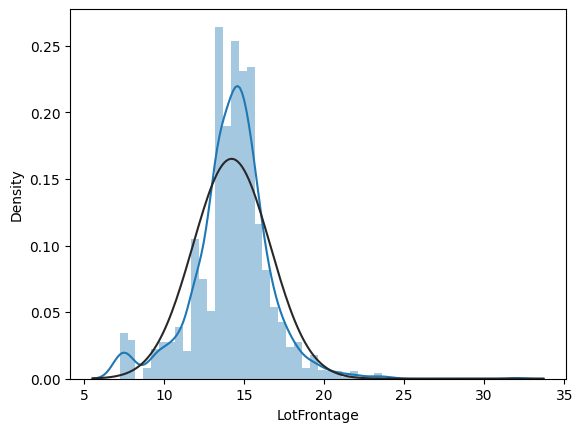

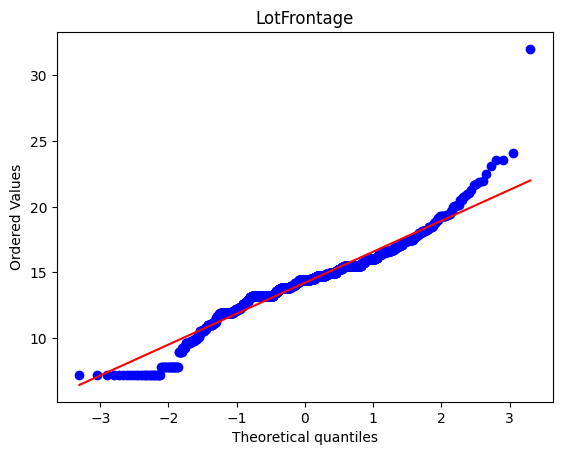

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


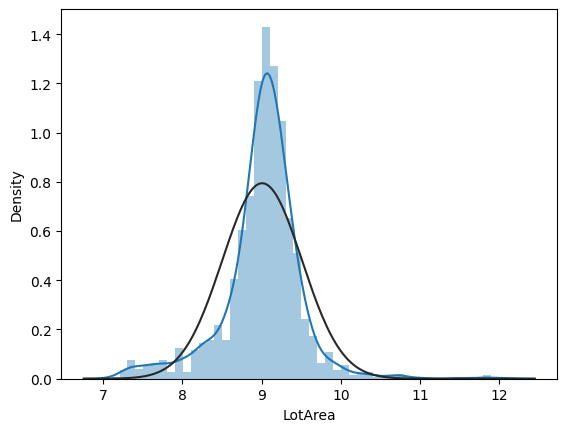

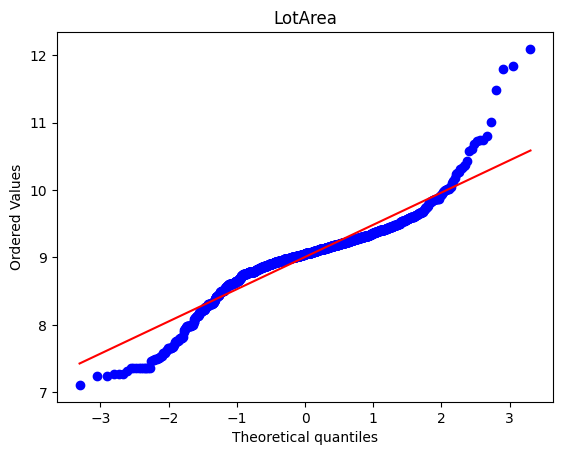

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


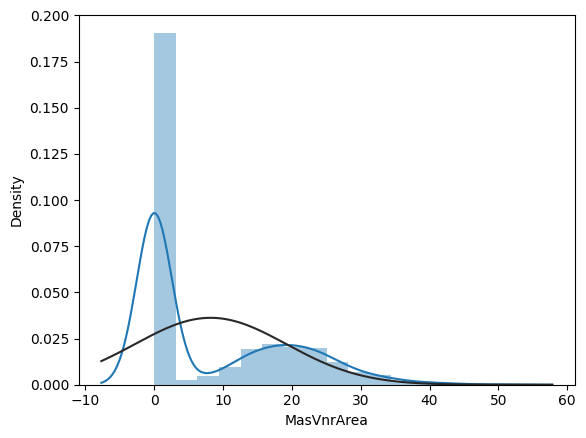

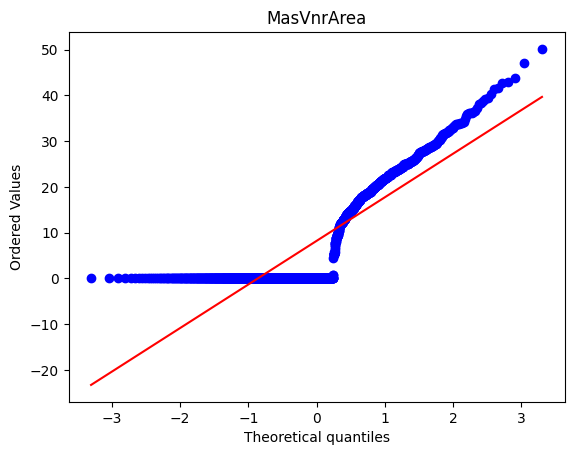

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


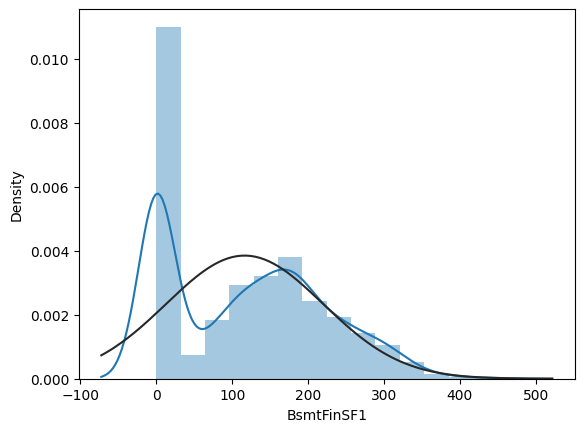

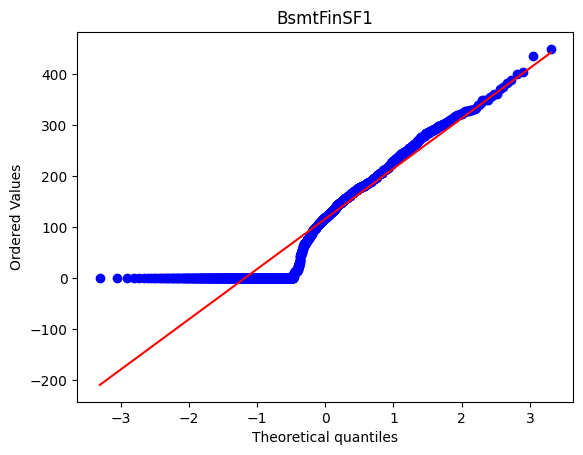

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


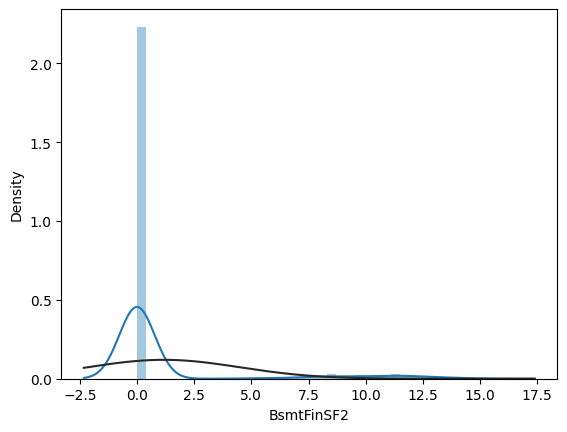

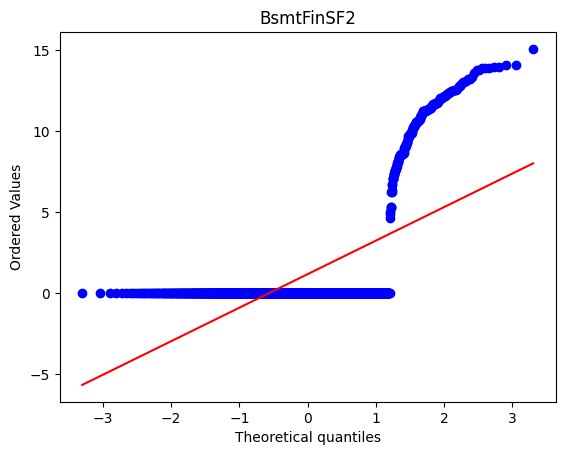

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


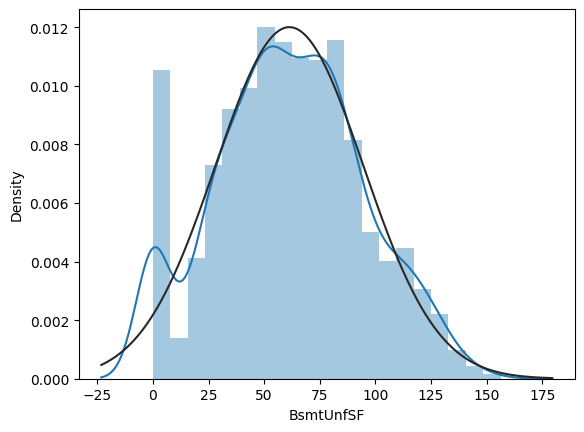

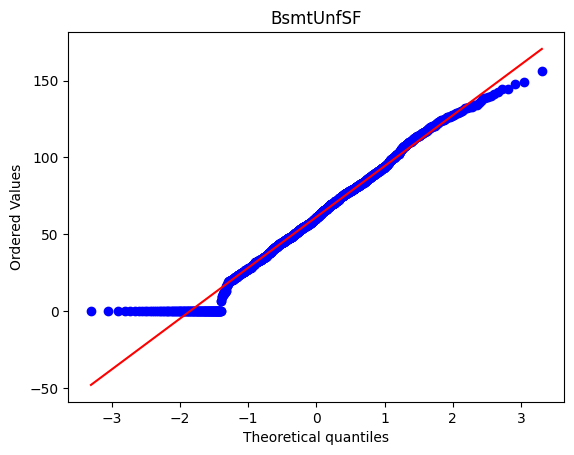

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


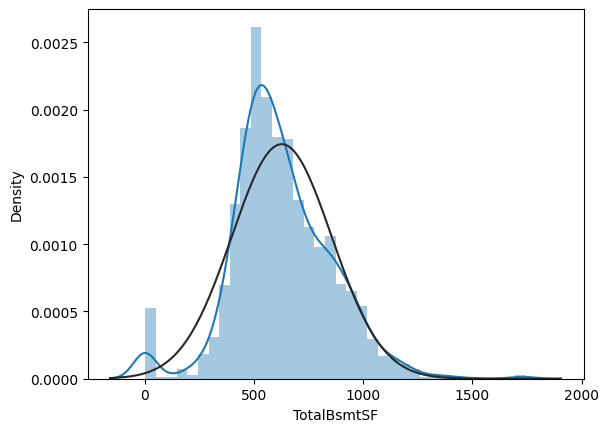

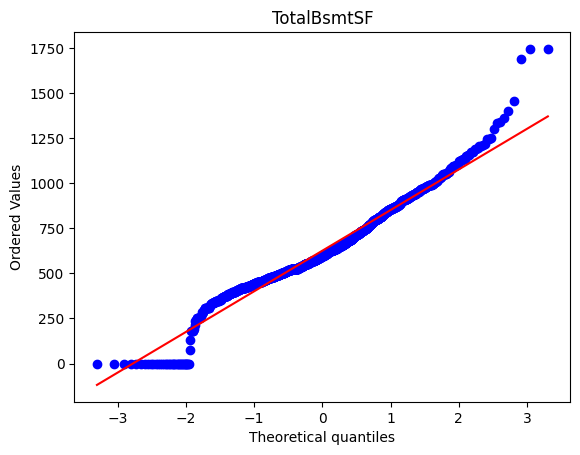

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


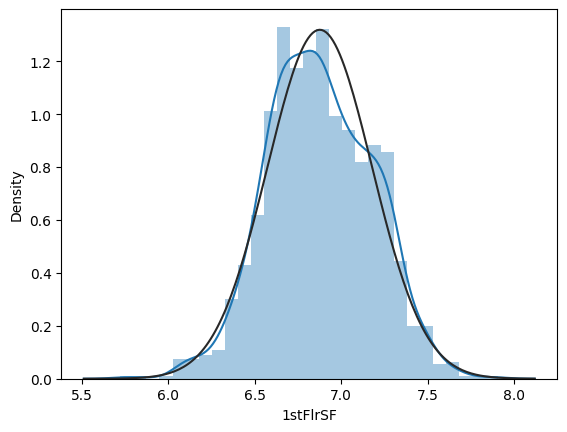

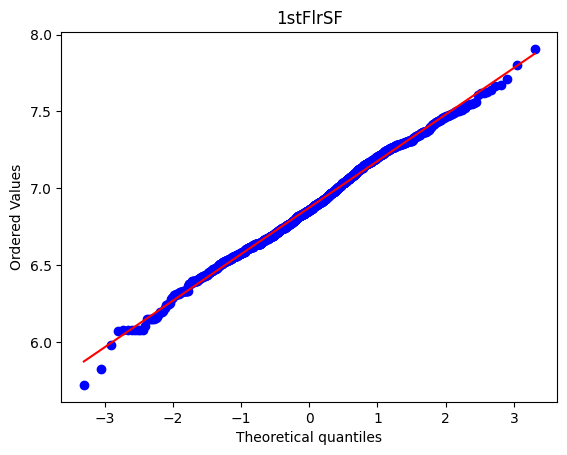

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


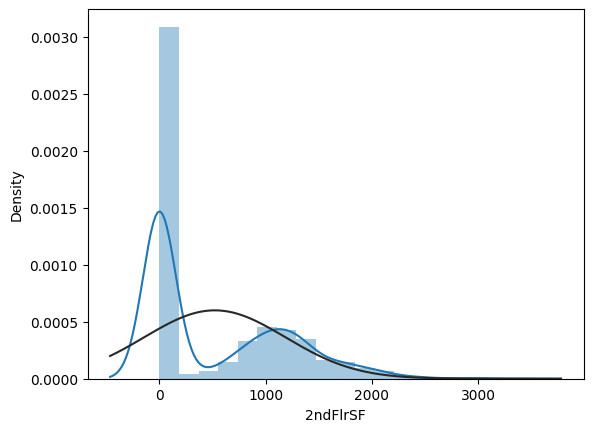

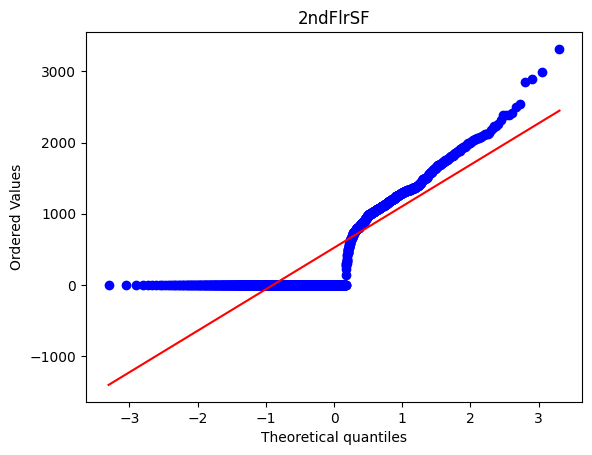

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


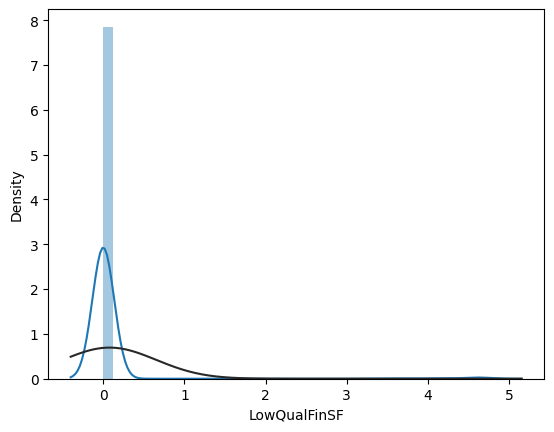

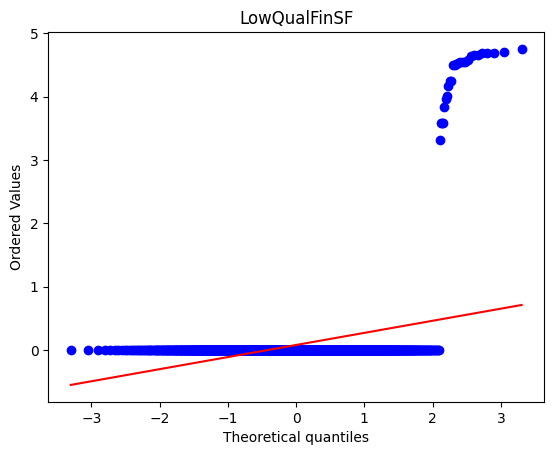

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


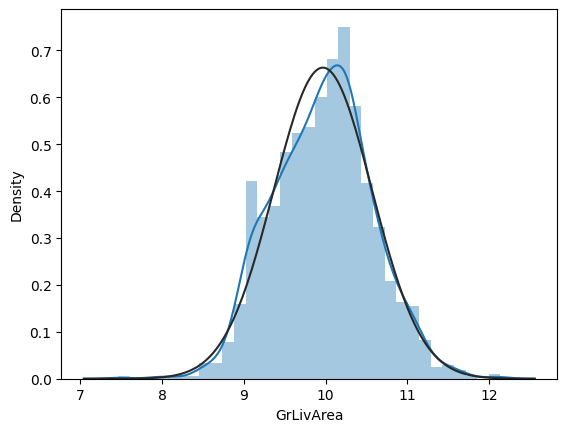

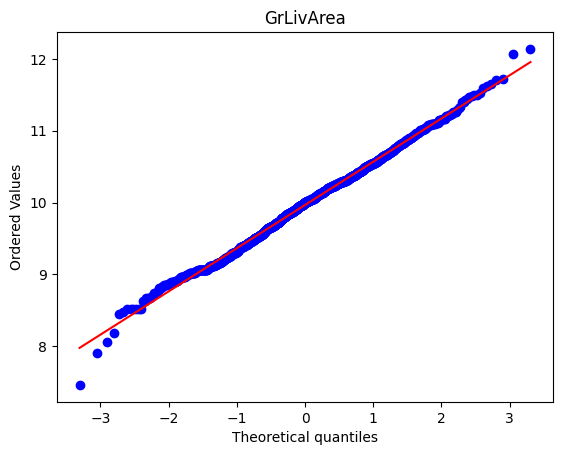

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


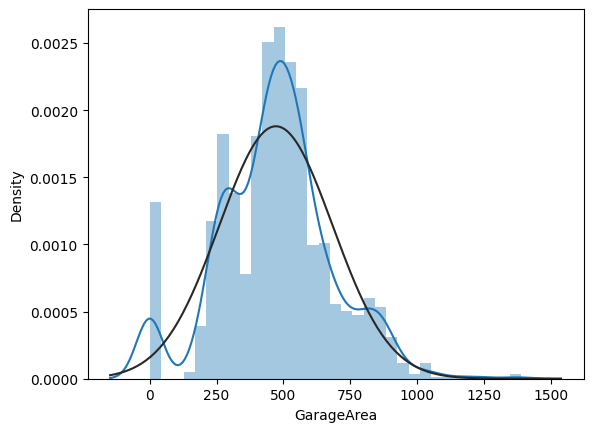

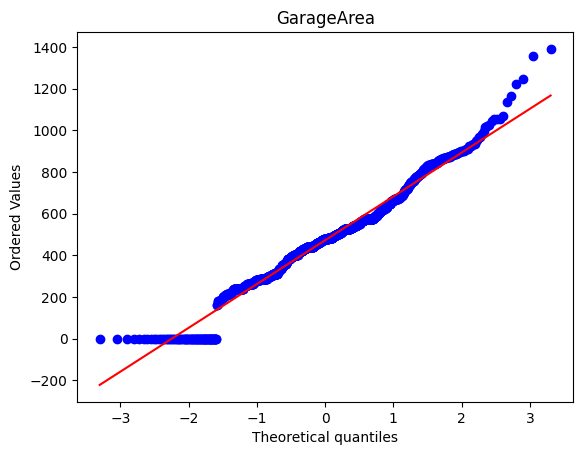

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


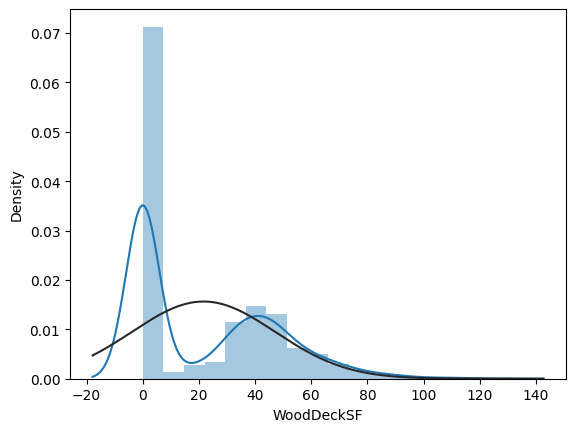

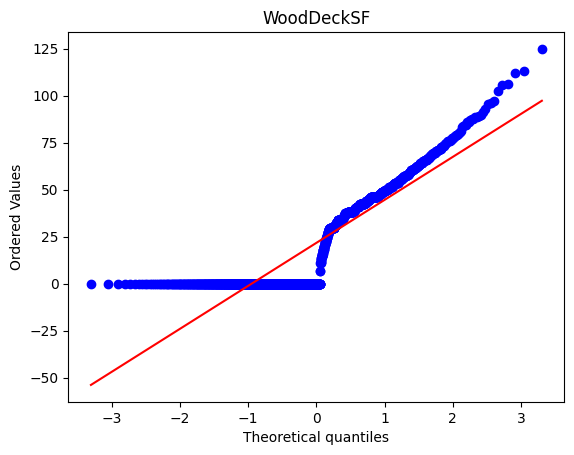

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


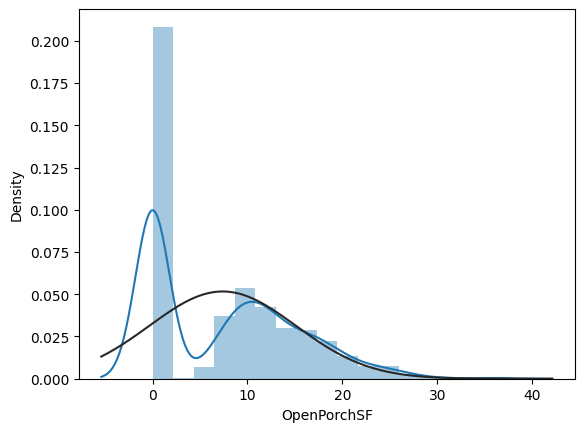

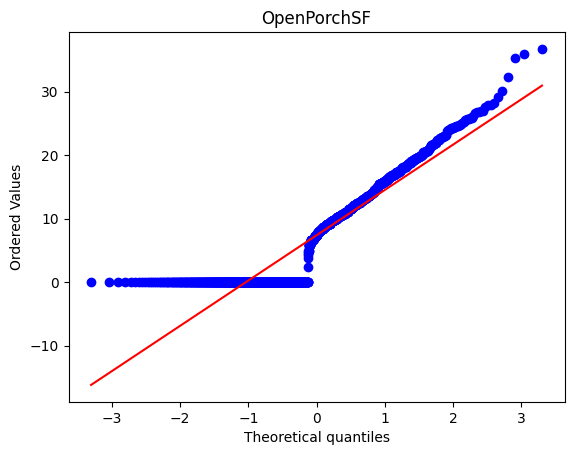

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


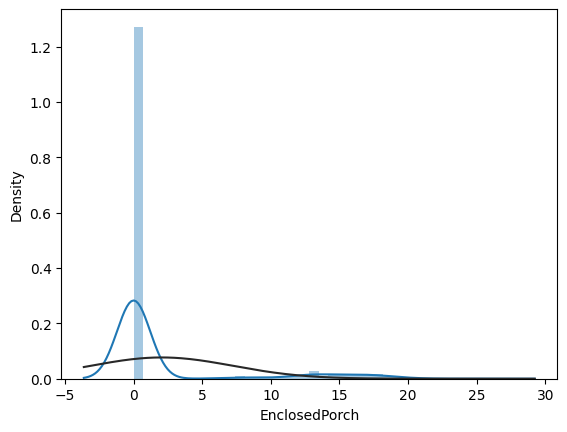

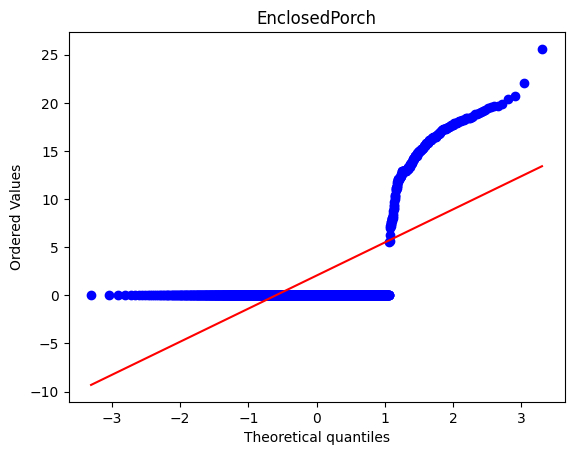

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


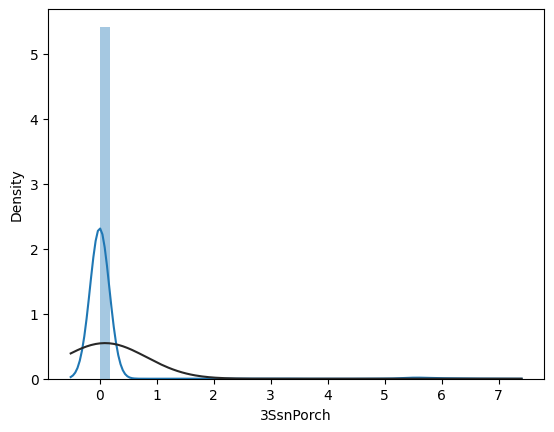

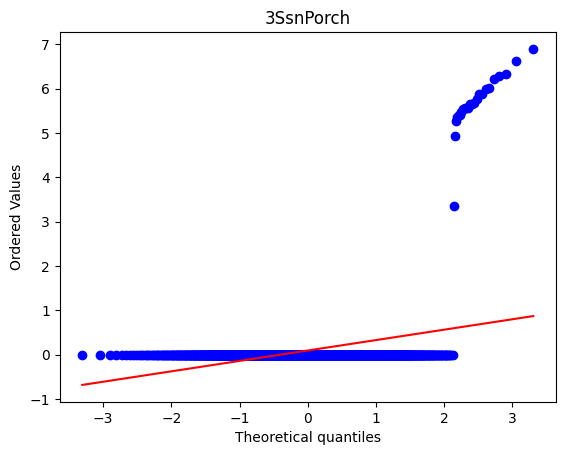

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


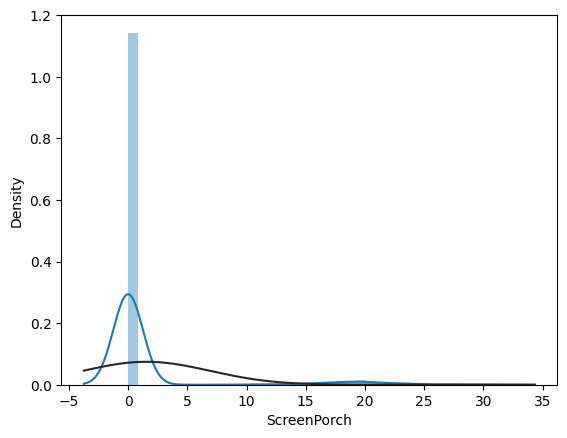

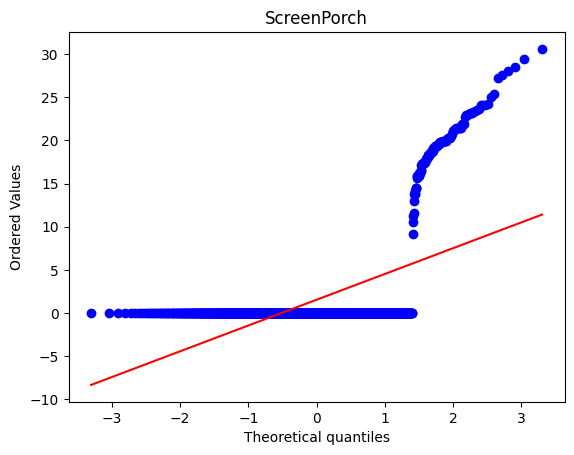

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


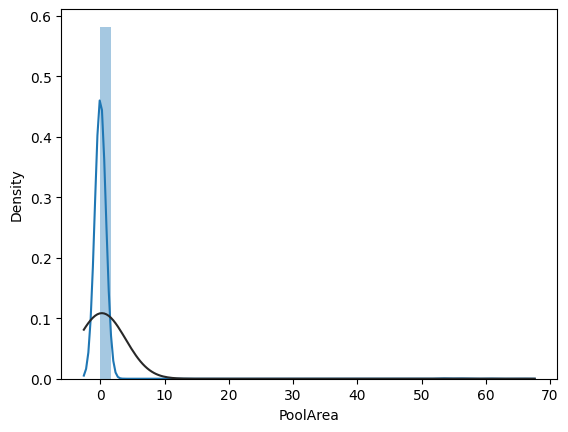

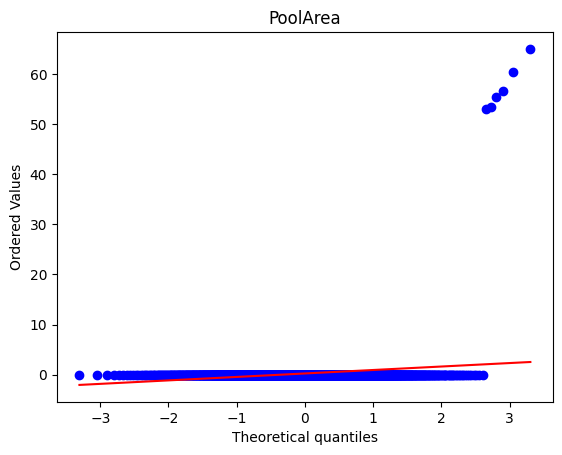

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4124\1928273384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features], fit = norm)


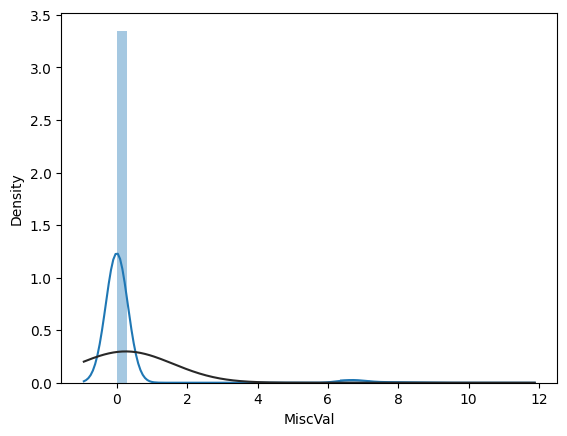

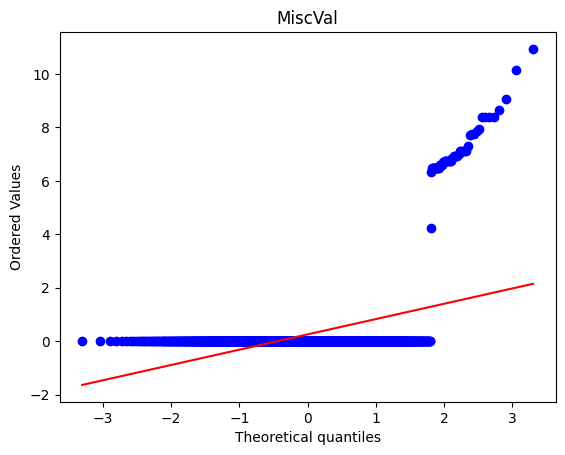

In [94]:
for features in numericals:
    sns.distplot(df[features], fit = norm)
    fig = plt.figure()
    res = stats.probplot(df[features], plot = plt)
    plt.title(features)
    plt.show()

## 2. Ordinal Encode ordered categorical features

Now that we are done with the numerical analysis, we have to convert our categorical features to numbers so we can feed it into our model. 

For the fake_numericals features as seen in <a href="#3.-Univariate-analysis---Bar-plots-on-object-variables"> Objects Section</a> , we will just change their dataype to int, because they were intially numbers but just categorical numbering.

And for the real categoricals, we will use bin mapping for ordered categorical features

In [95]:
print(fake_numericals)

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']


In [96]:
df[fake_numericals] = df[fake_numericals].astype(int)

In [97]:
ordinal_categorical = ['LotShape','ExterCond', 'ExterQual', 'KitchenQual','HeatingQC', 
                       'GarageQual','GarageCond', 'PoolQC','BsmtQual','BsmtCond',
                       'BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                       'GarageFinish', 'PavedDrive']

bin_map = {'None':0, 'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'No':1, 'Mn':2, 'Av':3, 'Unf':1
          ,'RFn':2, 'Fin':3, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6, 'IR3':0, 'IR2':1
          , 'IR1':2, 'Reg':3, 'N':0, 'P':1, 'Y':2}

In [98]:
for features in ordinal_categorical:
    df[features] = df[features].map(bin_map)

In [99]:
df['LotShape'].unique()

array([3, 2, 1, 0], dtype=int64)

Now all these features have been converted to numericals, time to convert the norminal categoricals to numericals

## 3. One Hot Encode Nominal categorical features

In [100]:
Nominal_categorical = [feature for feature in df.columns if df[feature].dtype == 'O']
print(Nominal_categorical)

['MSZoning', 'Alley', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


These are the remaining categorical features that will be converted to numbers using one hot encoding

In [101]:
df = pd.get_dummies(df)
df.head()

MSSubClass  LotFrontage   LotArea  LotShape  OverallQual  OverallCond  \
0          60    13.833816  8.942173         3            7            5   
1          20    15.507455  9.066928         3            6            8   
2          60    14.182973  9.221949         2            7            5   
3          70    13.233366  9.061823         2            7            5   
4          60    15.926366  9.453572         2            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
0       2003          2003   19.445440          4          3         4   
1       1976          1976    0.000000          3          3         4   
2       2001          2002   17.779567          4          3         4   
3       1915          1970    0.000000          3          3         3   
4       2000          2000   25.422367          4          3         4   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0         3             1             6  189.923265             1         0.0   
1         3             4             5  243.487664             1         0.0   
2         3             2             6  142.817036             1         0.0   
3         4             1             5   76.744784             1         0.0   
4         3             3             6  179.364007             1         0.0   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF     2ndFlrSF  LowQualFinSF  \
0  30.269515   522.159694          5  6.631898  1288.755262           0.0   
1  44.610473   744.626811          5  7.005440     0.000000           0.0   
2  57.566260   557.745830          5  6.701330  1308.151942           0.0   
3  65.605789   466.087032          4  6.743305  1131.096622           0.0   
4  61.904190   681.255620          5  6.911877  1612.743101           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0  10.286042             1             0         2         1             3   
1   9.731434             0             1         2         0             3   
2  10.366581             1             0         2         1             3   
3  10.293596             1             0         1         0             3   
4  10.755060             1             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
0             1            4             8           0            0   
1             1            3             6           1            3   
2             1            4             6           1            3   
3             1            4             7           1            4   
4             1            4             9           1            3   

   GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
0       2003.0             2           2         548           3           3   
1       1976.0             2           2         460           3           3   
2       2001.0             2           2         608           3           3   
3       1998.0             1           3         642           3           3   
4       2000.0             2           3         836           3           3   

   PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           2    0.000000    12.208476       0.000000        0.0          0.0   
1           2   61.919812     0.000000       0.000000        0.0          0.0   
2           2    0.000000     9.995005       0.000000        0.0          0.0   
3           2    0.000000     9.046382      19.056985        0.0          0.0   
4           2   46.135921    14.437152       0.000000        0.0          0.0   

   PoolArea  PoolQC  MiscVal  MoSold  YrSold  SalePrice  MSZoning_C (all)  \
0       0.0       0      0.0       2    2008  12.247699             False   
1       0.0       0      0.0       5    2007  12.109016             False   
2       0.0       0      0.0       9    2008  12.317171 

In [102]:
df.shape

(1458, 213)

**Hurrayyyy!!! all our features have been worked on and finally model ready**

**but one more thing...**

___

# Feature Selection

**Key notes to implement in Feature Selection**
1. Create heatmap, check for multicollinearity and strongly correlated features to saleprice.
2. Drop features with multicollinearity

In [103]:
# Find correlation coefficient of all features to SalePrice

correlation = df.corr()
print(correlation['SalePrice'].sort_values(ascending = False))

SalePrice            1.000000
OverallQual          0.821405
GrLivArea            0.737850
ExterQual            0.682226
GarageCars           0.681033
                       ...   
Foundation_CBlock   -0.337909
MSZoning_RM         -0.347453
CentralAir_N        -0.351598
MasVnrType_None     -0.388094
GarageType_Detchd   -0.388681
Name: SalePrice, Length: 213, dtype: float64


### Multivariate analysis - Use Heatmap to view the correlation between features 

In [107]:
#find the top most correlated values with saleprice

k = 20
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax = 0.8, linewidths = 0.01, square = True, annot = True, cmap = 'viridis',
           linecolor = 'white', xticklabels = cols.values, annot_kws = {'size':12}, 
            yticklabels = cols.values);

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'GarageCars',
       'KitchenQual', 'GarageArea', 'TotalBsmtSF', 'BsmtQual', '1stFlrSF',
       'GarageFinish', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'FireplaceQu',
       'TotRmsAbvGrd', 'Foundation_PConc', 'Fireplaces', 'HeatingQC',
       'MasVnrArea'],
      dtype='object')


AttributeError: 'float' object has no attribute 'shape'

From this analysis, we can notice some features with multicollinearity and these include;
TotRmsAbvGrd - GrLivArea, 1stFLRSF - TotalBsmtSF, GarageArea - GarageCars, Fireplaces - FireplaceQu. It is important to delete one of these features so it does not negatively affect our model performance due to low variance. We will delete the feature with lesser correlation to SalePrice, which are GarageArea, TotRmsAbvGrd and 1stFlrSF, Fireplaces.


In [108]:
# Dropping features with multicollinearity

df.drop(['GarageArea','TotRmsAbvGrd', '1stFlrSF', 'Fireplaces'], axis = 1, inplace = True)

In [109]:
df.shape

(1458, 209)

___

# Model Building

In [110]:
df

MSSubClass  LotFrontage   LotArea  LotShape  OverallQual  OverallCond  \
0             60    13.833816  8.942173         3            7            5   
1             20    15.507455  9.066928         3            6            8   
2             60    14.182973  9.221949         2            7            5   
3             70    13.233366  9.061823         2            7            5   
4             60    15.926366  9.453572         2            8            5   
...          ...          ...       ...       ...          ...          ...   
1455          60    13.476456  8.878455         3            6            5   
1456          20    16.029511  9.376274         3            6            6   
1457          70    13.951085  9.008384         3            7            9   
1458          20    14.182973  9.078770         3            5            6   
1459          20    14.968667  9.100655         3            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
0          2003          2003   19.445440          4          3         4   
1          1976          1976    0.000000          3          3         4   
2          2001          2002   17.779567          4          3         4   
3          1915          1970    0.000000          3          3         3   
4          2000          2000   25.422367          4          3         4   
...         ...           ...         ...        ...        ...       ...   
1455       1999          2000    0.000000          3          3         4   
1456       1978          1988   15.351199          3          3         4   
1457       1941          2006    0.000000          5          4         3   
1458       1950          1996    0.000000          3          3         3   
1459       1965          1965    0.000000          4          3         3   

      BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0            3             1             6  189.923265             1   
1            3             4             5  243.487664             1   
2            3             2             6  142.817036             1   
3            4             1             5   76.744784             1   
4            3             3             6  179.364007             1   
...        ...           ...           ...         ...           ...   
1455         3             1             1    0.000000             1   
1456         3             1             5  206.924467             3   
1457         4             1             6   92.369286             1   
1458         3             2             6   24.317098             3   
1459         3             1             4  214.865334             2   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC     2ndFlrSF  \
0       0.000000  30.269515   522.159694          5  1288.755262   
1       0.000000  44.610473   744.626811          5     0.000000   
2       0.000000  57.566260   557.745830          5  1308.151942   
3       0.000000  65.605789   466.087032          4  1131.096622   
4       0.000000  61.904190   681.255620          5  1612.743101   
...          ...        ...          ...        ...          ...   
1455    0.000000  92.001543   576.010589          5  1032.089469   
1456    8.343541  69.097298   894.315526          3     0.000000   
1457    0.000000  87.572437   685.062267          5  1775.608750   
1458   13.779323   0.000000   644.716864          4     0.000000   
1459    9.851942  28.505165   741.389756          4     0.000000   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0              0.0  10.286042             1             0         2         1   
1              0.0   9.731434             0             1         2         0   
2              0.0  10.366581             1             0         2         1   
3              0.0  10.293596             1             0         1         0   
4              0.0  10.755060             1  

In [111]:
# Import the necessary library
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

#Split the data into train and test set
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

**Build a cross validation model to check the performance of the algorithm eg xgboost, random forest**

In [112]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

n_folds = 5

def rmsle_cv(model):
    # This splits the train and test set to feed into the cross validation
    X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
    
    # This shuffles the X train and y train values for cross validation
    kf = KFold(n_folds, shuffle=True, random_state=42)
    
    # This results the root mean square of the model. It should be closeest to 0 for a great perfromance
    rmse = np.sqrt(-cross_val_score(model,X_train, y_train, scoring = 'neg_mean_squared_error', cv = kf))
    return('The score is {:.4f} ({:.4f})'.format(rmse.mean(), rmse.std()))


**Import the machine learning algorithm**

In [113]:
import xgboost

In [114]:
xgb = xgboost.XGBRegressor()

In [116]:
# Getting the performance of this model
rmsle_cv(xgb)

NameError: name 'X' is not defined

In [117]:
# Getting the performance of the model after hyperparameter tuning 
xgb_tuned = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=2, missing=np.nan,
             monotone_constraints='()', n_estimators=900, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1,
             reg_lambda=0.5, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
rmsle_cv(xgb_tuned)

NameError: name 'X' is not defined

**Building RMSE function for the predicted values**

In [ ]:
from sklearn.metrics import mean_squared_error

def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))


**Fitting the dataset to the XGBoost model**

In [ ]:
xgb_tuned.fit(X_train, y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:160: UserWarning: [10:55:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy=None, importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=2,
             max_leaves=None, min_child_weight=2, missing=nan,
             monotone_constraints='()', multi_strategy=None, n_estimators=900,
             n_jobs=4, num_parallel_tree=1, ...)

**Getting the score of the predicted value of the train set**

In [ ]:
y_train_pred = xgb_tuned.predict(X_train)

In [ ]:
print('The RMSE of the train set is {}'.format(rmsle(y_train, y_train_pred)))

The RMSE of the train set is 0.08675694599246336


**Getting the score of the predicted value of test set**

In [ ]:
y_test_pred = xgb_tuned.predict(X_test)

In [ ]:
print('The RMSE of the test set is {}'.format(rmsle(y_test, y_test_pred)))

The RMSE of the test set is 0.11758570680824587


The prediction for the train set is clearly better than the test set because the train set was used to build the model. 

**Printing the predicted test values**

In [ ]:
print(np.expm1(y_test_pred))

[220405.39   97493.17  108247.625 151001.08  323727.1   142730.3
 241838.02  337058.56  270680.34  137038.16  158997.38  176523.48
 177205.27  305205.28  164465.6   168501.06  196625.11  134668.05
 124730.08  207799.8   187464.62  218668.9   172549.3   229262.78
 195976.42  170923.61  198864.72  108493.914 177268.31  146483.4
 119754.08  110871.54  189868.23  115715.15  255227.36  325515.56
 126703.49  205278.     98332.164 100969.625 127478.59  237944.28
 119269.8   121629.85  124938.9   166407.12  121791.77  127652.31
 140965.62  140595.2   143109.34   86756.2   118055.87  145060.97
 150446.08  237717.25  207228.06  152677.47  129344.91   56633.633
  74463.984 202694.95  297171.75  286537.47  299235.    212561.56
 114500.05   65503.883 137185.14  159062.14  328961.53  149048.27
 111113.836 151356.75  187637.05  199187.77  257681.9   173090.05
 148922.52  114915.53  111962.15   76437.055 119858.625  91392.6
 157462.42  376016.84  260828.56  202175.44  128418.03  138506.7
 160160.55  1